In [122]:
import pandas as pd
import numpy as np
import random

from statistics import mean, stdev
from scipy.stats import mode

from IPython.display import IFrame, display

import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, plot_roc_curve

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = None

def reset_plt():
    plt.figure().clear()
    plt.close()
    plt.cla()
    plt.clf()
    plt.figure()
    
    sns.set_context("paper", rc={"font.size": 16,
                                 "axes.titlesize": 24,
                                 "axes.labelsize": 16}) 


data_path = '../../data/sim1/'
figure_path = '../../figure/sim1/'

In [123]:
final_df = pd.read_csv(data_path + "data_3.csv")
final_df.head()

Subject  Drive  Age  STAI  Type_AB  Effort  Frustration  Mental_Demand  \
0        2      2   23    40       97    17.0         11.0           18.0   
1        2      2   23    40       97    17.0         11.0           18.0   
2        2      2   23    40       97    17.0         11.0           18.0   
3        2      2   23    40       97    17.0         11.0           18.0   
4        2      2   23    40       97    17.0         11.0           18.0   

   Performance  Physical_Demand  Temporal_Demand  NASA_Total_Sum  \
0          8.0             12.0             11.0            77.0   
1          8.0             12.0             11.0            77.0   
2          8.0             12.0             11.0            77.0   
3          8.0             12.0             11.0            77.0   
4          8.0             12.0             11.0            77.0   

   NASA_Total_Sum_Normalized  Effort_Normalized  Frustration_Normalized  \
0                       21.0                7.0                     5.0   
1                       21.0                7.0                     5.0   
2                       21.0                7.0                     5.0   
3                       21.0                7.0                     5.0   
4                       21.0                7.0                     5.0   

   Mental_Demand_Normalized  Performance_Normalized  \
0                       2.0                     4.0   
1                       2.0                     4.0   
2                       2.0                     4.0   
3                       2.0                     4.0   
4                       2.0                     4.0   

   Physical_Demand_Normalized  Temporal_Demand_Normalized PP_Arousal_Mode  \
0                         3.0                         0.0         relaxed   
1                         3.0                         0.0         relaxed   
2                         3.0                         0.0         relaxed   
3                         3.0                         0.0         relaxed   
4                         3.0                         0.0         relaxed   

  PP_2_Arousal_Mode HR_Arousal_Mode BR_Arousal_Mode  Perinasal_Mean  \
0           relaxed        stressed         relaxed       -5.234157   
1           relaxed        stressed         relaxed       -5.310385   
2           relaxed        stressed         relaxed       -5.301983   
3           relaxed         relaxed         relaxed       -5.376241   
4           relaxed        stressed         relaxed       -5.412159   

   Perinasal_Median  Perinasal_SD  Perinasal_SS  Hr_Mean  Hr_Median     Hr_SD  \
0         -5.225352      0.022537    273.968589    90.34       90.3  1.484887   
1         -5.314152      0.010595    282.002952    91.20       90.6  1.366260   
2         -5.300184      0.007855    281.110844    90.08       90.3  1.347261   
3         -5.384108      0.022728    289.044320    86.64       86.8  1.188089   
4         -5.415029      0.008453    292.915248    86.70       87.6  1.708150   

      Hr_SS  Br_Mean  Br_Median     Br_SD      Br_SS  Gender_Female  \
0  81633.00   11.052      11.05  0.162809  1221.7056              1   
1  83191.20   12.004      12.10  0.352742  1442.0800              1   
2  81160.40   13.108      13.10  0.355928  1719.3368              1   
3  75077.60   14.164      14.08  0.319138  2007.1056              1   
4  75195.16   15.488      15.55  0.339830  2399.8208              1   

   Gender_Male  Drive_Label_CD  Drive_Label_ED  Drive_Label_MD  \
0            0               1               0               0   
1            0               1               0               0   
2            0               1               0               0   
3            0               1               0               0   
4            0               1               0               0   

   Nasa_Cluster_High  Nasa_Cluster_Low PP_HR_Arousal_Mode PP_BR_Arousal_Mode  \
0                  1                 0            relaxed           

In [124]:
final_df.columns

Index(['Subject', 'Drive', 'Age', 'STAI', 'Type_AB', 'Effort', 'Frustration',
       'Mental_Demand', 'Performance', 'Physical_Demand', 'Temporal_Demand',
       'NASA_Total_Sum', 'NASA_Total_Sum_Normalized', 'Effort_Normalized',
       'Frustration_Normalized', 'Mental_Demand_Normalized',
       'Performance_Normalized', 'Physical_Demand_Normalized',
       'Temporal_Demand_Normalized', 'PP_Arousal_Mode', 'PP_2_Arousal_Mode',
       'HR_Arousal_Mode', 'BR_Arousal_Mode', 'Perinasal_Mean',
       'Perinasal_Median', 'Perinasal_SD', 'Perinasal_SS', 'Hr_Mean',
       'Hr_Median', 'Hr_SD', 'Hr_SS', 'Br_Mean', 'Br_Median', 'Br_SD', 'Br_SS',
       'Gender_Female', 'Gender_Male', 'Drive_Label_CD', 'Drive_Label_ED',
       'Drive_Label_MD', 'Nasa_Cluster_High', 'Nasa_Cluster_Low',
       'PP_HR_Arousal_Mode', 'PP_BR_Arousal_Mode', 'HR_BR_Arousal_Mode',
       'PP_HR_BR_Arousal_Mode'],
      dtype='object')

In [125]:
final_df.describe()

Subject        Drive          Age         STAI      Type_AB  \
count  6390.000000  6390.000000  6390.000000  6390.000000  6390.000000   
mean     35.666823     3.014085    43.714241    32.968232    49.602504   
std      23.118468     0.817588    23.460274     8.403062    31.679824   
min       2.000000     2.000000    21.000000    20.000000     0.000000   
25%      18.000000     2.000000    22.000000    25.000000    20.000000   
50%      33.000000     3.000000    25.000000    32.000000    49.000000   
75%      47.000000     4.000000    70.000000    40.000000    82.000000   
max      84.000000     4.000000    81.000000    52.000000    99.000000   

            Effort  Frustration  Mental_Demand  Performance  Physical_Demand  \
count  6390.000000  6390.000000    6390.000000  6390.000000      6390.000000   
mean     12.003599     9.078091      12.606964     9.093584         9.033333   
std       5.181982     5.731791       4.917477     5.401497         5.381224   
min       2.000000     1.000000       3.000000     1.000000         1.000000   
25%       7.000000     4.000000      10.000000     4.000000         4.000000   
50%      13.000000     8.000000      13.000000     8.000000         9.000000   
75%      17.000000    14.000000      17.000000    12.000000        13.000000   
max      20.000000    20.000000      20.000000    20.000000        20.000000   

       Temporal_Demand  NASA_Total_Sum  NASA_Total_Sum_Normalized  \
count      6390.000000     6390.000000                6390.000000   
mean          9.353052       61.168623                  22.984977   
std           4.467750       26.154570                  25.762294   
min           1.000000       15.000000                 -29.000000   
25%           6.000000       39.000000                   5.000000   
50%          10.000000       61.000000                  20.000000   
75%          13.000000       80.000000                  44.000000   
max          20.000000      120.000000                  76.000000   

       Effort_Normalized  Frustration_Normalized  Mental_Demand_Normalized  \
count        6390.000000             6390.000000               6390.000000   
mean            3.636228                4.261659                  4.314006   
std             6.149589                5.773941                  5.730557   
min           -12.000000               -8.000000                -12.000000   
25%            -1.000000                0.000000                  1.000000   
50%             3.000000                3.000000                  4.000000   
75%             8.000000                9.000000                  8.000000   
max            16.000000               19.000000                 19.000000   

       Performance_Normalized  Physical_Demand_Normalized  \
count             6390.000000                 6390.000000   
mean                 3.880751                    2.847731   
std                  6.114108                    4.731032   
min                -14.000000                   -7.000000   
25%                  1.000000                    0.000000   
50%                  4.000000                    2.000000   
75%                  8.000000                    6.000000   
max                 18.000000                   13.000000   

       Temporal_Demand_Normalized  Perinasal_Mean  Perinasal_Median  \
count                 6390.000000     6390.000000       6390.000000   
mean                     4.044601       -5.122087         -5.122430   
std                      5.000271        0.241875          0.242280   
min                     -9.000000       -5.706820         -5.713246   
25%                      1.000000       -5.263623         -5.263779   
50%                      3.000000       -5.175722         -5.176753   
75%                      9.000000       -5.043806         -5.043697   
max                     15.000000       -3.484398         -3.489295   

       Perinasal_SD  Perinasal_SS      Hr_Mean    Hr_Median        Hr_SD  \
count   6390.000000   6390.00000

In [126]:
final_df.Subject.unique()

array([ 2,  3,  5,  8, 14, 16, 17, 18, 20, 23, 24, 25, 29, 31, 33, 36, 38,
       39, 43, 44, 45, 47, 60, 61, 62, 66, 77, 79, 80, 81, 84])

In [127]:
len(final_df.Subject.unique())

31

In [128]:
def get_round(num, point=2):
    return round(num, point)

def get_rounded_str(num, point):
    return str(get_round(num, point))


def get_drive_name(drive):
    if drive == 2:
        return 'CD'
    elif drive == 3:
        return 'MD'
    elif drive == 4:
        return 'ED'
    elif drive == 5:
        return 'FD'


def get_test_subjs(arousal_signal):
    
    ######################################
    # 'PP', 'PP_2', 'HR', 'BR', 'PP_HR_BR'
    ######################################
    
    if arousal_signal == 'PP':
        #####################################
        # return [2, 31, 66, 47, 44, 25, 24]
        #####################################
        return [18, 23, 16, 25, 8, 45, 2]
    
    elif arousal_signal == 'PP_2':
        return [44, 20, 16, 68, 33, 60, 18]
    
    elif arousal_signal == 'HR':
        return [61, 29, 24, 38, 84, 2, 17]
    
    elif arousal_signal == 'BR':
        return [44, 62, 81, 20, 61, 38, 79]
    
    elif arousal_signal == 'PP_HR_BR':
        return [31, 66, 16, 29, 62, 44, 36]
    




def get_splitted_data(final_df, model_features, arousal_signal, predict_col, model_train_method, subjects_test=None):
    
    unique_subjs = final_df.Subject.unique()
    
    df_arousal_count = final_df.groupby(['Arousal_Mode']).agg({'Arousal_Mode': 'count'})
    df_arousal_count = df_arousal_count.apply(lambda x: 100 * x / float(x.sum()))
    # print(df_arousal_count.head(2))

    ########################################################################
    '''
    train_subj_end = 65

    train_df = final_df[final_df.Subject < train_subj_end]
    test_df = final_df[final_df.Subject >= train_subj_end]
    
    train_subjs = train_df.Subject.unique()
    test_subjs = test_df.Subject.unique()
    
    print('\n\nTest Subjects -->\n', test_subjs)
    '''
    ########################################################################
    
    
    
    ########################################################################
    # '''
    if model_train_method=='best_accurate':
        test_subjs = get_test_subjs(arousal_signal)
    elif model_train_method=='bootstrap':
        test_subjs = random.sample(list(final_df.Subject.unique()), 7)
    elif model_train_method=='kfold':
        test_subjs = subjects_test
        
    train_subjs = [subj for subj in unique_subjs if subj not in test_subjs]
    
    train_df = final_df[final_df.Subject.isin(train_subjs)]
    test_df = final_df[final_df.Subject.isin(test_subjs)]
    
    print('\n\nTest Subjects -->\n', test_subjs)
    # '''
    ########################################################################
    
    
    
    print('\n\nTotal Train Subjects: ' + str(len(train_subjs)) + '    Percentage: ' + str(round(100*len(train_subjs)/len(unique_subjs), 2)) + '%')
    print('Total Test Subjects: ' + str(len(test_subjs)) + '    Percentage: ' + str(round(100*len(test_subjs)/len(unique_subjs), 2)) + '%' + '\n\n')


    train_df_arousal_count = train_df.groupby(['Arousal_Mode']).agg({'Arousal_Mode': 'count'})
    train_df_arousal_count = train_df_arousal_count.apply(lambda x: 100 * x / float(x.sum()))
    print('Train Data Percentage -->')
    print(train_df_arousal_count)


    test_df_arousal_count = test_df.groupby(['Arousal_Mode']).agg({'Arousal_Mode': 'count'})
    test_df_arousal_count = test_df_arousal_count.apply(lambda x: 100 * x / float(x.sum()))
    print('\nTest Data Percentage -->')
    print(test_df_arousal_count)


    print('\n\nTotal Train Rows: ' + str(len(train_df)) + '    Percentage: ' + str(round(100*len(train_df)/len(final_df), 2)) + '%')
    print('Total Test Rows: ' + str(len(test_df)) + '    Percentage: ' + str(round(100*len(test_df)/len(final_df), 2)) + '%' + '\n\n')

    
    X_train = train_df[model_features]
    y_train = train_df[[predict_col]]

    X_test = test_df[model_features]
    y_test = test_df[[predict_col]]
    
    return X_train, y_train, X_test, y_test, train_df, test_df


In [129]:
model_df = final_df.copy().rename(columns={
                             'Gender_Female': 'Gender', 
                             'Effort': 'NASA_Effort',
                             'Frustration': 'NASA_Frustration', 
                             'Mental_Demand': 'NASA_Mental',
                             'Performance': 'NASA_Performance', 
                             'Physical_Demand': 'NASA_Physical',
                             'Temporal_Demand': 'NASA_Temporal', 
                             'NASA_Total_Sum': 'NASA_Total',
                             'Hr_Mean': 'HR_Mean',
                             'Hr_SD': 'HR_SD',
                             'Hr_Median': 'HR_Median',
                             'Hr_SS': 'HR_SS',
                             'Br_Mean': 'BR_Mean',
                             'Br_SD': 'BR_SD',
                             'Br_Median': 'BR_Median',
                             'Br_SS': 'BR_SS'
                            })


################################################################################################
# model_all_features = [
#     'Age', 'Gender',     
#     'NASA_Mental', 'NASA_Physical', 'NASA_Effort', 'NASA_Frustration', 'NASA_Temporal', 'NASA_Performance', 'NASA_Total',          
#     'Perinasal_Mean', 'Perinasal_Median', 'Perinasal_SD', 'Perinasal_SS',     
#     'HR_Mean', 'HR_Median', 'HR_SD', 'HR_SS',
#     'BR_Mean', 'BR_Median', 'BR_SD', 'BR_SS'
# ]
################################################################################################

model_features = [
    'Age', 'Gender',     
    'NASA_Physical', 'NASA_Effort', 'NASA_Frustration', 'NASA_Temporal', 'NASA_Performance',          
    'Perinasal_Mean', 'Perinasal_SD',     
    'HR_Mean', 'HR_SD',
    'BR_Mean', 'BR_SD'
]

# print(len(model_features), len(plot_features)) ## 22, 21
# print(plot_features)
################################################################################################




################################################################################################
# model_features = [
#     'Age', 'Gender_Female', 'Gender_Male', 
#     'Effort', 'Frustration', 'Mental_Demand', 'Performance', 'Physical_Demand', 'Temporal_Demand', 'NASA_Total_Sum', 
#     'Perinasal_Mean', 'Perinasal_SD', 'Perinasal_Median', 'Perinasal_SS', 
#     'Hr_Mean', 'Hr_SD', 'Hr_Median', 'Hr_SS', 
#     'Br_Mean', 'Br_SD', 'Br_Median', 'Br_SS',


# ################################################################################################
# #              Not Available in any of SIM2, TT1, EmailStress Studies
# ################################################################################################
# #     'STAI', 'Type_AB', 
# #     'NASA_Total_Sum_Normalized', 
# #     'Effort_Normalized', 'Frustration_Normalized', 'Mental_Demand_Normalized',
# #     'Performance_Normalized', 'Physical_Demand_Normalized', 'Temporal_Demand_Normalized', 
# #     'Palm_Mean', 'Palm_SD', 'Palm_Median', 'Palm_SS', 
# #     'Drive_Label_CD', 'Drive_Label_ED', 'Drive_Label_MD', 
# #     'Nasa_Cluster_High', 'Nasa_Cluster_Low',
# ################################################################################################

# ]
################################################################################################






################################################################################################
model = RandomForestClassifier(n_estimators = 200,
                               max_features = 'auto',
                               bootstrap = True)
################################################################################################

In [130]:
def get_confusion_matrix(arousal_signal, model_df, test_df, y_test, y_pred, do_normalize):
    
    #####################################################################################
    reset_plt()
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)

    #-------------------------------------------------------------#
    # labels = ["normal", "relaxed", "stressed", "unknown"]
    # labels = ["relaxed", "normal", "unknown", "stressed"]
    # labels = ["relaxed", "stressed"]
    labels = sorted(model_df.Arousal_Mode.unique())
    #-------------------------------------------------------------#
    
    if do_normalize:
        conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=labels, normalize='all'))
        sns.heatmap(conf_mat*100, annot=True, annot_kws={"size": 24})
        # plt.title('Confusion Matrix - ' + arousal_signal + ' %', fontsize=40)
        plot_name = arousal_signal.lower() + '_percentage'
        
    else:
        conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=labels))
        # annot = [str(val)+"%" for val in conf_mat]
        sns.heatmap(conf_mat, annot=True, fmt='d', annot_kws={"size": 24})
        # plt.title('Confusion Matrix - ' + arousal_signal, fontsize=40)
        plot_name = arousal_signal.lower() 

    ax.collections[0].colorbar.ax.tick_params(labelsize=28)
    
    ax.set_title('%')
    
    ax.set_xticklabels(labels, fontsize=24)
    ax.set_yticklabels(labels, fontsize=24)
    
    ax.set_xlabel('Predicted', fontsize=32)
    ax.set_ylabel('Actual', fontsize=32)

    plt.savefig(figure_path + plot_name + '_confusion_matrix.png')
    plt.savefig(figure_path + plot_name + '_confusion_matrix.pdf')
    
    plt.show()
    #####################################################################################
    
    

def get_all_confusion_matrices(arousal_signal, model_df, test_df, y_test, y_pred):
    
    get_confusion_matrix(arousal_signal, model_df, test_df, y_test, y_pred, do_normalize=False)
    get_confusion_matrix(arousal_signal, model_df, test_df, y_test, y_pred, do_normalize=True)

    #####################################################################################
    # print('\n\nConfusion Matrix:')
    # print(pd.DataFrame(confusion_matrix(y_test, y_pred, labels=labels)))
    #####################################################################################
    
    
    #####################################################################################
    labels = sorted(model_df.Arousal_Mode.unique())
    
    reset_plt()
    fig, axs = plt.subplots(3, figsize = (12, 36))
    fig.suptitle(arousal_signal)

    for i, drive in enumerate(test_df.Drive.unique()):
        drive_test_df = test_df.copy()[test_df.Drive == drive]
        y_test_drive = drive_test_df.Arousal_Mode
        y_pred_drive = drive_test_df.Prediction

        conf_mat = pd.DataFrame(confusion_matrix(y_test_drive, y_pred_drive, labels = labels))
        axis = axs[i]

        sns.heatmap(conf_mat, annot=True, fmt='d', annot_kws={"size": 24}, ax = axis)
        axis.collections[0].colorbar.ax.tick_params(labelsize=32)
        
        axis.title.set_text(get_drive_name(drive))
        axis.set_xticklabels(labels, fontsize=24)
        axis.set_yticklabels(labels, fontsize=24)
        axis.set_xlabel('Predicted', fontsize=24)
        axis.set_ylabel('Actual', fontsize=24)

    plt.savefig(figure_path + arousal_signal.lower() + '_drive_confusion_matrix.png')
    plt.savefig(figure_path + arousal_signal.lower() + '_drive_confusion_matrix.pdf')
    
    # plt.show()
    #####################################################################################

    
    
    
def get_feature_importance(model, X_train, arousal_signal):
    
    df_feature_importance = pd.DataFrame(model.feature_importances_, 
                                     index=X_train.columns, 
                                     columns=['feature importance']).sort_values('feature importance', ascending=False)
    feature_imp = pd.Series(model.feature_importances_,
                            index=X_train.columns).sort_values(ascending=False).round(2)

    reset_plt()
    plt.figure(figsize=(25, 15))
    
    sns_plt = sns.barplot(x=feature_imp, y=feature_imp.index) 
    
    # plt.title(arousal_signal + ' - Important Features', fontsize=36)
    # sns_plt.axes.set_title(arousal_signal + ' - Important Features', fontsize=36)
    
    sns_plt.set_xlabel('Feature Importance Score', fontsize=36)
    sns_plt.set_ylabel('Features', fontsize=36)

    sns_plt.tick_params(labelsize=24)
#     sns_plt.set_xticklabels(sns_plt.get_xticklabels(), fontsize = 24)
    sns_plt.set_yticklabels(sns_plt.get_yticklabels(), fontsize = 24, rotation = 30)

    plt.savefig(figure_path + arousal_signal.lower() + '_feature_importance.png')
    plt.savefig(figure_path + arousal_signal.lower() + '_feature_importance.pdf')
    
    plt.show()
    
    
def get_correlation_plot(model_df, arousal_signal, selected_model_features):
    cor_df = model_df.copy()[['Arousal_Mode'] + selected_model_features]
    corr = cor_df.corr().round(3)

    reset_plt()
    plt.figure(figsize=(40, 40))
    plt.subplot(1, 1, 1)
    
    sns_plt = sns.heatmap(corr, cmap="YlGnBu", center=0, square=True, linewidths=.5, annot=True, annot_kws={"size": 24})
    sns_plt.collections[0].colorbar.ax.tick_params(labelsize=32)

    sns_plt.set_xticklabels(sns_plt.get_yticklabels(), rotation = 45, fontsize = 38)
    sns_plt.set_yticklabels(sns_plt.get_yticklabels(), rotation = 0, fontsize = 38) 
    
    plt.savefig(figure_path + arousal_signal.lower() + '_correlation_plot.png')
    plt.savefig(figure_path + arousal_signal.lower() + '_correlation_plot.pdf')
    
    plt.show()
    
    
    
def get_bootstrap_results(model_df, model_features, arousal_signal, model_train_method, subjects_test=None):

    #####################################################################################
    arousal_col = arousal_signal + '_Arousal_Mode'

    # 'PP_Arousal_Mode', 'HR_Arousal_Mode', 'BR_Arousal_Mode'
    # 'PP_HR_Arousal_Mode', 'HR_BR_Arousal_Mode', 'PP_HR_BR_Arousal_Mode'
    #####################################################################################




    #####################################################################################
    model_df['Arousal_Mode'] = model_df[arousal_col]
    # print(model_df.Arousal_Mode.unique())
    #####################################################################################




    #####################################################################################
    #                               MODELING
    #####################################################################################
    X_train, y_train, X_test, y_test, train_df, test_df = get_splitted_data(model_df, 
                                                                            model_features,
                                                                            arousal_signal,
                                                                            'Arousal_Mode',
                                                                            model_train_method,
                                                                            subjects_test) 

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    test_df['Prediction'] = y_pred

    Accuracy = get_round(accuracy_score(y_test, y_pred))
    F1 = get_round(f1_score(y_test, y_pred, average='weighted'))
    Recall = get_round(recall_score(y_test, y_pred, average='weighted'))
    Precision = get_round(precision_score(y_test, y_pred, average='weighted'))
    
    # Ref: https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/
    AUC = get_round(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    Specificity = get_round(tn / (tn+fp))
    
    print('Accuracy:' + str(Accuracy))
    print('AUC: ' + str(AUC))
    print('F1: ' + str(F1))
    print('Recall: ' + str(Recall))
    print('Precision: ' + str(Precision))
    print('Specificity: ' + str(Specificity))
    print('\n\n')  
    
    signal_metrics[arousal_signal]['Accuracy'].append(Accuracy)
    signal_metrics[arousal_signal]['AUC'].append(AUC)
    signal_metrics[arousal_signal]['F1'].append(F1)
    signal_metrics[arousal_signal]['Recall'].append(Recall)
    signal_metrics[arousal_signal]['Precision'].append(Precision)
    signal_metrics[arousal_signal]['Specificity'].append(Specificity)
    #####################################################################################
    
    
    
    
    #####################################################################################
    plot_roc_curve(model, X_test, y_test)
    
    plt.savefig(figure_path + arousal_signal.lower() + '_roc_curve.png')
    plt.savefig(figure_path + arousal_signal.lower() + '_roc_curve.pdf')
    
    plt.show()
    #####################################################################################
    
    
    
    
    #####################################################################################
    #                         Feature Importance
    #####################################################################################
    get_feature_importance(model, X_train, arousal_signal)
    #####################################################################################
    
    
    #####################################################################################
    #                              PLOTTING
    #####################################################################################
    get_all_confusion_matrices(arousal_signal, model_df, test_df, y_test, y_pred)
    #####################################################################################
    
    
    
    #####################################################################################
    #                        Classification Probabilities
    #####################################################################################
    y_pred_probabilities = model.predict_proba(X_test)
    # print(y_pred_probabilities)
    
    test_df["Relaxed_Prob"], test_df["Stress_Prob"] = y_pred_probabilities[:,0], y_pred_probabilities[:,1]
    test_df.to_csv('../../data/sim1/' + arousal_signal.lower() + '_pred_result_df.csv', sep=',')
    
    
#     test_df_mean = test_df[['Prediction', 'Relaxed_Prob', 'Stress_Prob']].groupby(['Prediction']).agg({'Relaxed_Prob': 'mean', 'Stress_Prob': 'mean'})
#     test_df_mean = test_df_mean.apply(lambda x: round(100 * x, 2))
#     print(test_df_mean, '\n')
    #####################################################################################

----------------------------------------------------
------------------------ PP ------------------------
----------------------------------------------------



Test Subjects -->
 [ 2  3  5  8 14 16 17]


Total Train Subjects: 24    Percentage: 77.42%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          79.109447
stressed         20.890553

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          79.356061
stressed         20.643939


Total Train Rows: 4806    Percentage: 75.21%
Total Test Rows: 1584    Percentage: 24.79%


Accuracy:0.89
AUC: 0.95
F1: 0.89
Recall: 0.89
Precision: 0.9
Specificity: 0.91





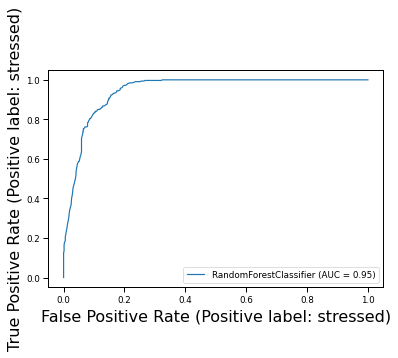

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

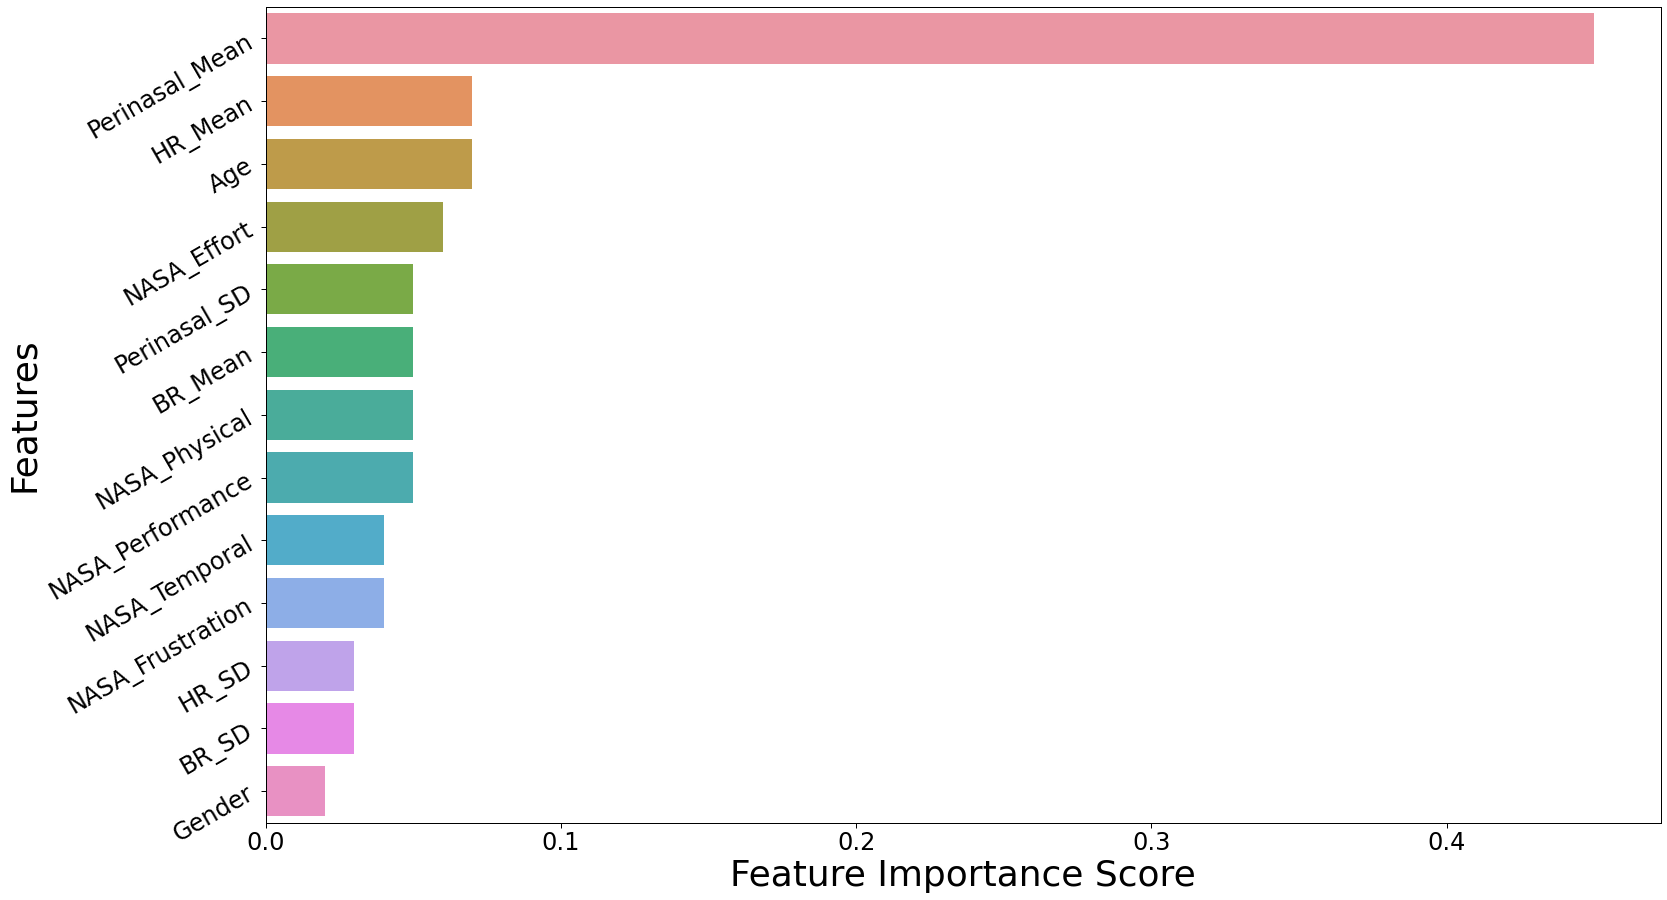

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

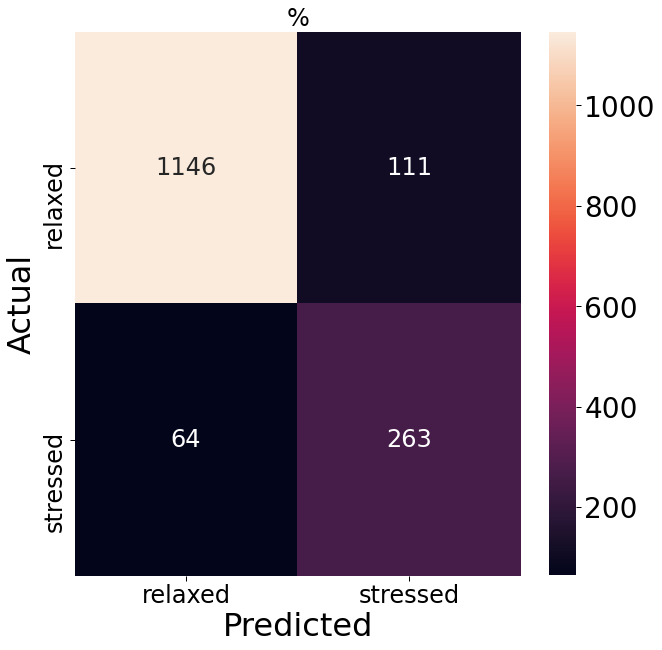

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

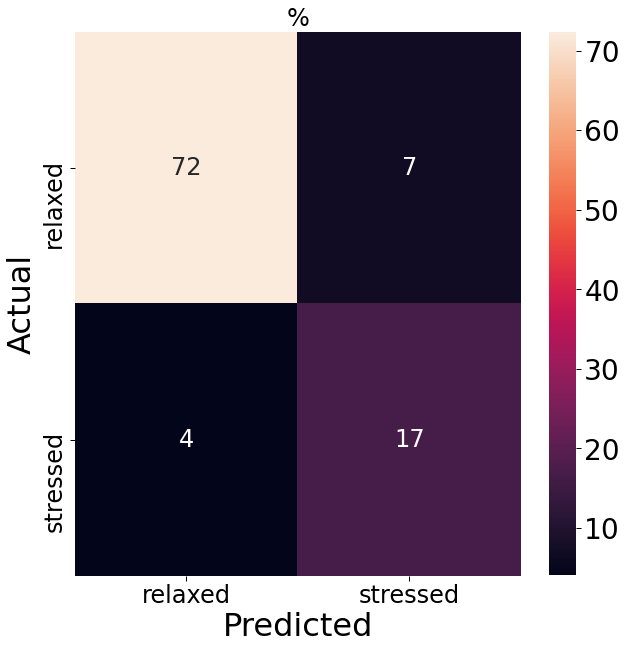



Test Subjects -->
 [18 20 23 24 25 29]


Total Train Subjects: 25    Percentage: 80.65%
Total Test Subjects: 6    Percentage: 19.35%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          75.570732
stressed         24.429268

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          93.754941
stressed          6.245059


Total Train Rows: 5125    Percentage: 80.2%
Total Test Rows: 1265    Percentage: 19.8%


Accuracy:0.97
AUC: 0.9
F1: 0.97
Recall: 0.97
Precision: 0.97
Specificity: 0.99





<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

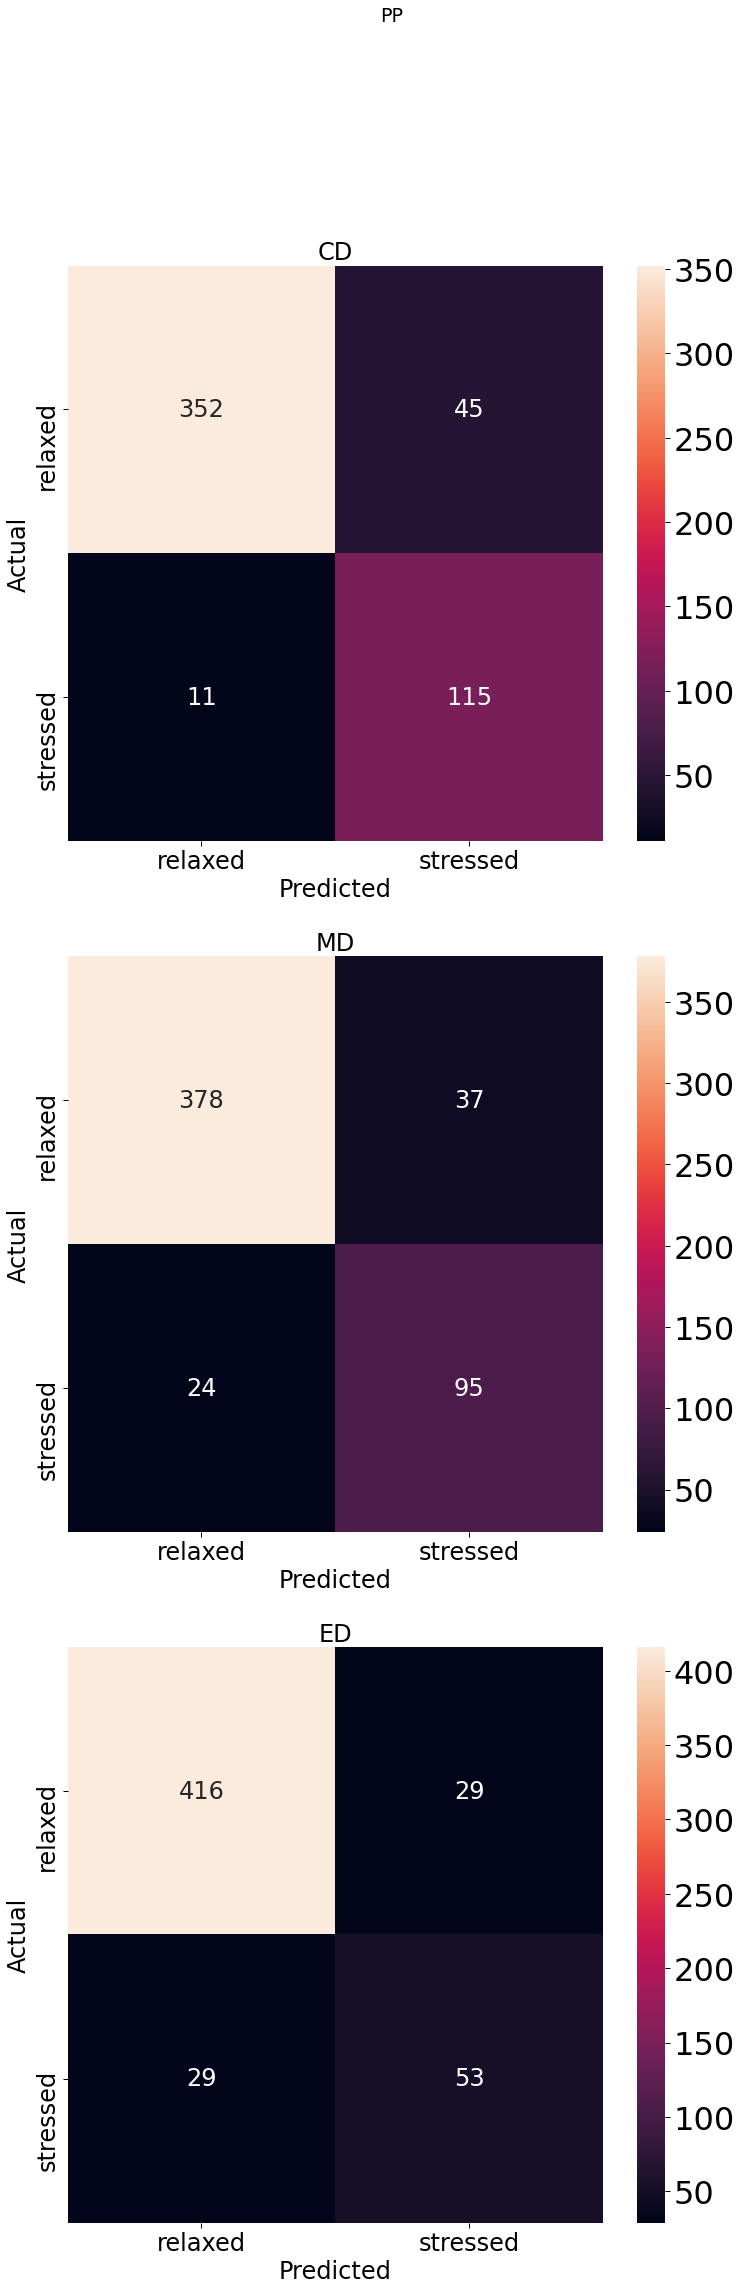

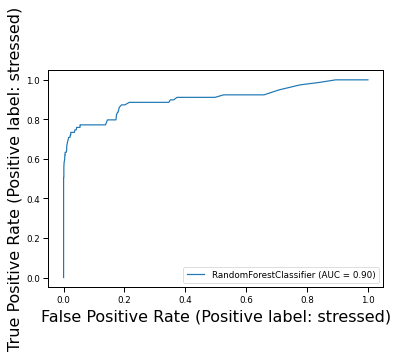

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

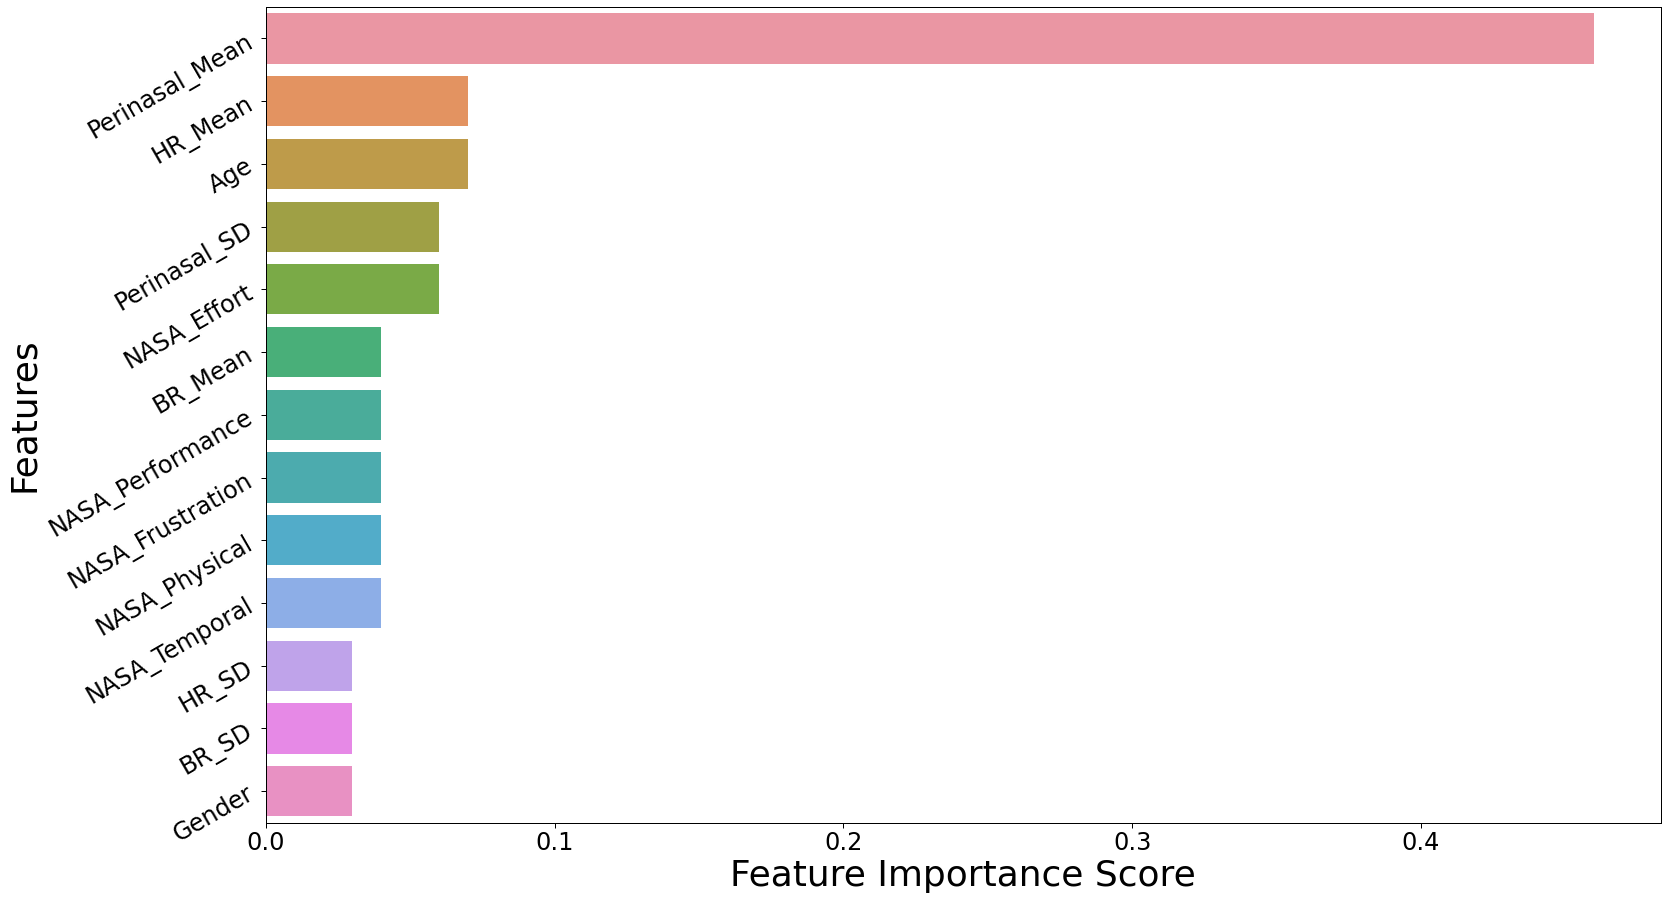

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

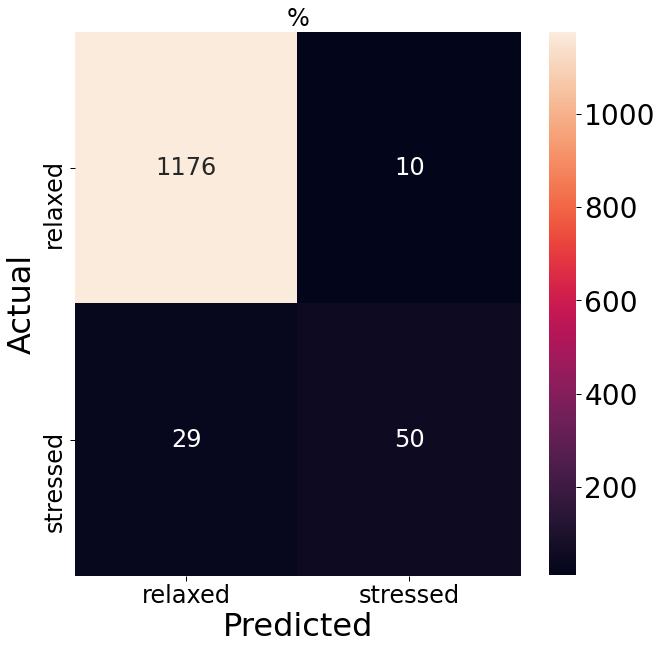

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

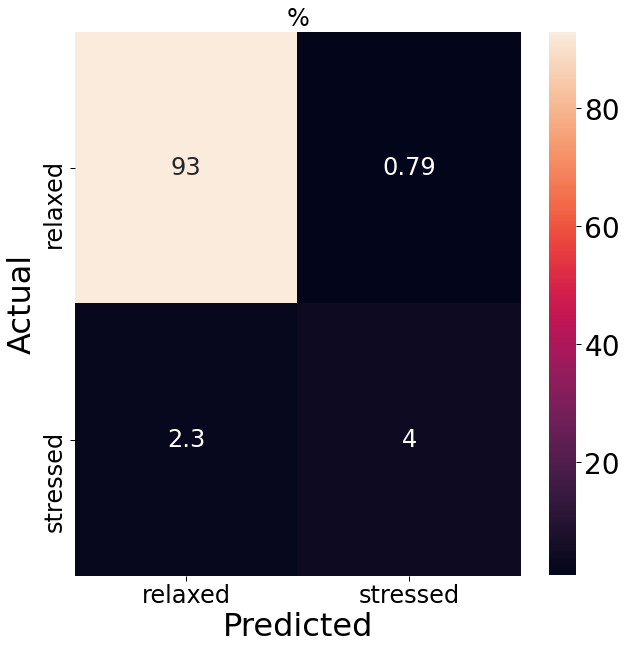



Test Subjects -->
 [31 33 36 38 39 43]


Total Train Subjects: 25    Percentage: 80.65%
Total Test Subjects: 6    Percentage: 19.35%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          78.074104
stressed         21.925896

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          82.814614
stressed         17.185386


Total Train Rows: 4912    Percentage: 76.87%
Total Test Rows: 1478    Percentage: 23.13%


Accuracy:0.72
AUC: 0.84
F1: 0.76
Recall: 0.72
Precision: 0.86
Specificity: 0.7





<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

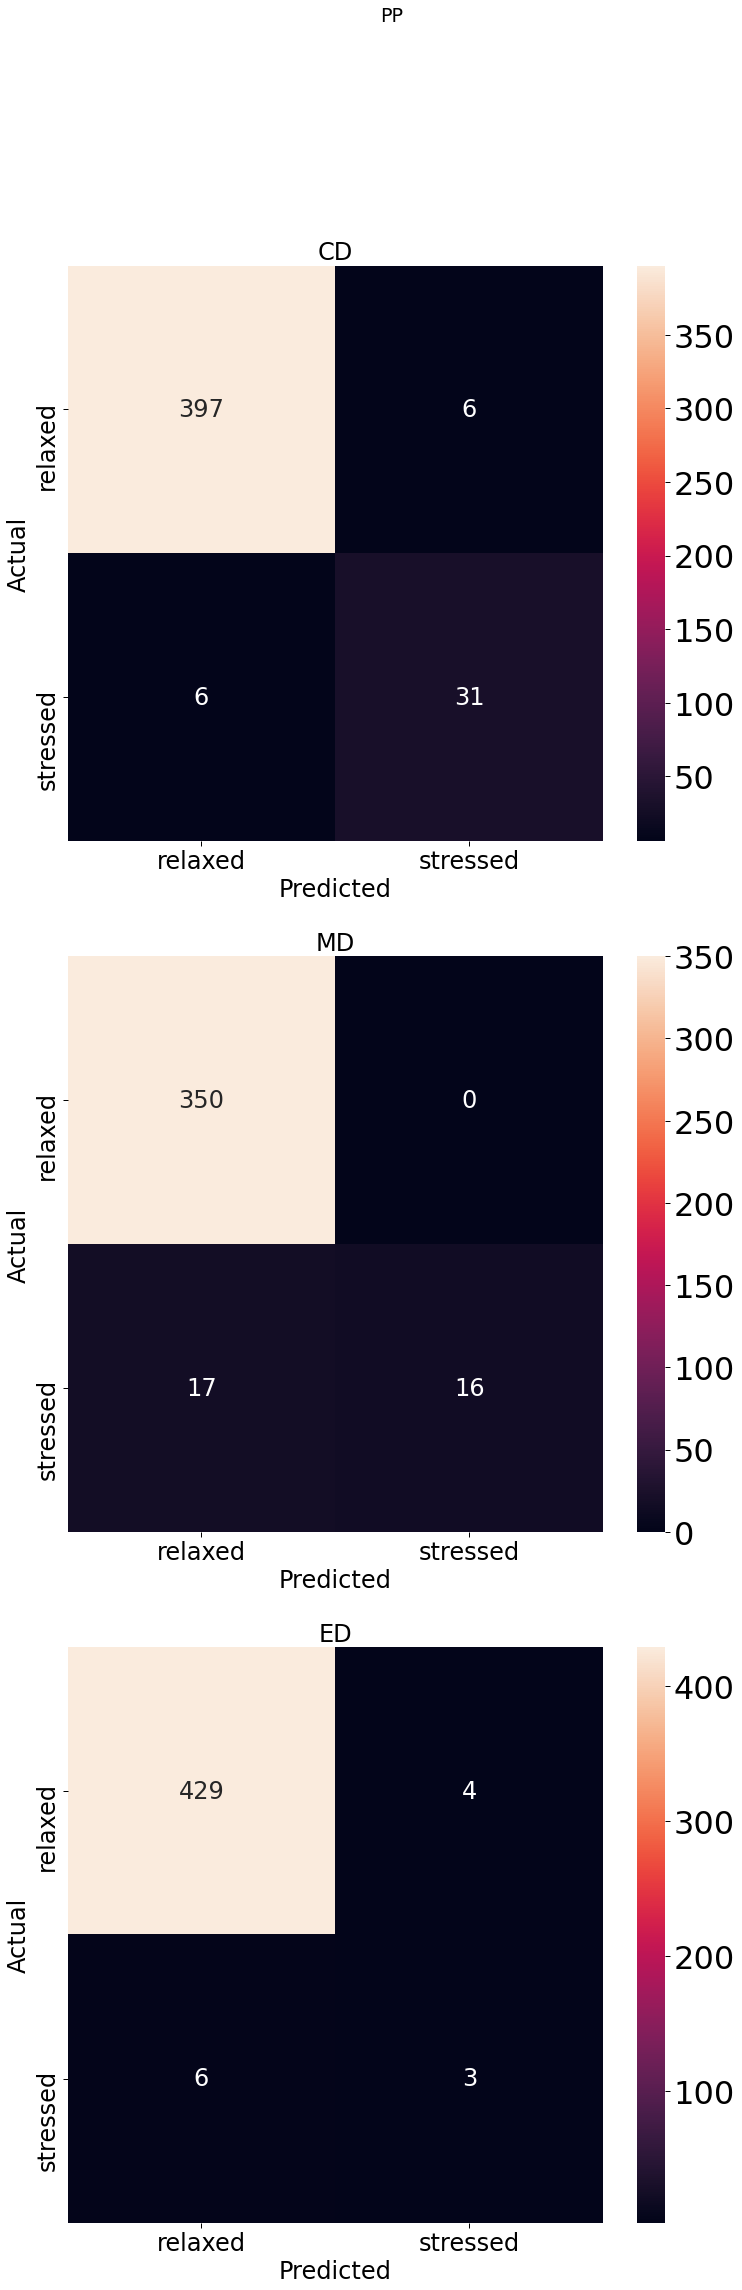

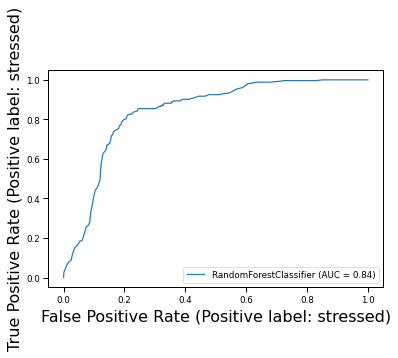

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

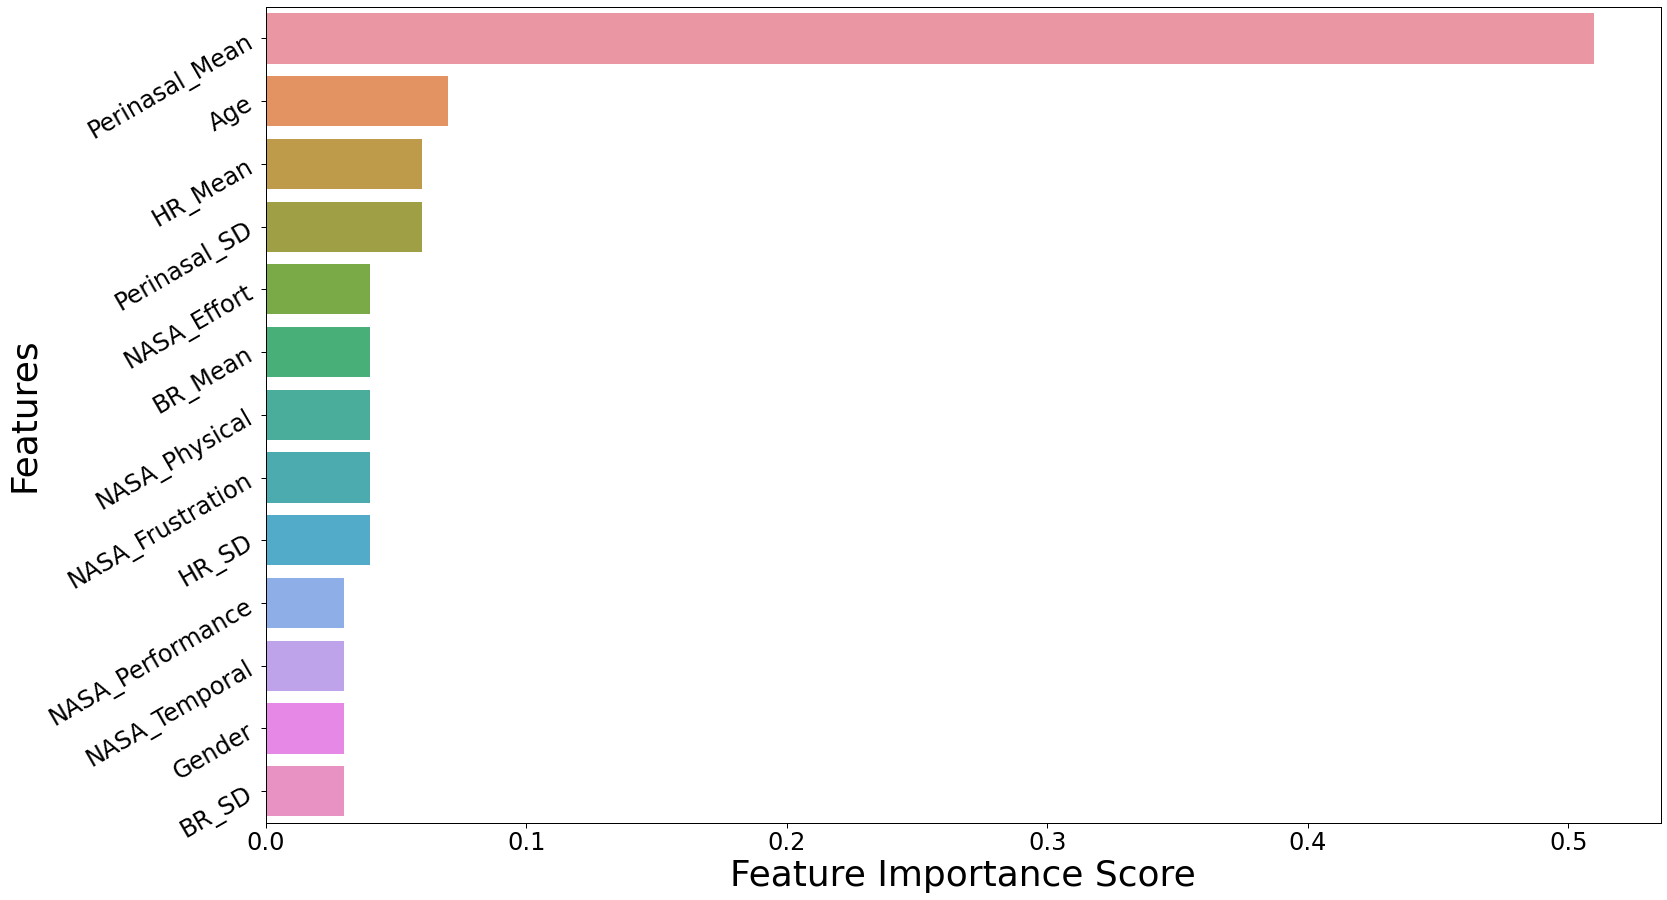

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

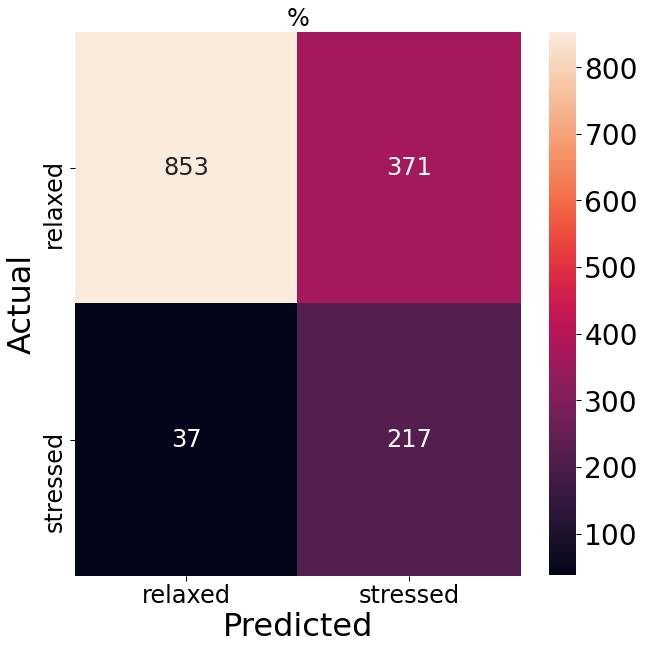

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

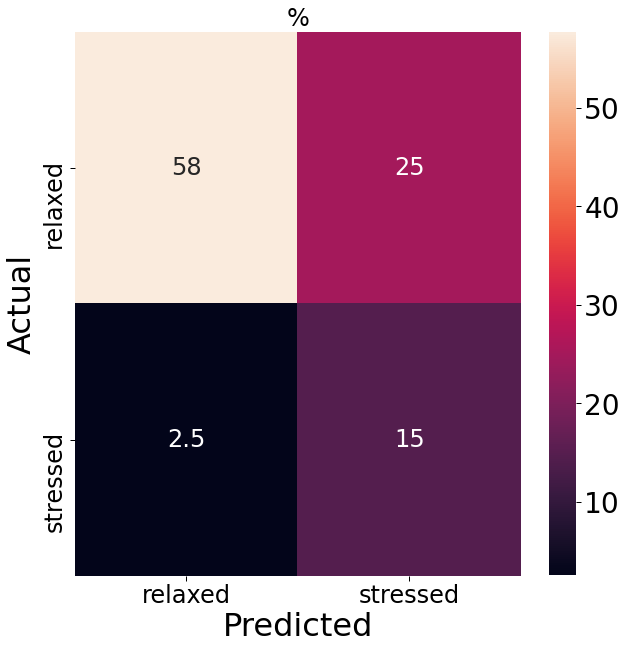



Test Subjects -->
 [44 45 47 60 61 62]


Total Train Subjects: 25    Percentage: 80.65%
Total Test Subjects: 6    Percentage: 19.35%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          80.291832
stressed         19.708168

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          73.854447
stressed         26.145553


Total Train Rows: 5277    Percentage: 82.58%
Total Test Rows: 1113    Percentage: 17.42%


Accuracy:0.77
AUC: 0.87
F1: 0.77
Recall: 0.77
Precision: 0.77
Specificity: 0.85





<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

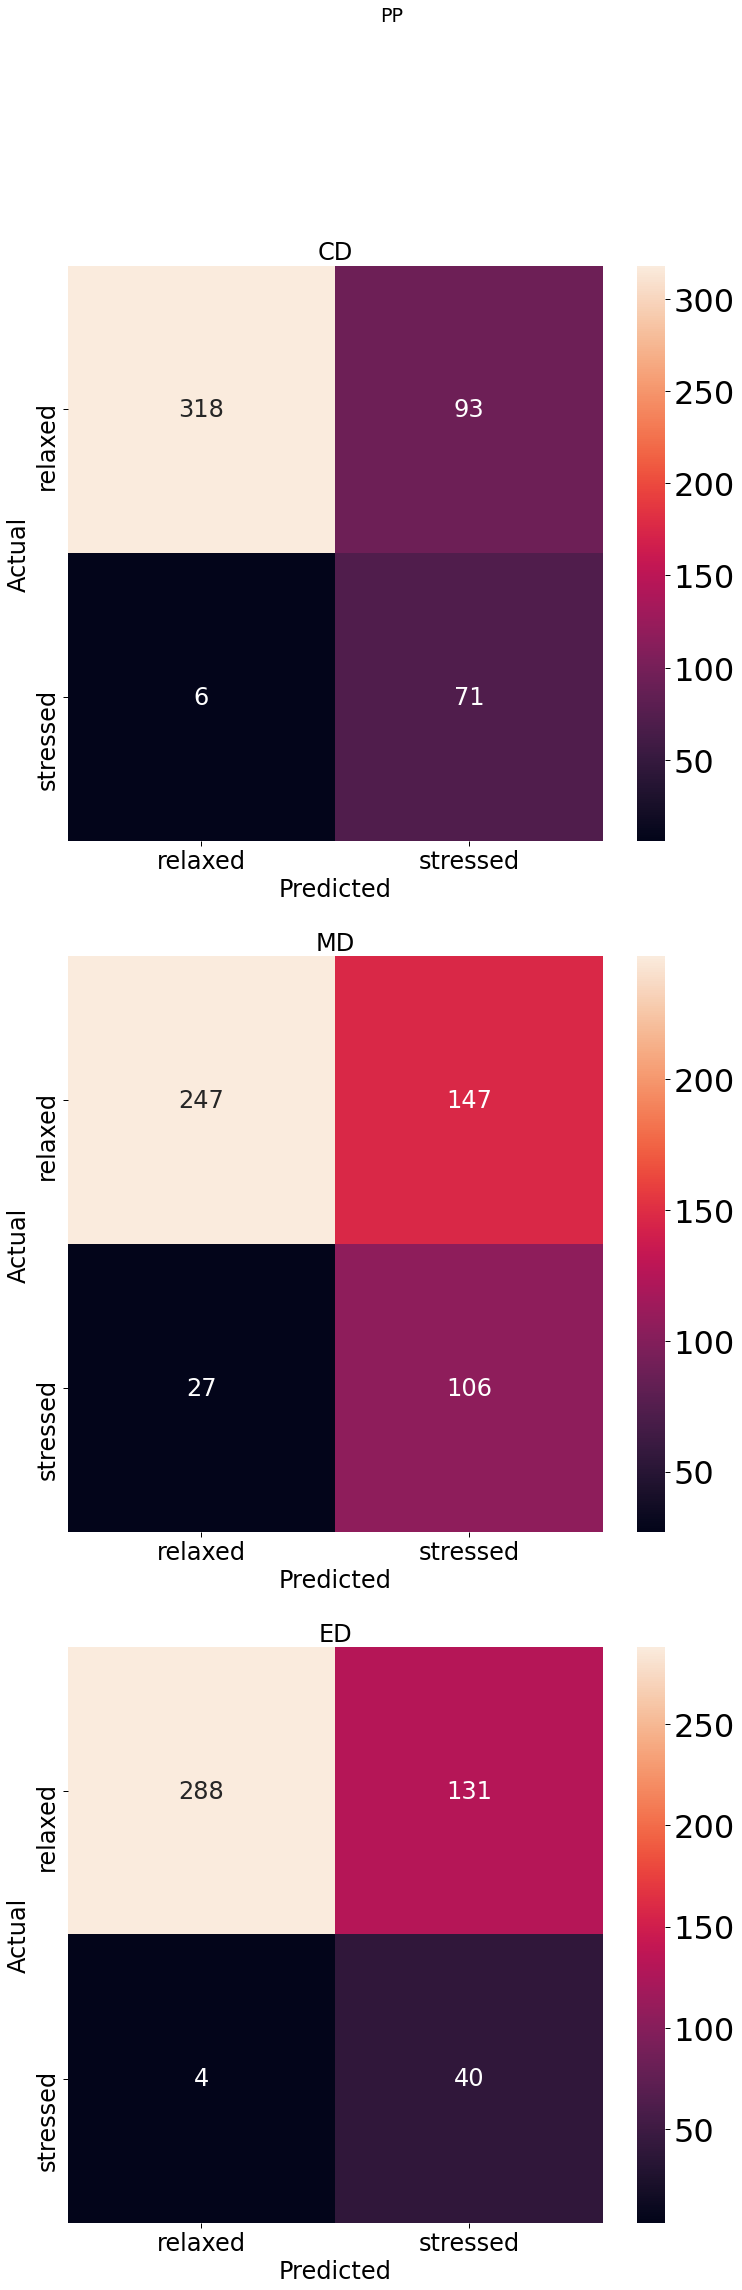

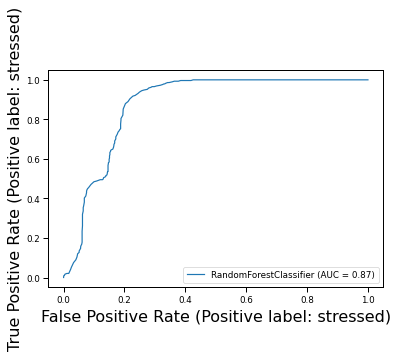

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

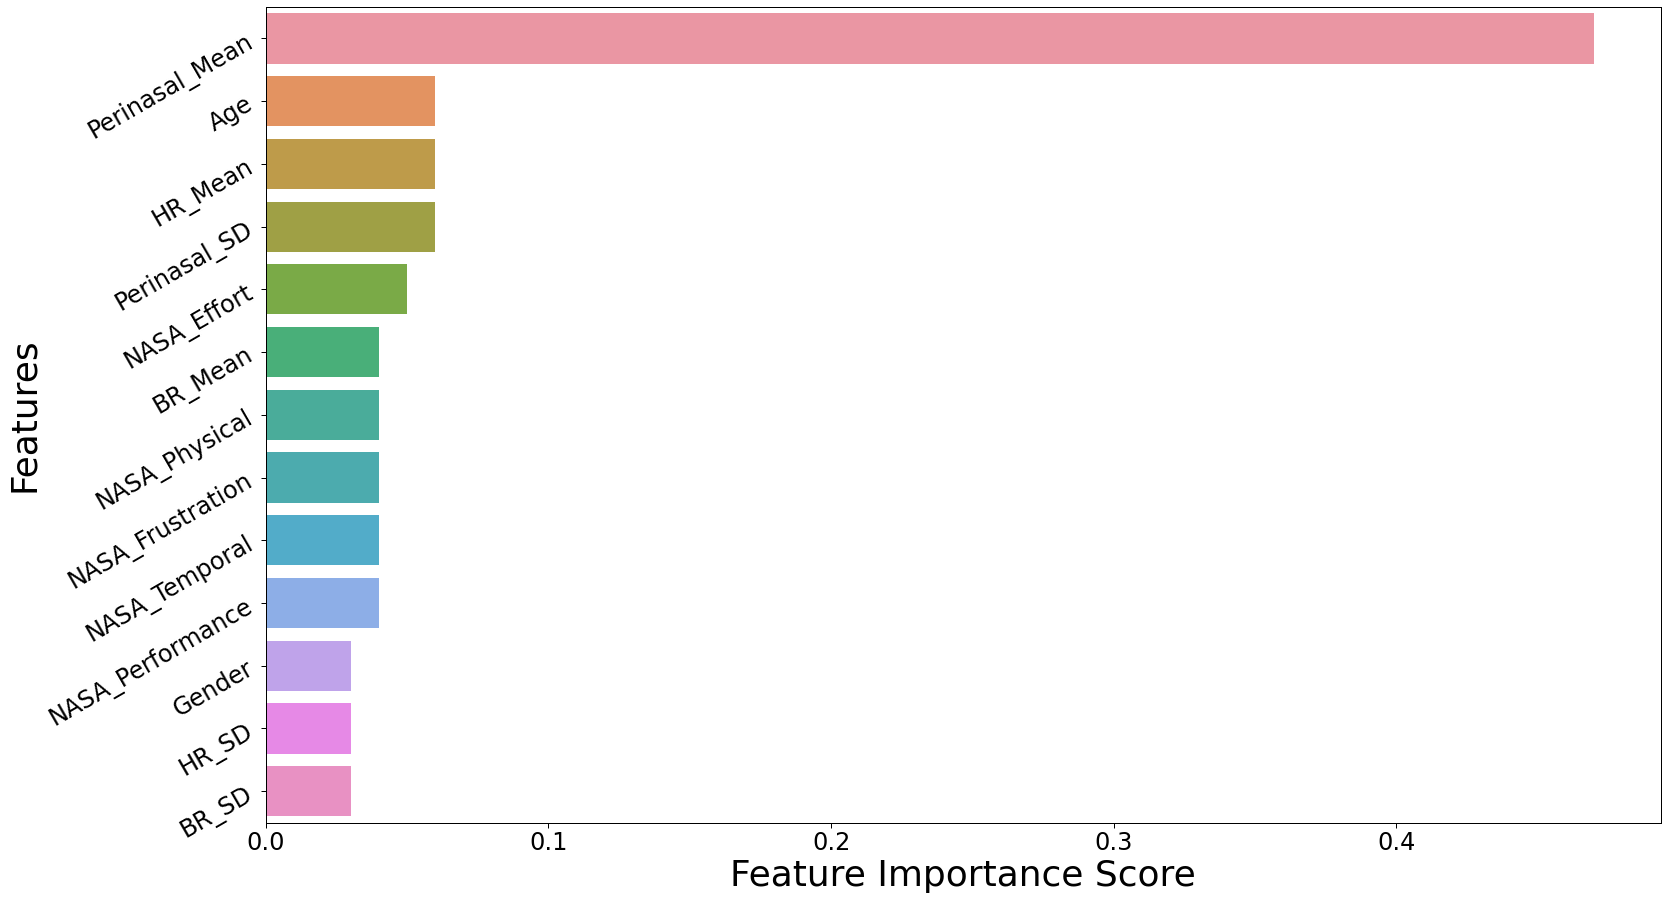

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

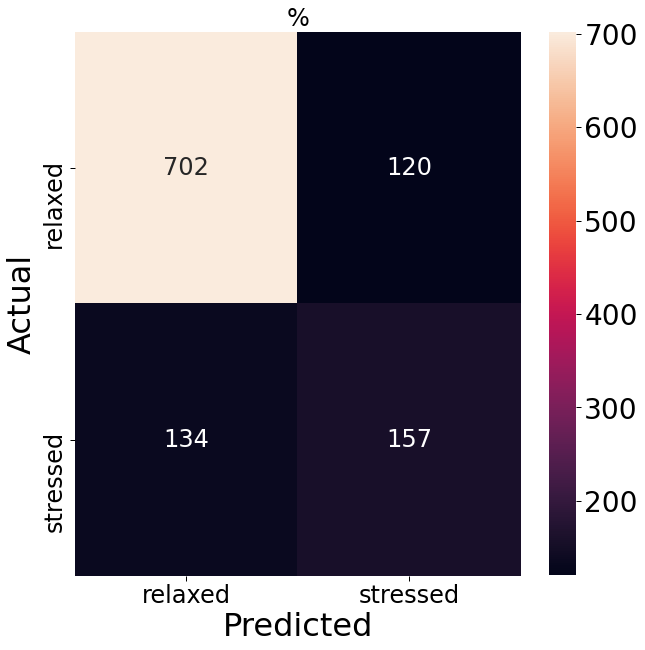

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

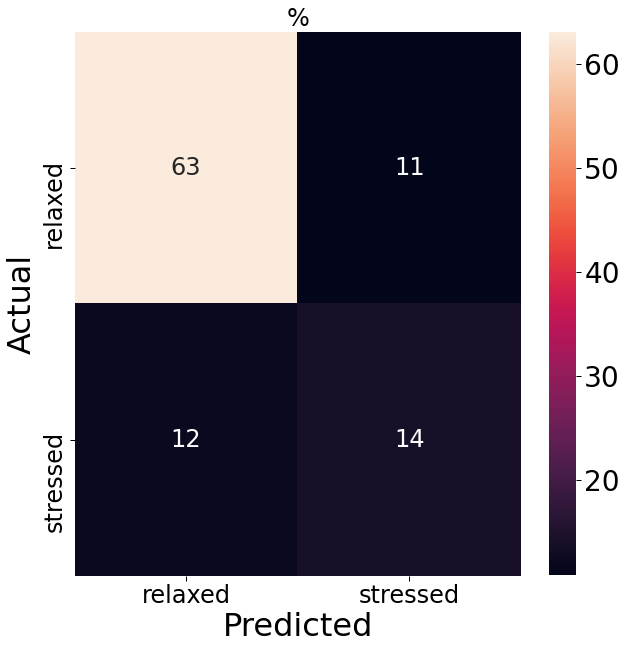



Test Subjects -->
 [66 77 79 80 81 84]


Total Train Subjects: 25    Percentage: 80.65%
Total Test Subjects: 6    Percentage: 19.35%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          82.518382
stressed         17.481618

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed               60.0
stressed              40.0


Total Train Rows: 5440    Percentage: 85.13%
Total Test Rows: 950    Percentage: 14.87%


Accuracy:0.83
AUC: 0.94
F1: 0.82
Recall: 0.83
Precision: 0.85
Specificity: 0.96





<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

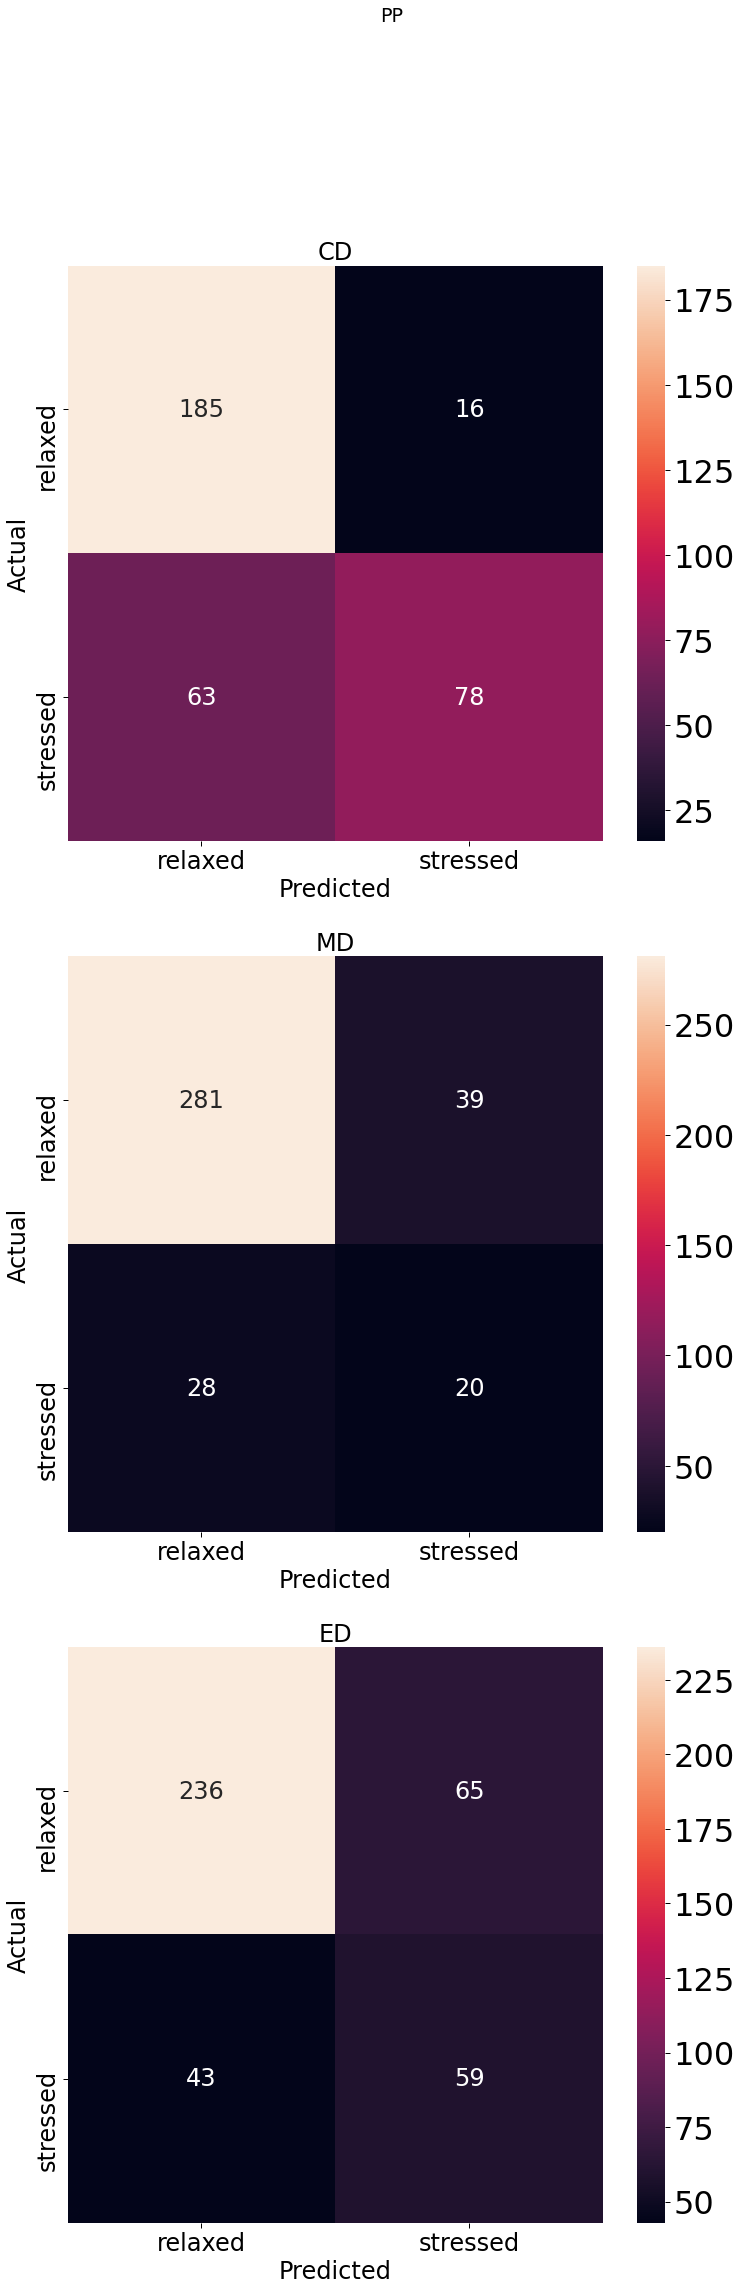

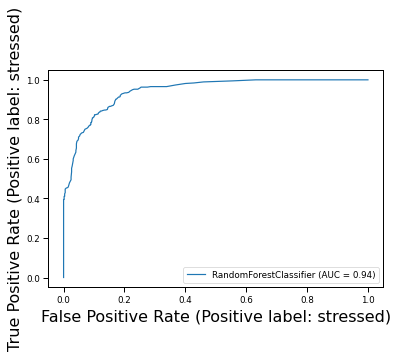

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

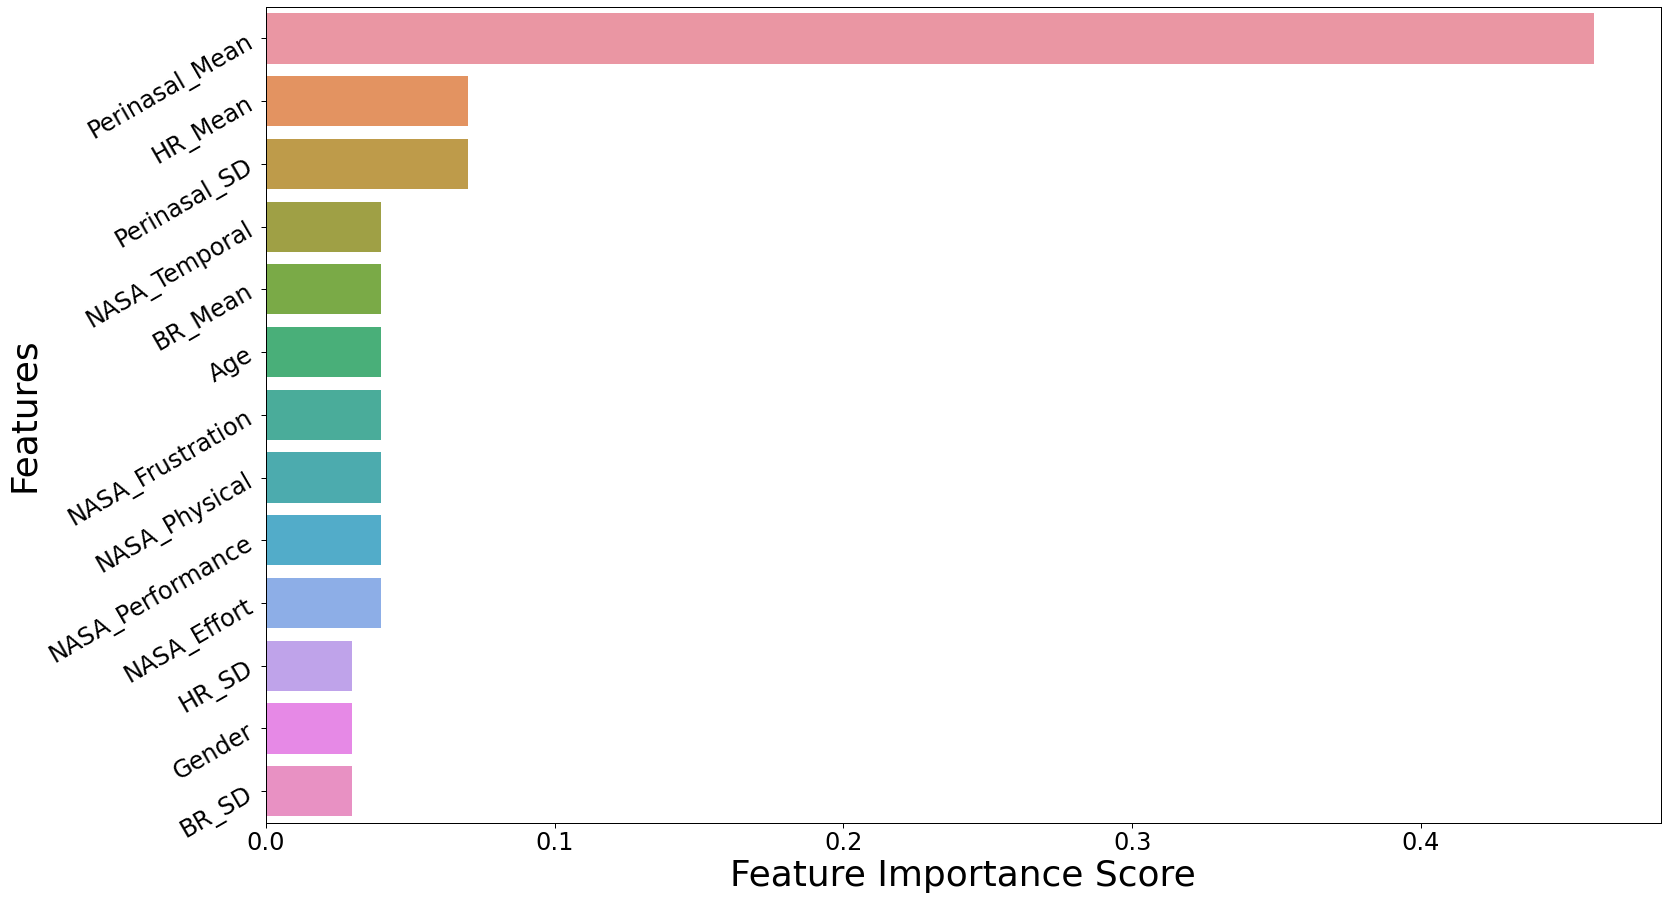

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

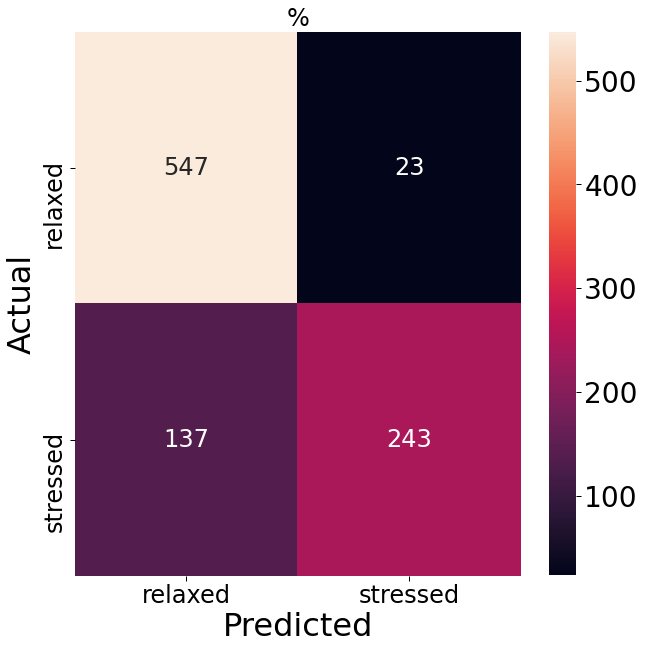

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

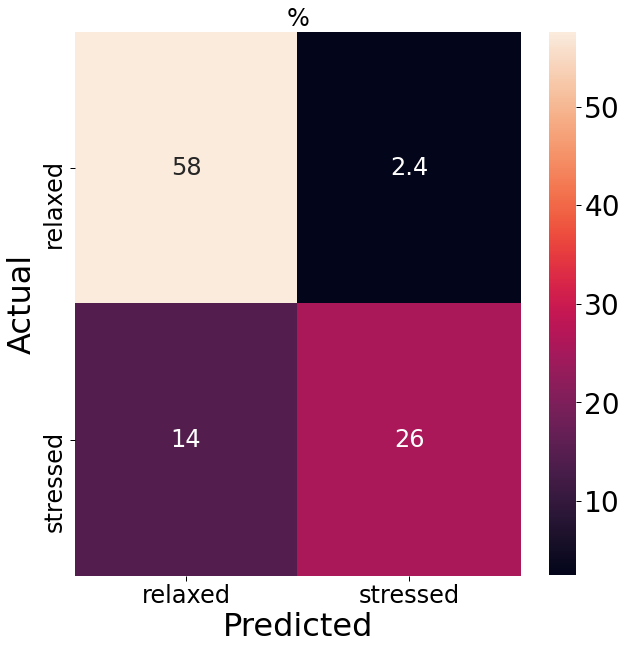

----------------------------------------------------
------------------------ PP_2 ------------------------
----------------------------------------------------



Test Subjects -->
 [ 2  3  5  8 14 16 17]


Total Train Subjects: 24    Percentage: 77.42%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed           60.11236
stressed          39.88764

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          63.194444
stressed         36.805556


Total Train Rows: 4806    Percentage: 75.21%
Total Test Rows: 1584    Percentage: 24.79%


Accuracy:0.8
AUC: 0.89
F1: 0.8
Recall: 0.8
Precision: 0.82
Specificity: 0.75





<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

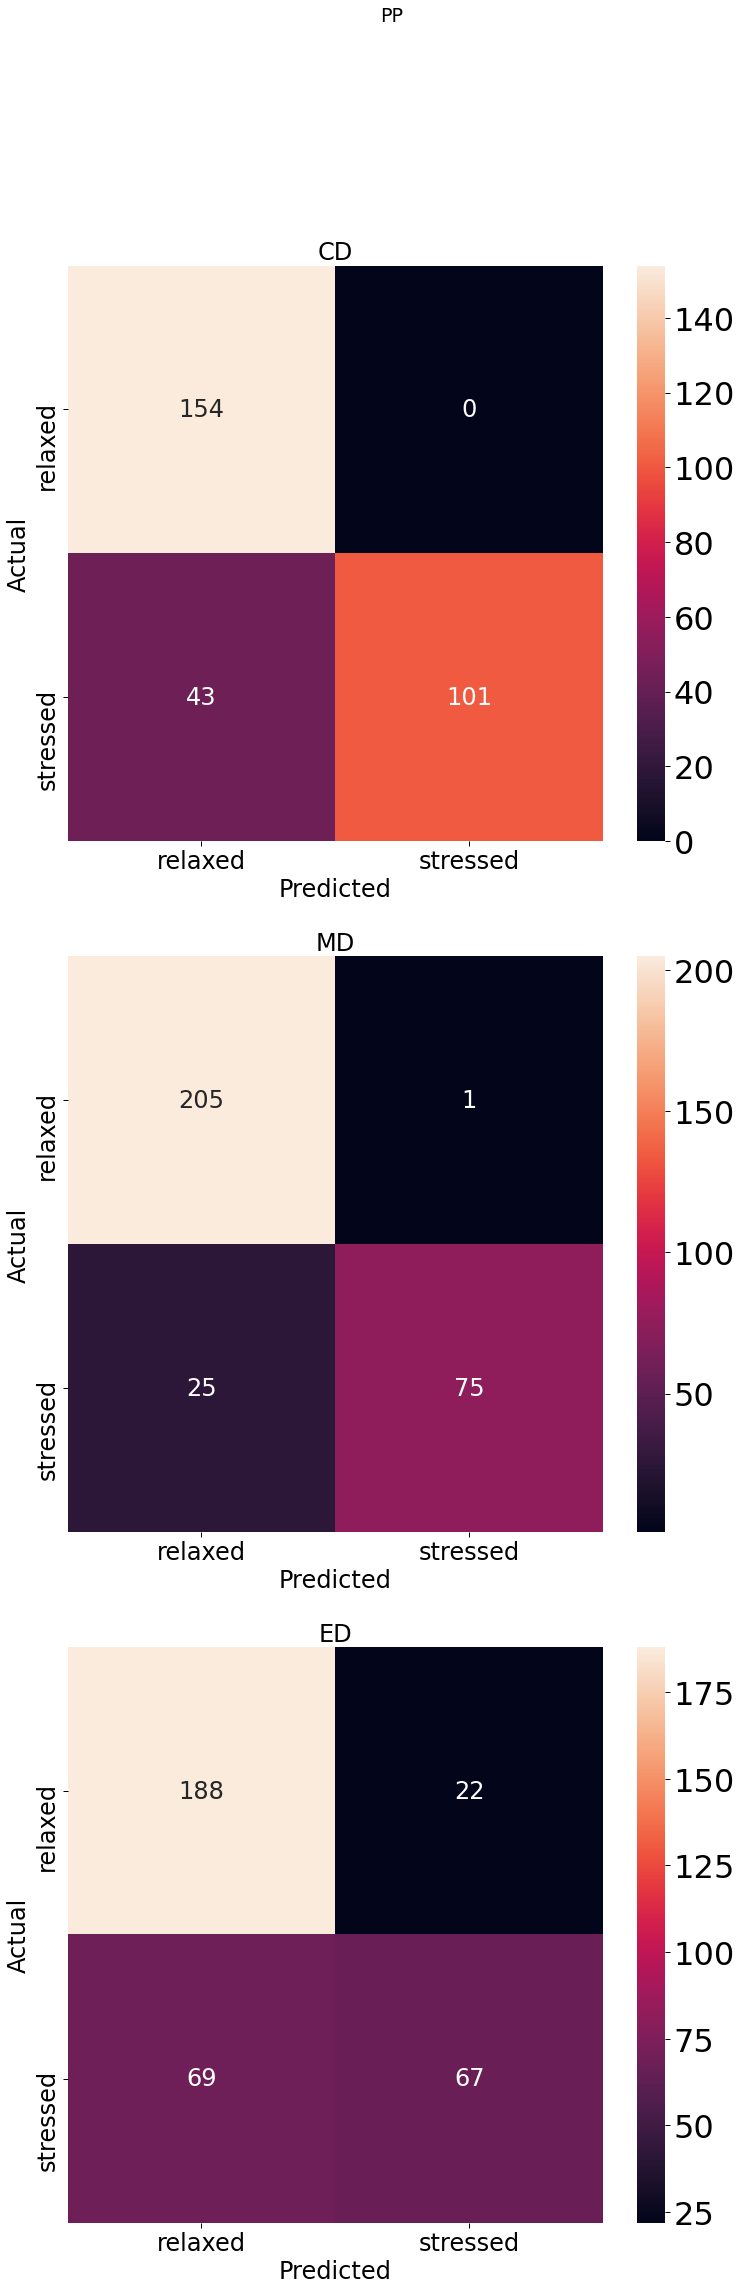

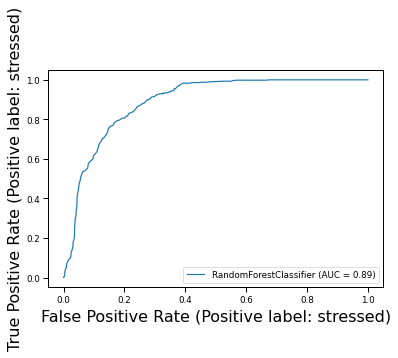

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

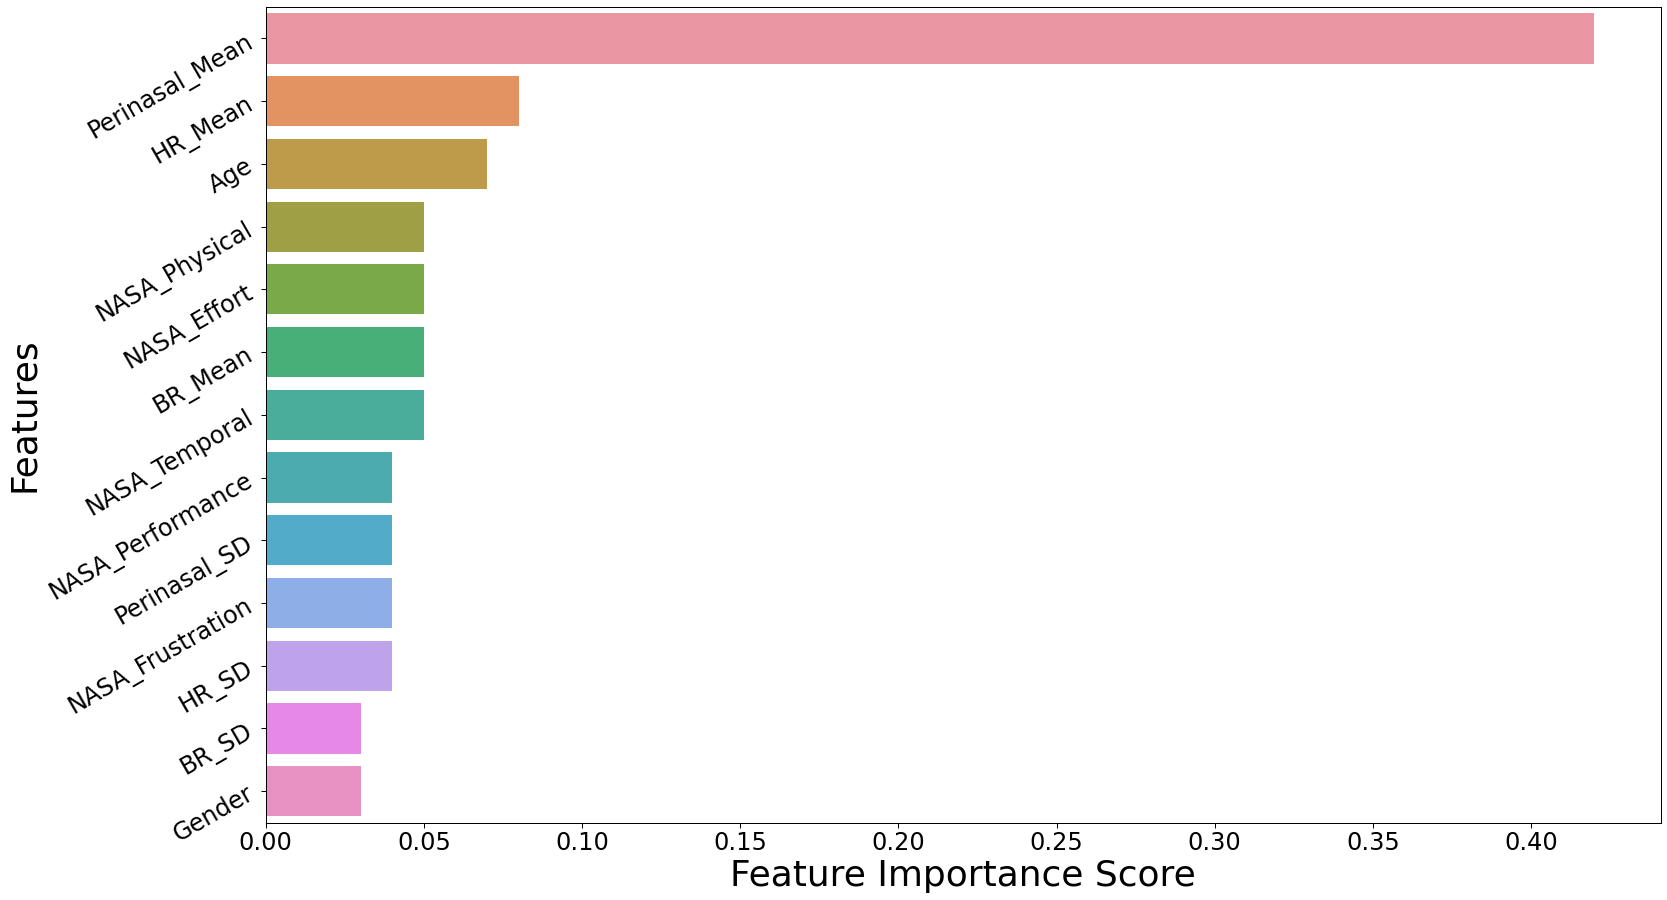

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

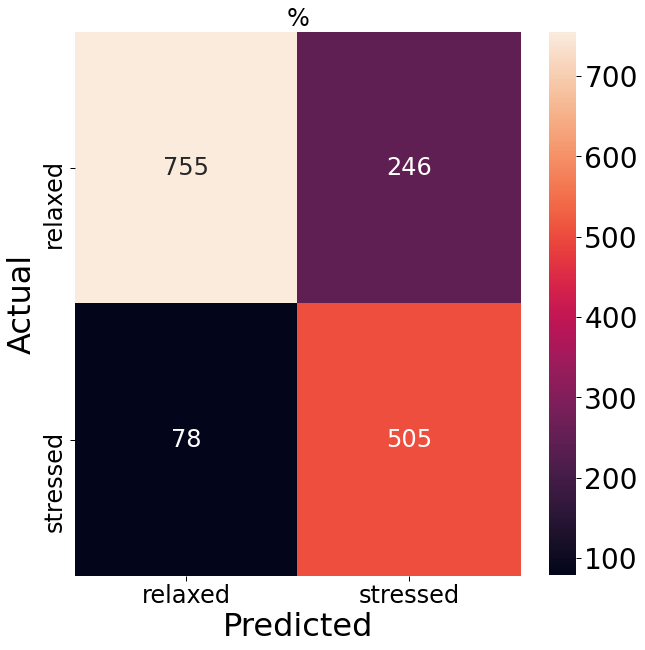

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

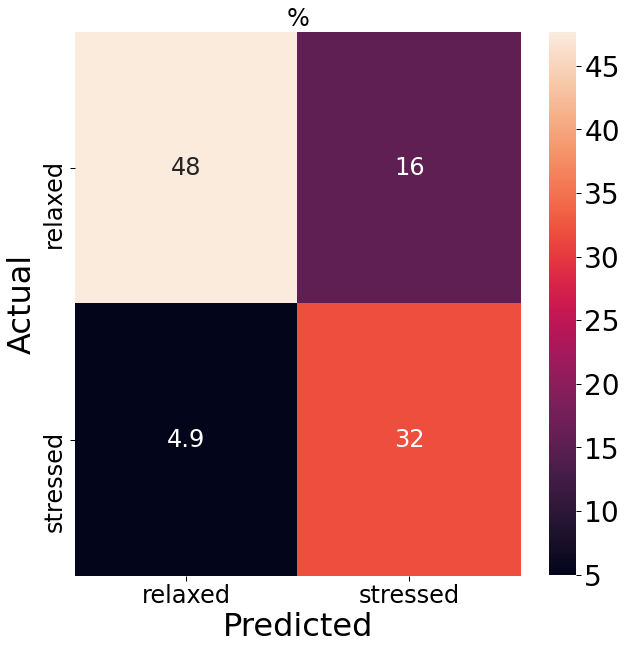



Test Subjects -->
 [18 20 23 24 25 29]


Total Train Subjects: 25    Percentage: 80.65%
Total Test Subjects: 6    Percentage: 19.35%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          58.458537
stressed         41.541463

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          70.671937
stressed         29.328063


Total Train Rows: 5125    Percentage: 80.2%
Total Test Rows: 1265    Percentage: 19.8%


Accuracy:0.82
AUC: 0.86
F1: 0.81
Recall: 0.82
Precision: 0.81
Specificity: 0.88





<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

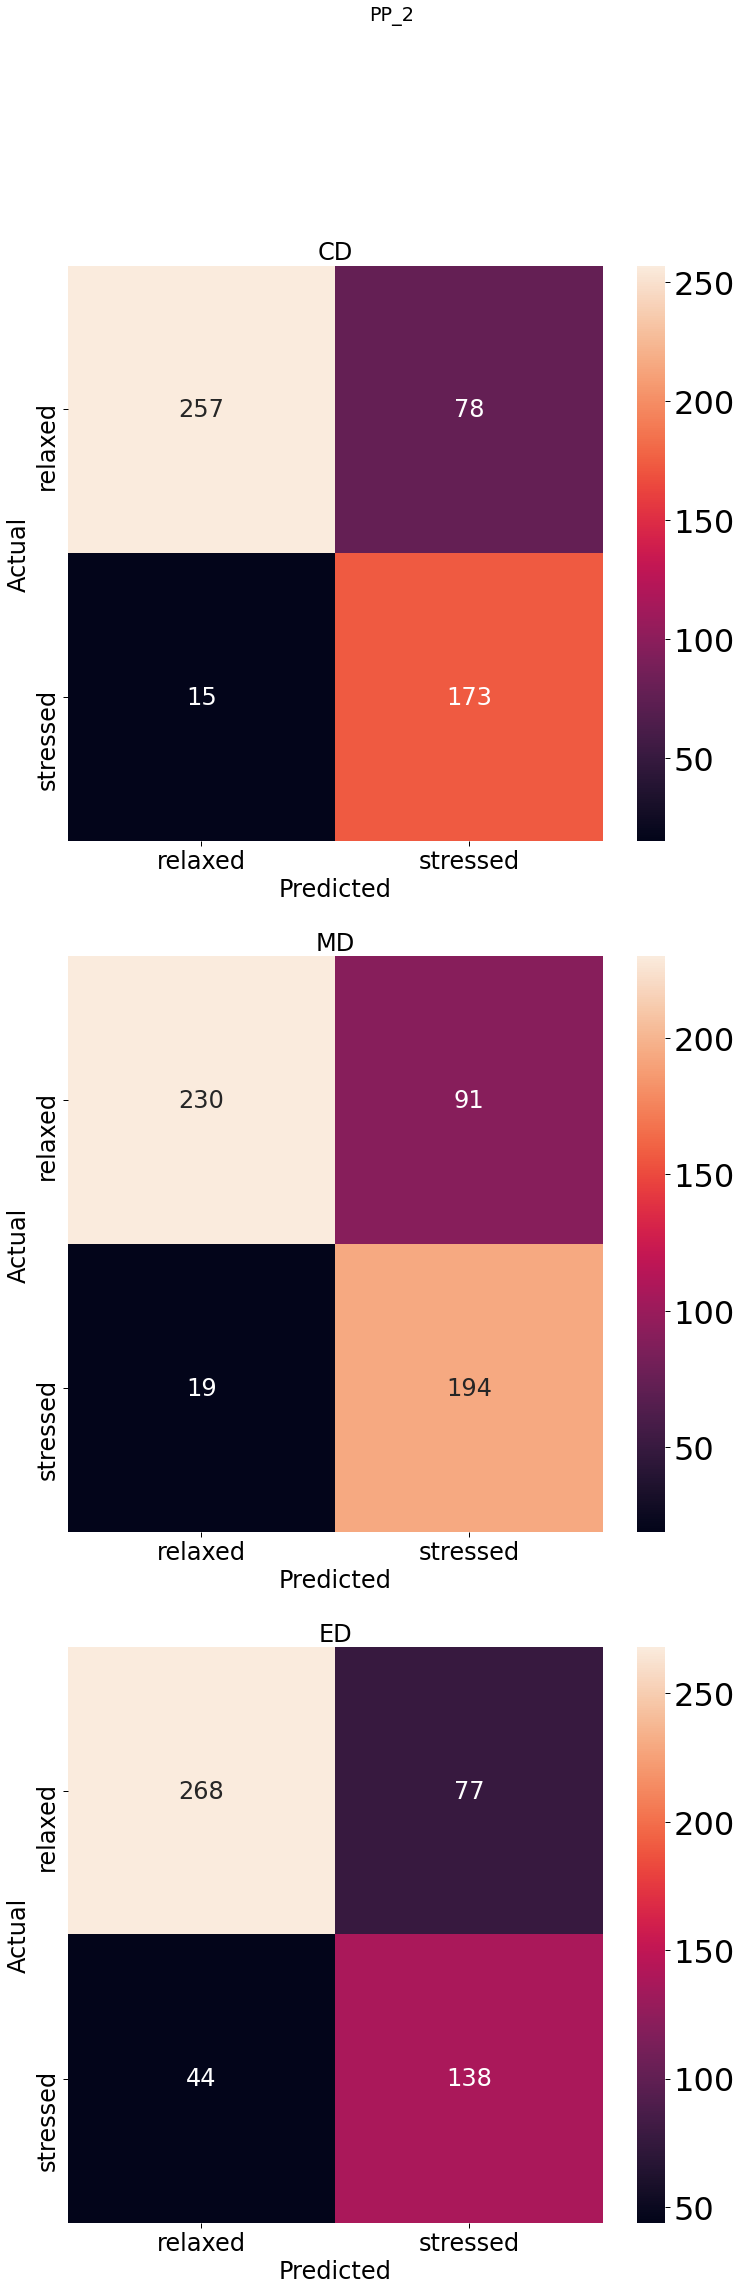

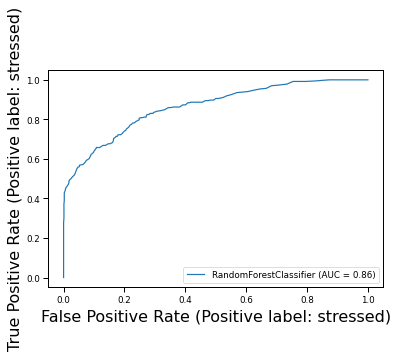

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

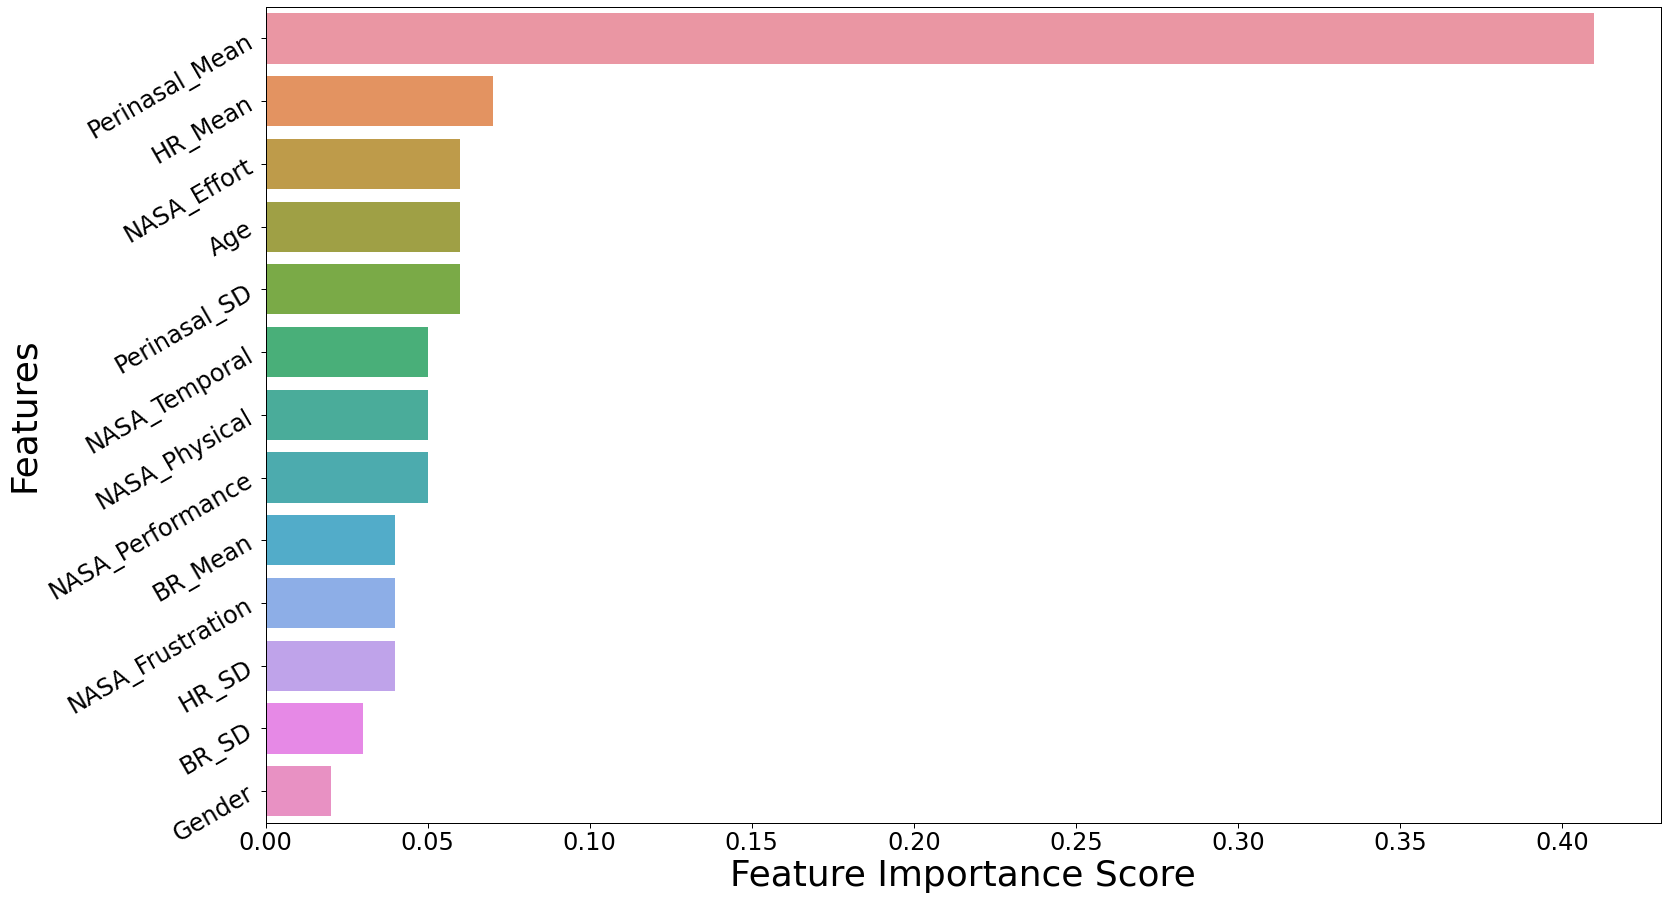

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

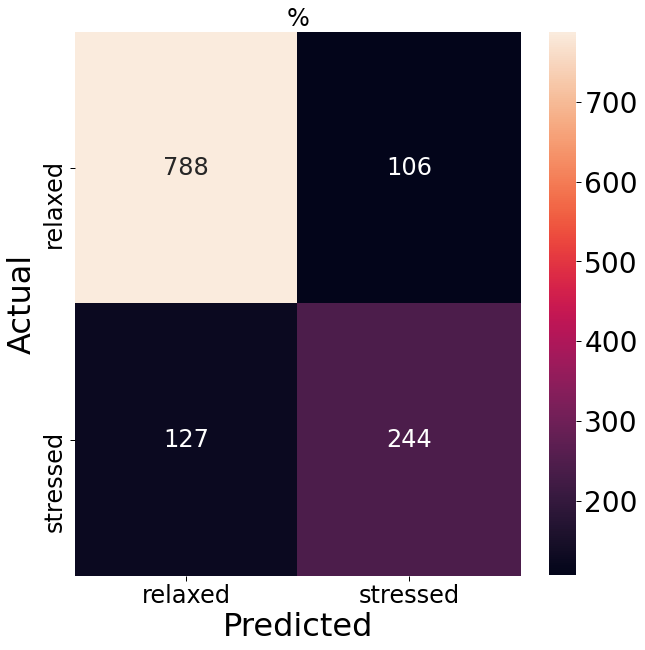

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

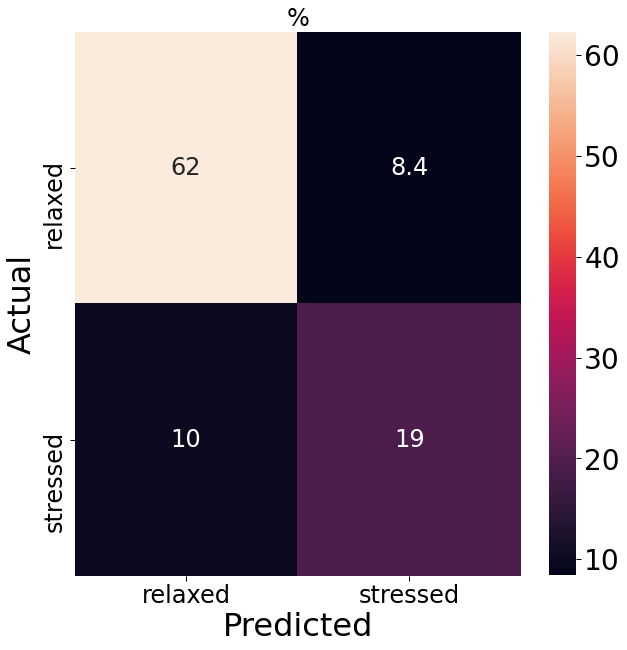



Test Subjects -->
 [31 33 36 38 39 43]


Total Train Subjects: 25    Percentage: 80.65%
Total Test Subjects: 6    Percentage: 19.35%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          60.158795
stressed         39.841205

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          63.261164
stressed         36.738836


Total Train Rows: 4912    Percentage: 76.87%
Total Test Rows: 1478    Percentage: 23.13%


Accuracy:0.66
AUC: 0.73
F1: 0.67
Recall: 0.66
Precision: 0.72
Specificity: 0.59





<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

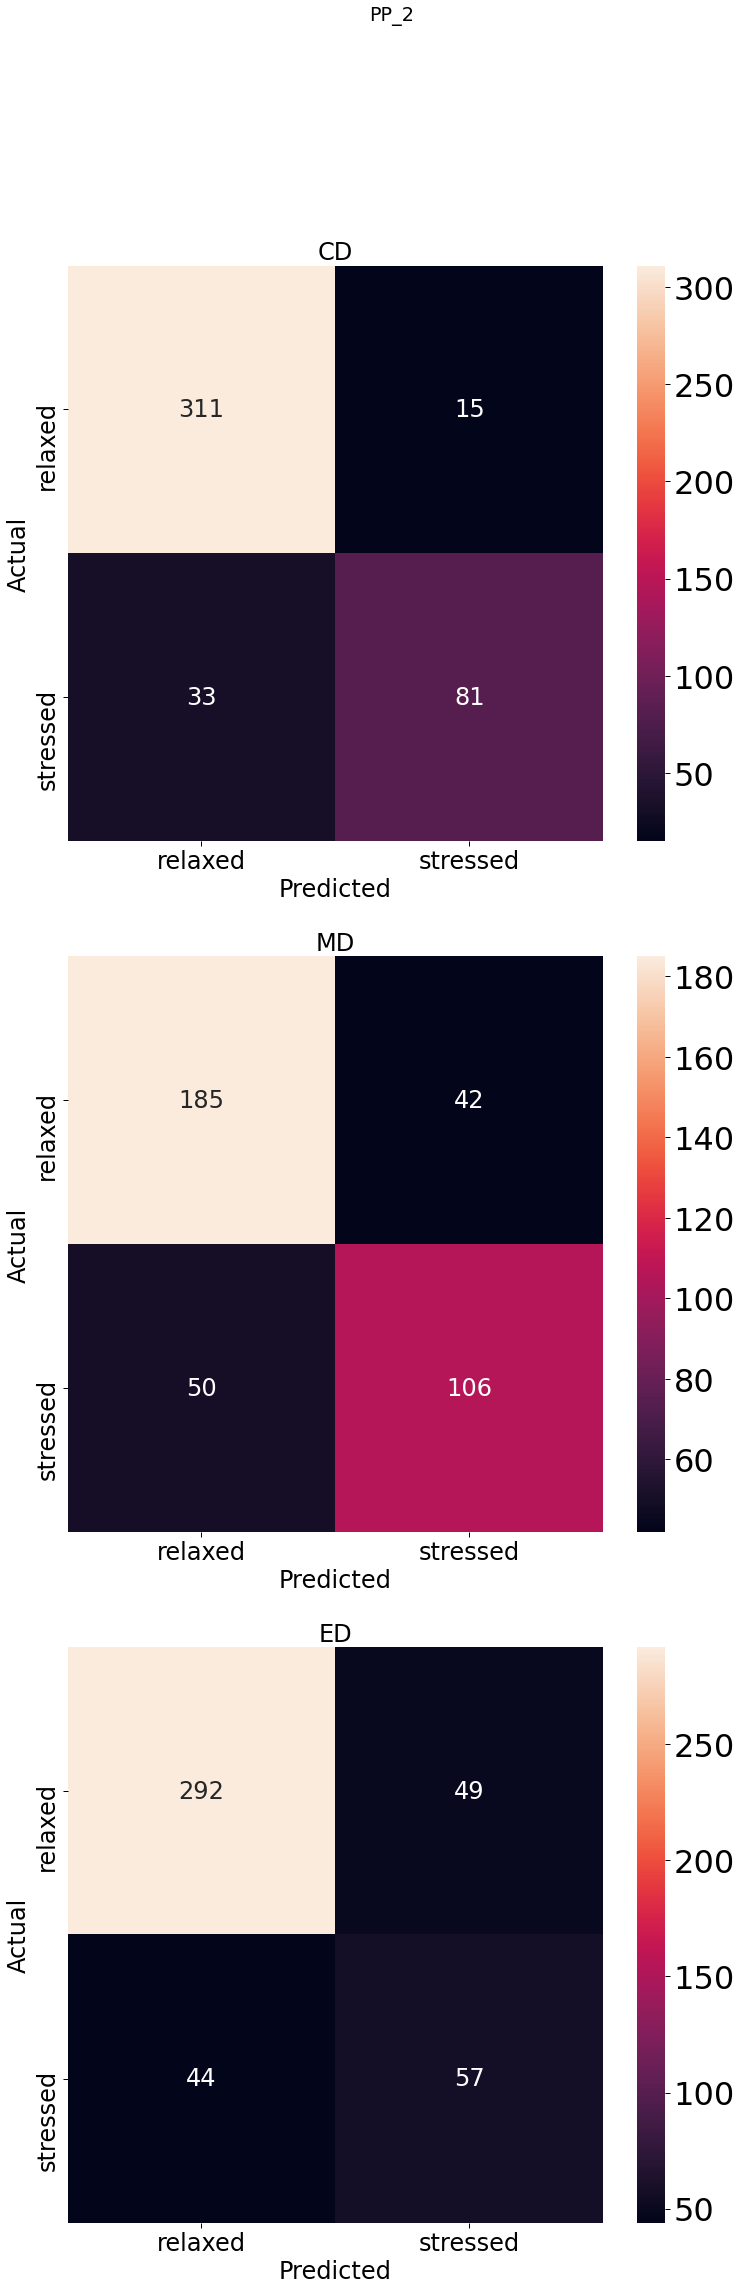

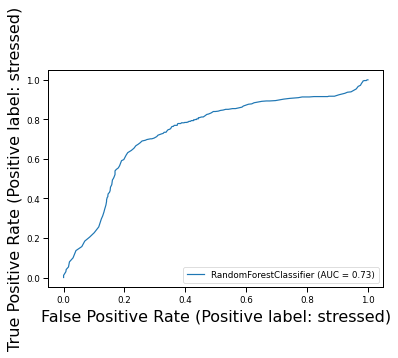

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

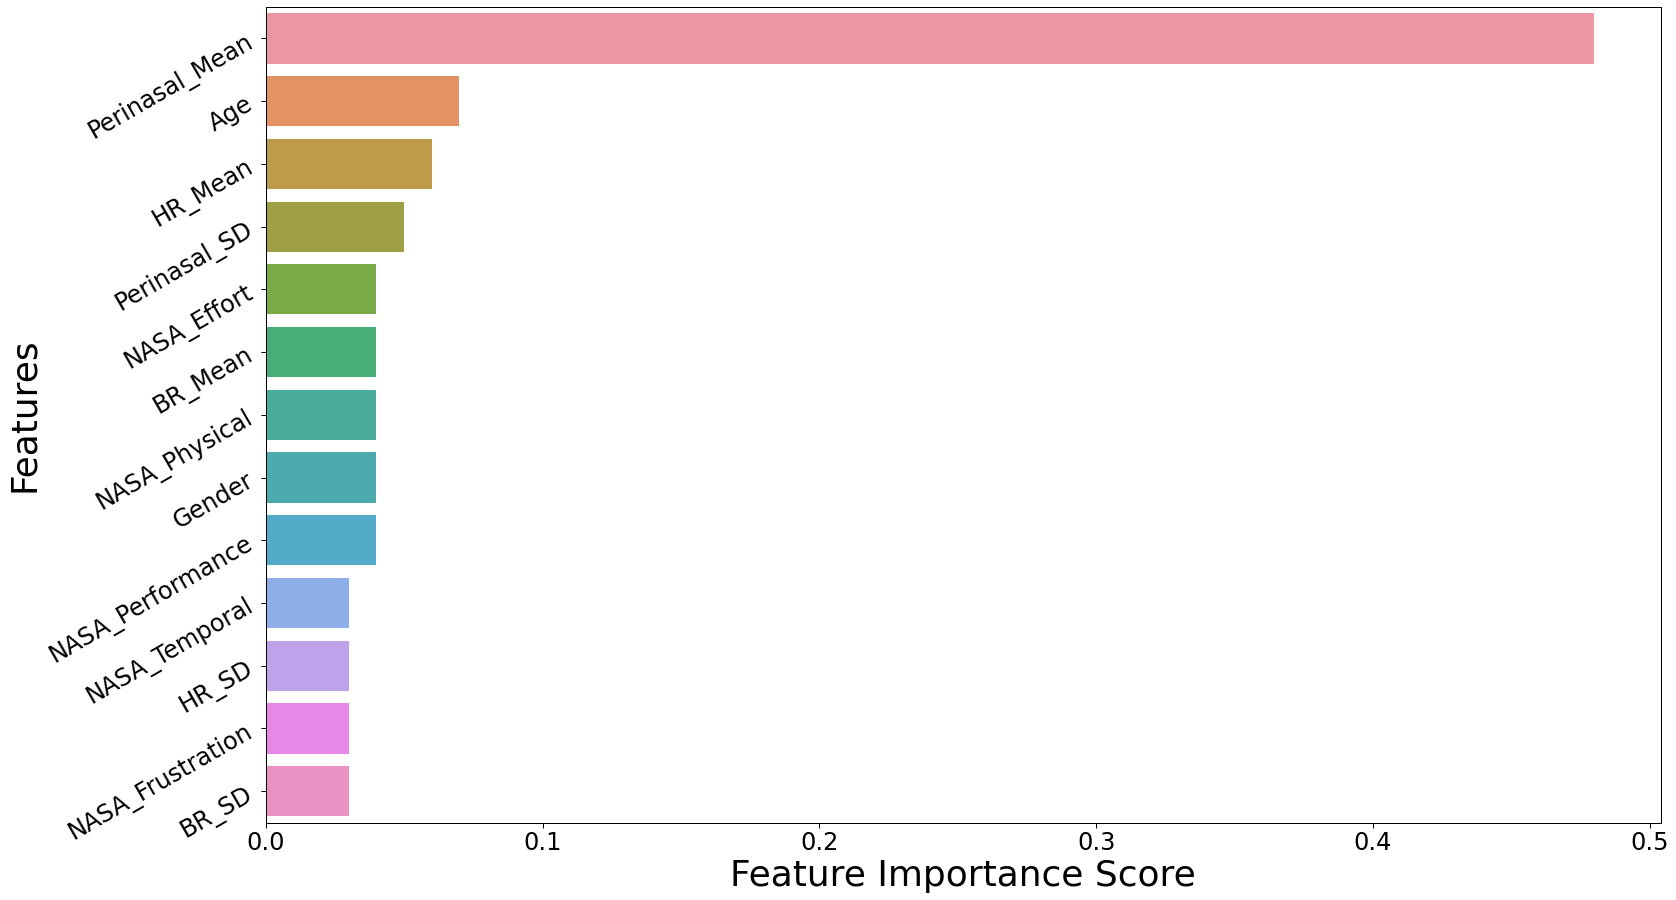

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

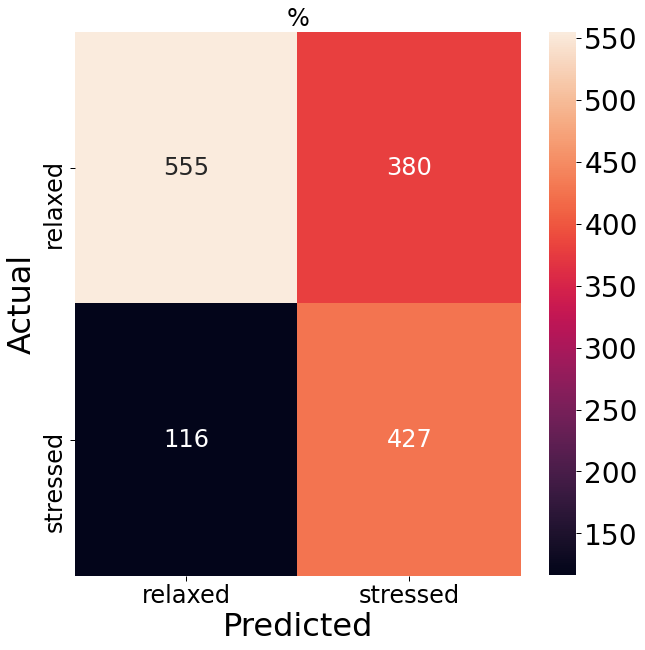

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

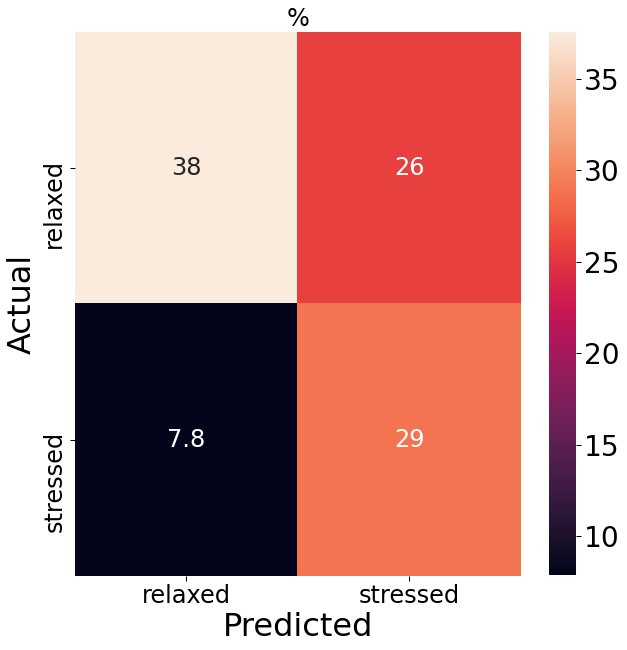



Test Subjects -->
 [44 45 47 60 61 62]


Total Train Subjects: 25    Percentage: 80.65%
Total Test Subjects: 6    Percentage: 19.35%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          61.815425
stressed         38.184575

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          56.424079
stressed         43.575921


Total Train Rows: 5277    Percentage: 82.58%
Total Test Rows: 1113    Percentage: 17.42%


Accuracy:0.73
AUC: 0.83
F1: 0.73
Recall: 0.73
Precision: 0.73
Specificity: 0.76





<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

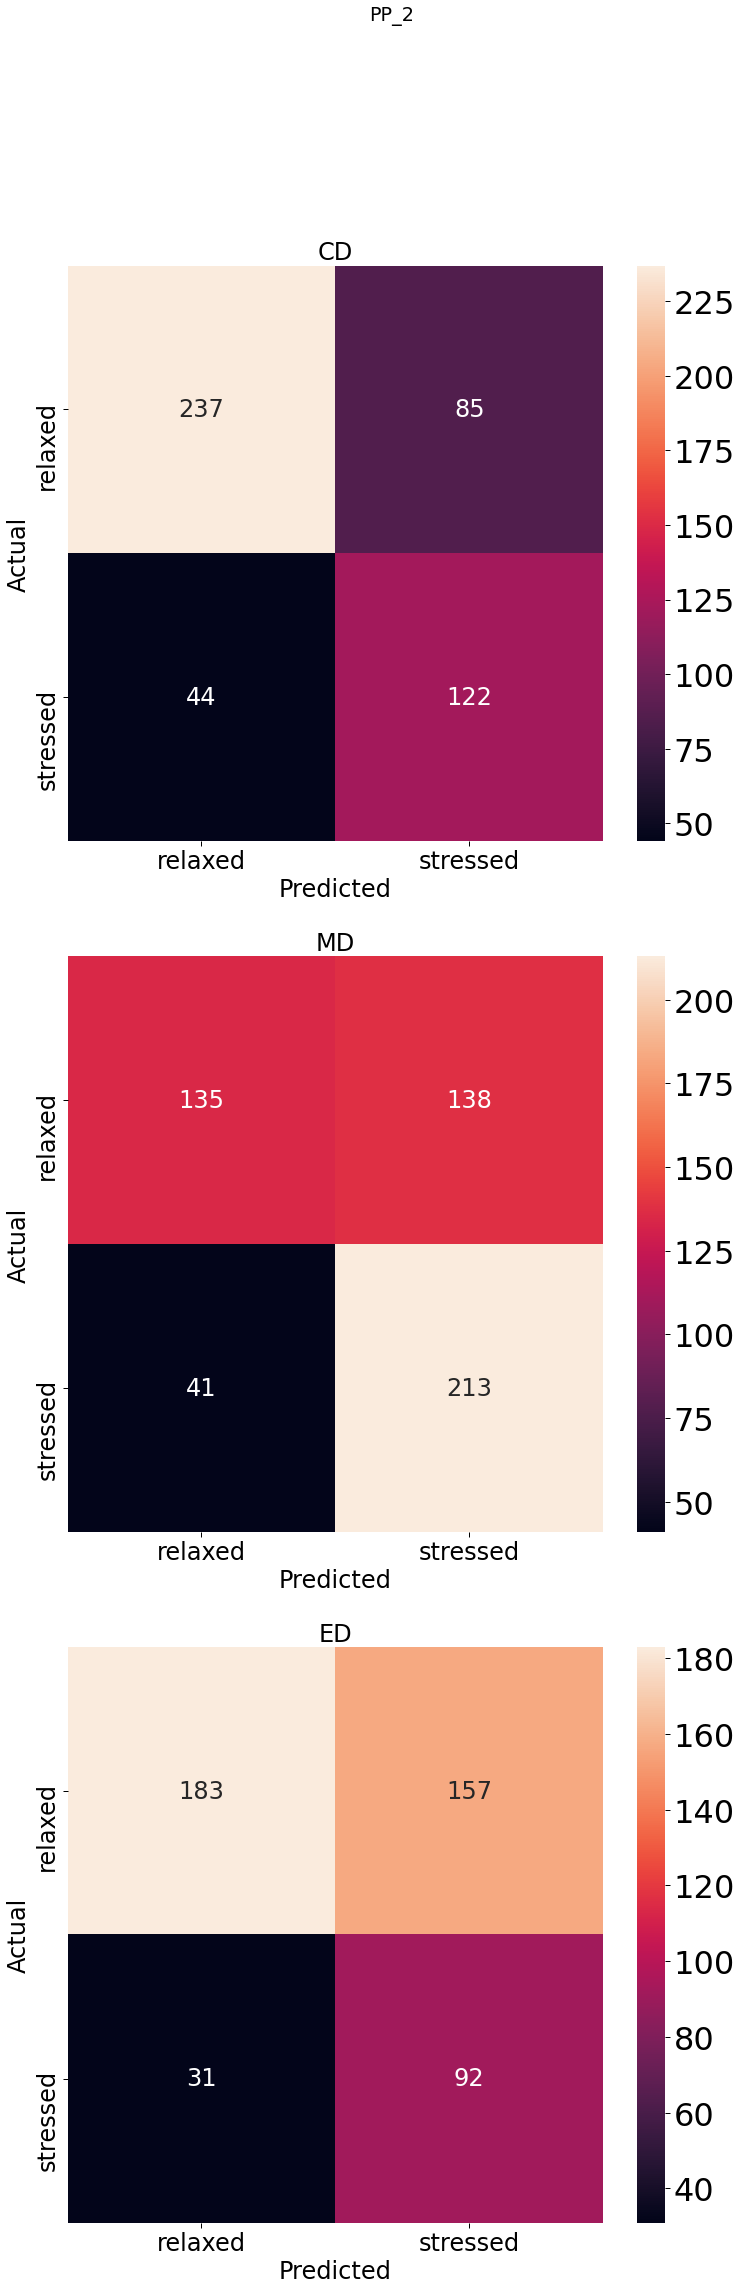

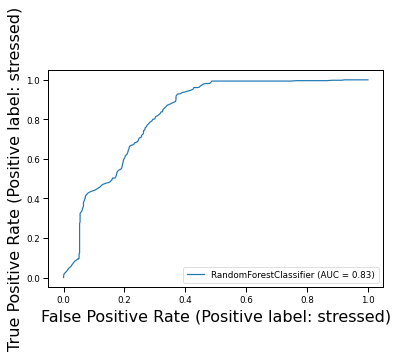

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

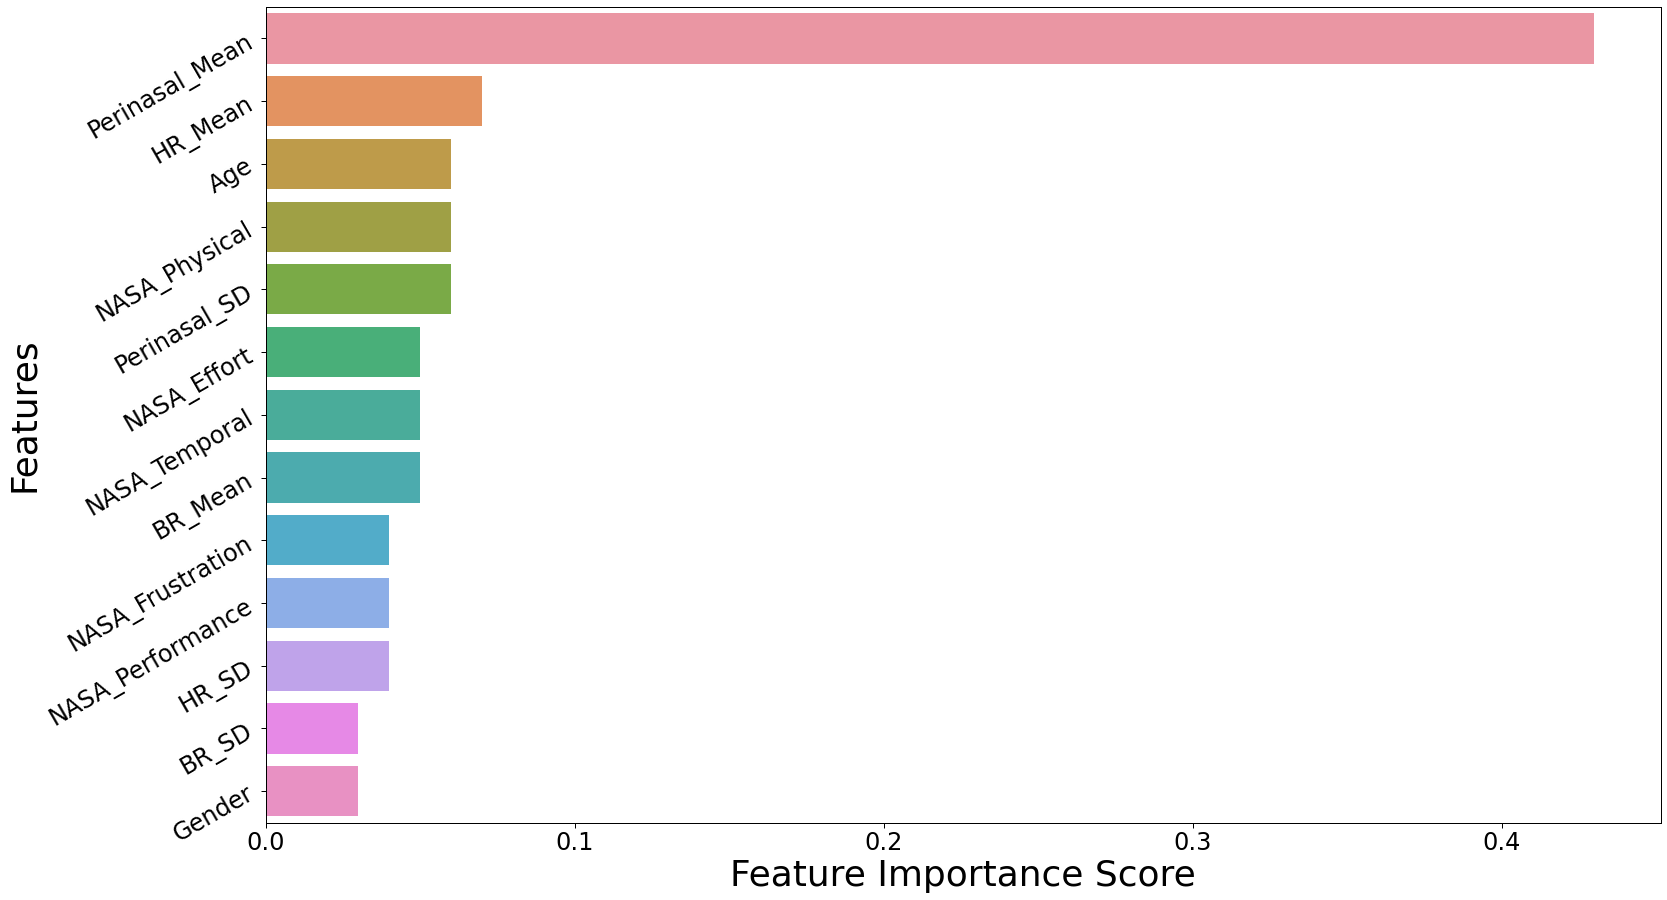

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

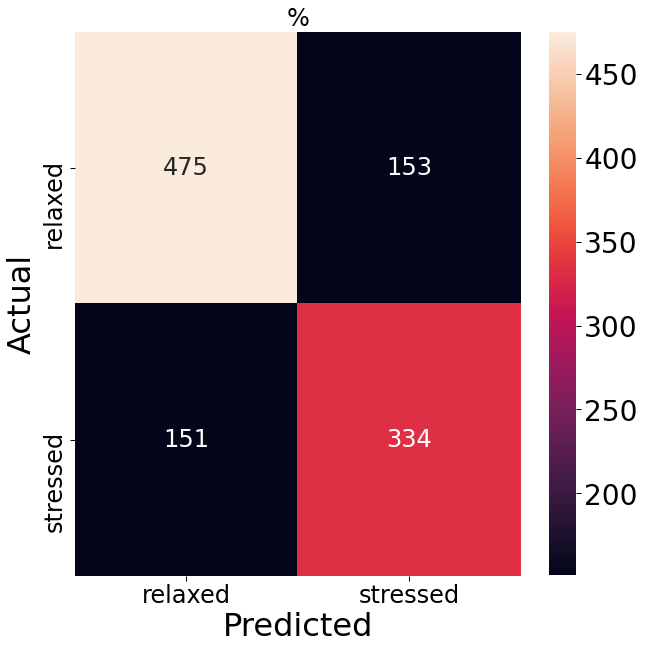

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

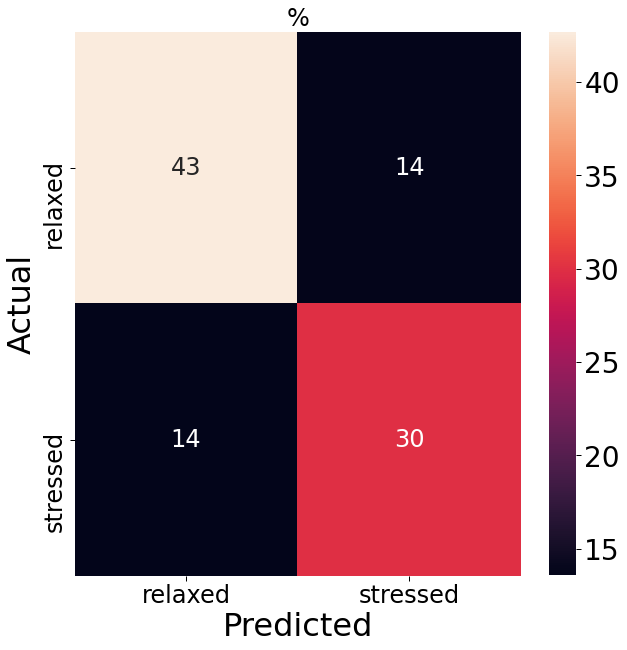



Test Subjects -->
 [66 77 79 80 81 84]


Total Train Subjects: 25    Percentage: 80.65%
Total Test Subjects: 6    Percentage: 19.35%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          63.566176
stressed         36.433824

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          45.473684
stressed         54.526316


Total Train Rows: 5440    Percentage: 85.13%
Total Test Rows: 950    Percentage: 14.87%


Accuracy:0.83
AUC: 0.91
F1: 0.83
Recall: 0.83
Precision: 0.83
Specificity: 0.88





<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

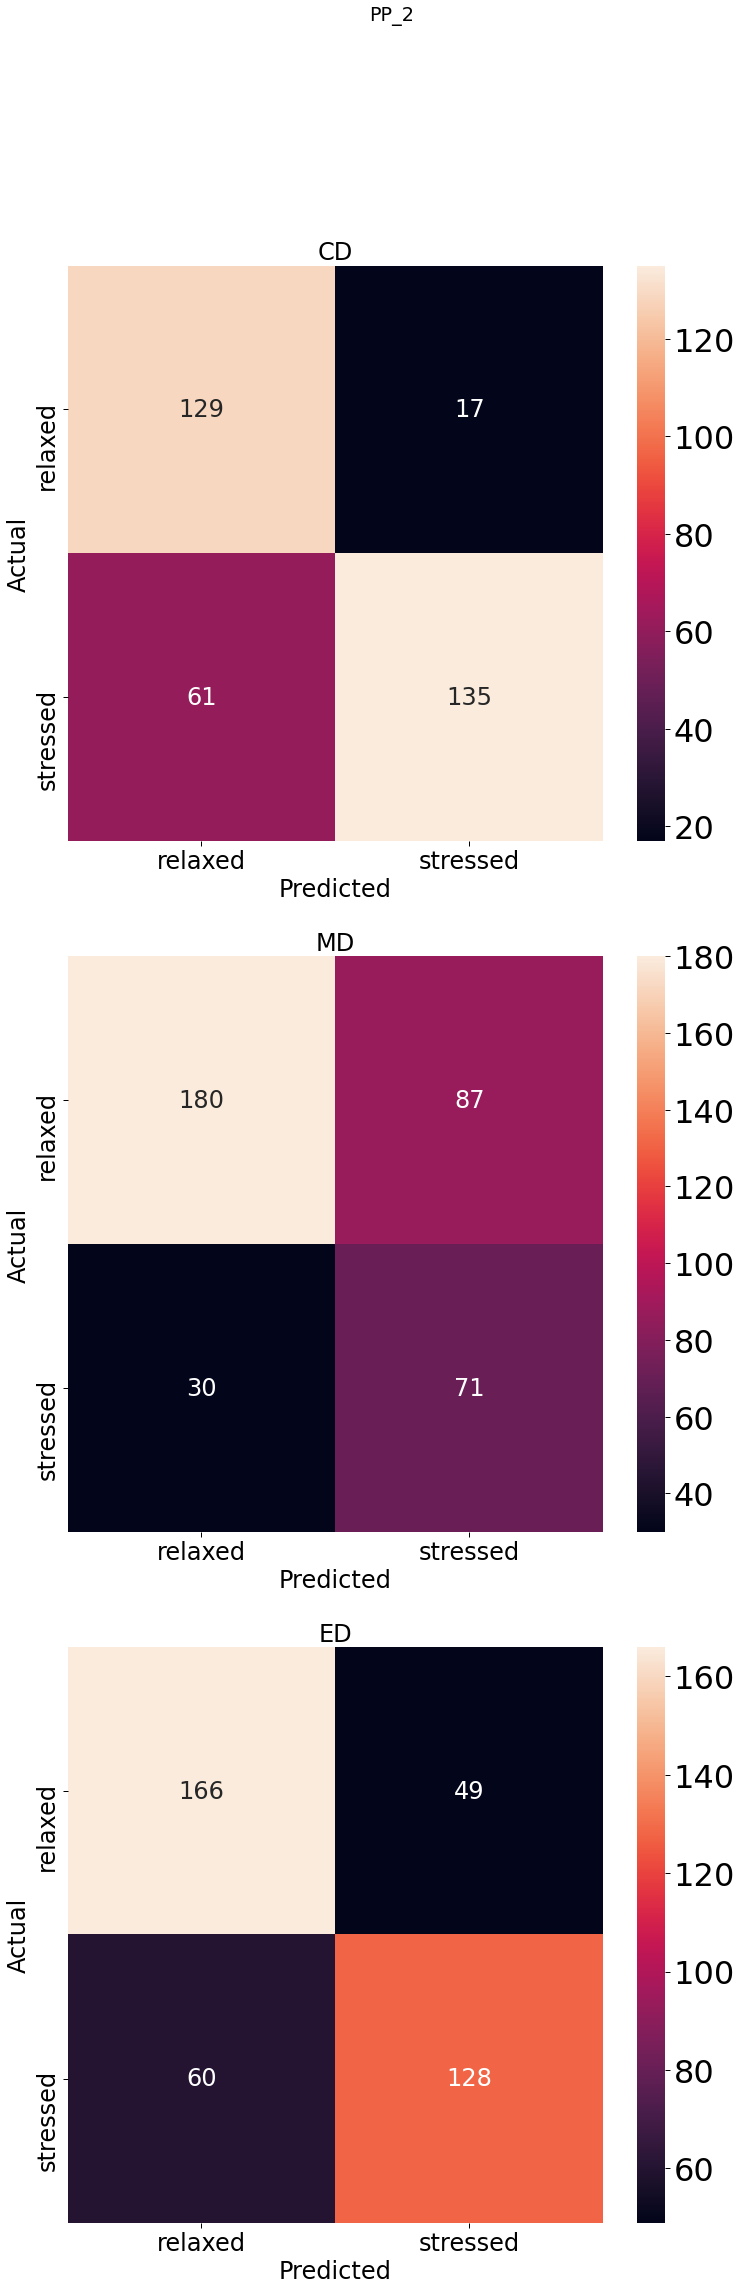

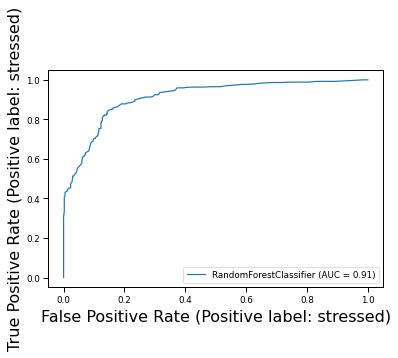

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

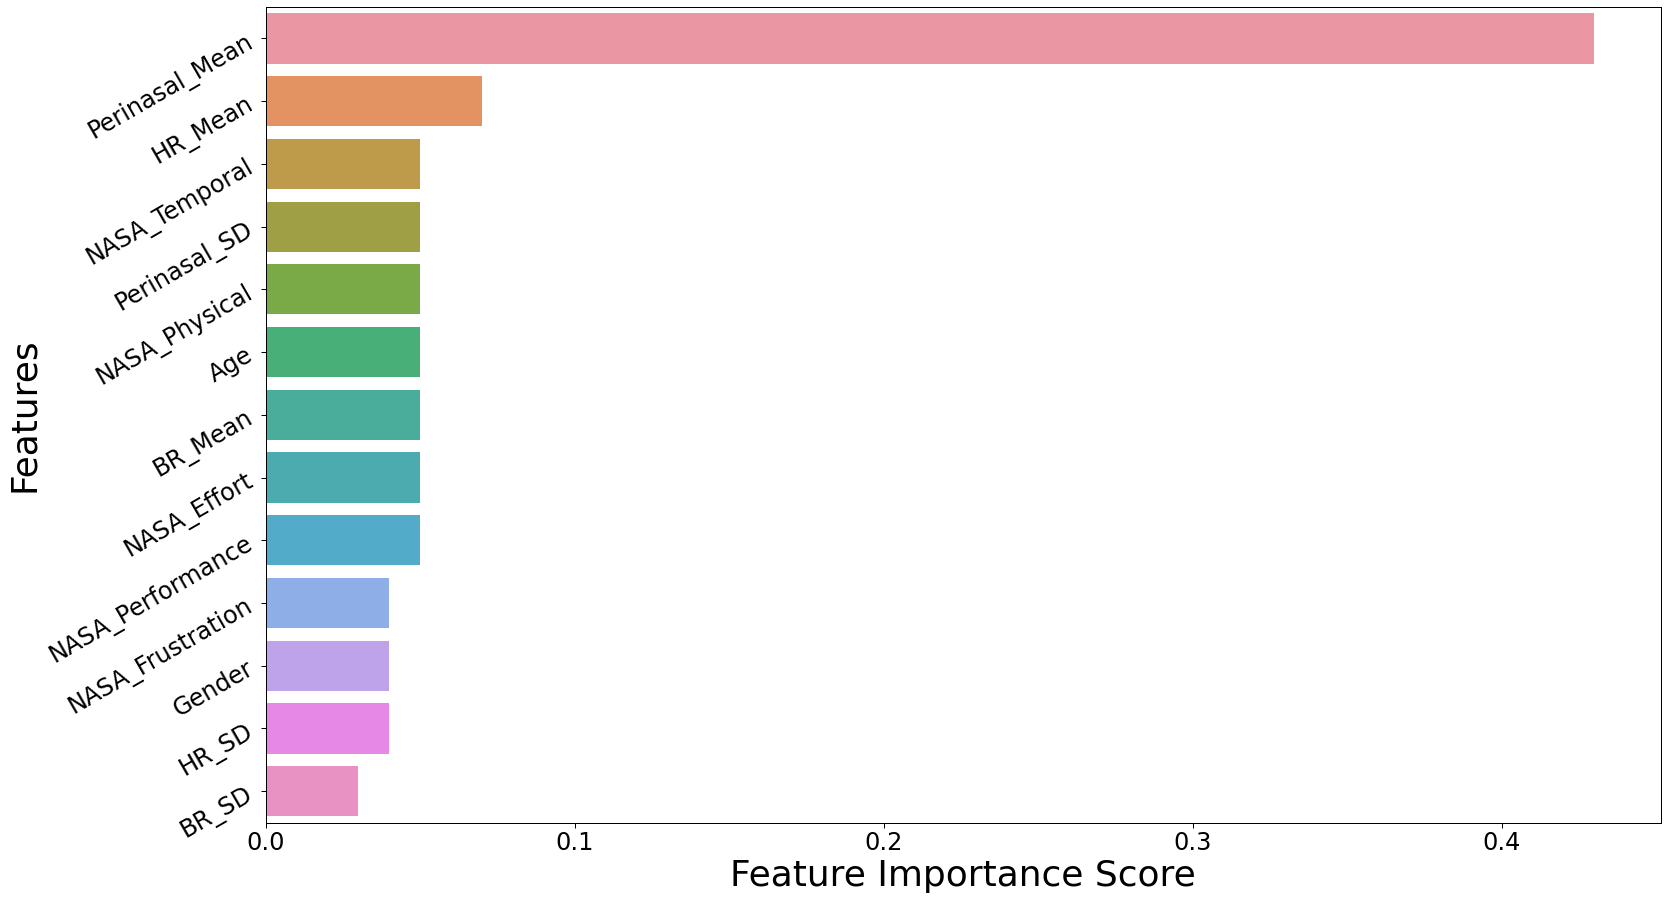

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

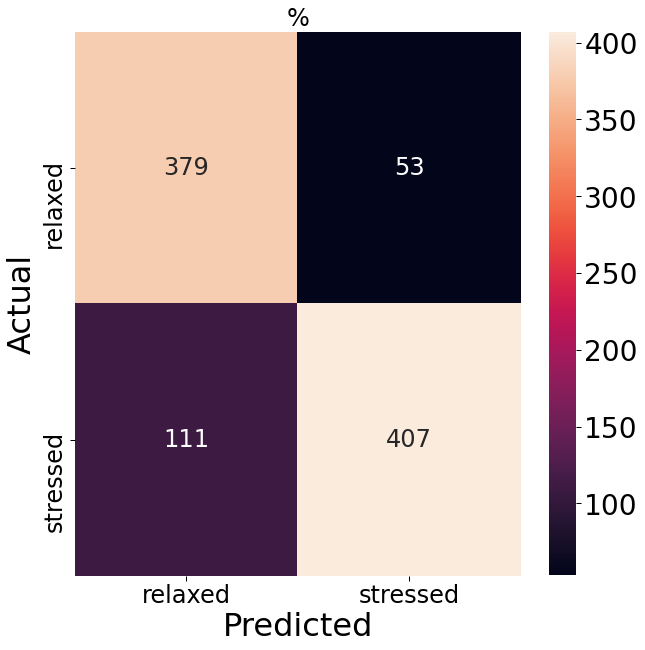

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

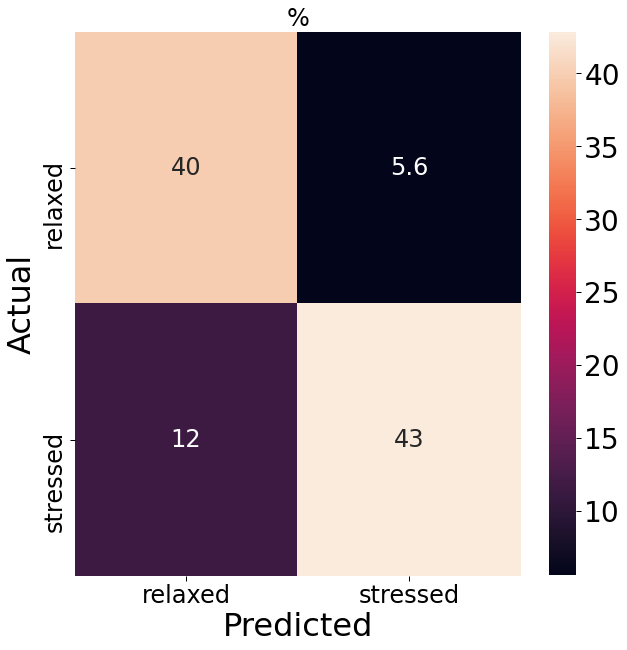

----------------------------------------------------
------------------------ HR ------------------------
----------------------------------------------------



Test Subjects -->
 [ 2  3  5  8 14 16 17]


Total Train Subjects: 24    Percentage: 77.42%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          57.594673
stressed         42.405327

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          58.207071
stressed         41.792929


Total Train Rows: 4806    Percentage: 75.21%
Total Test Rows: 1584    Percentage: 24.79%


Accuracy:0.53
AUC: 0.66
F1: 0.53
Recall: 0.53
Precision: 0.57
Specificity: 0.42





<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

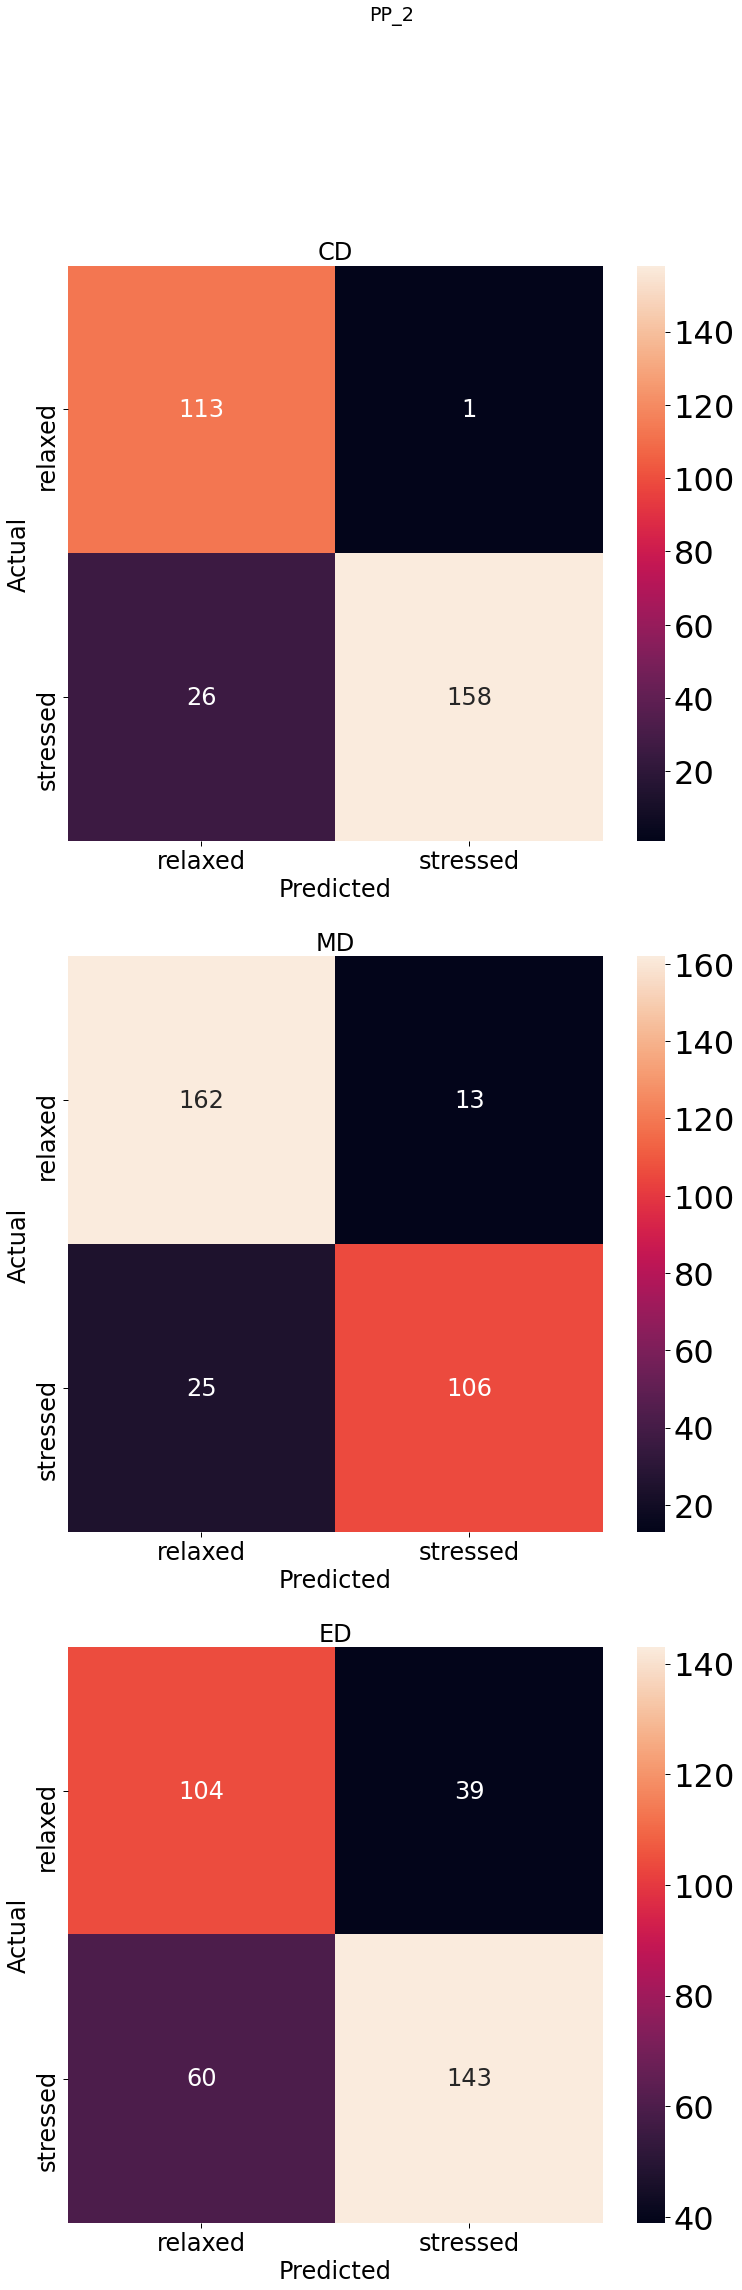

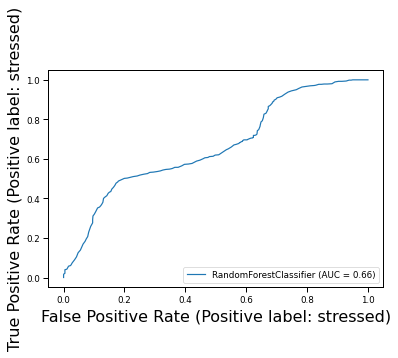

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

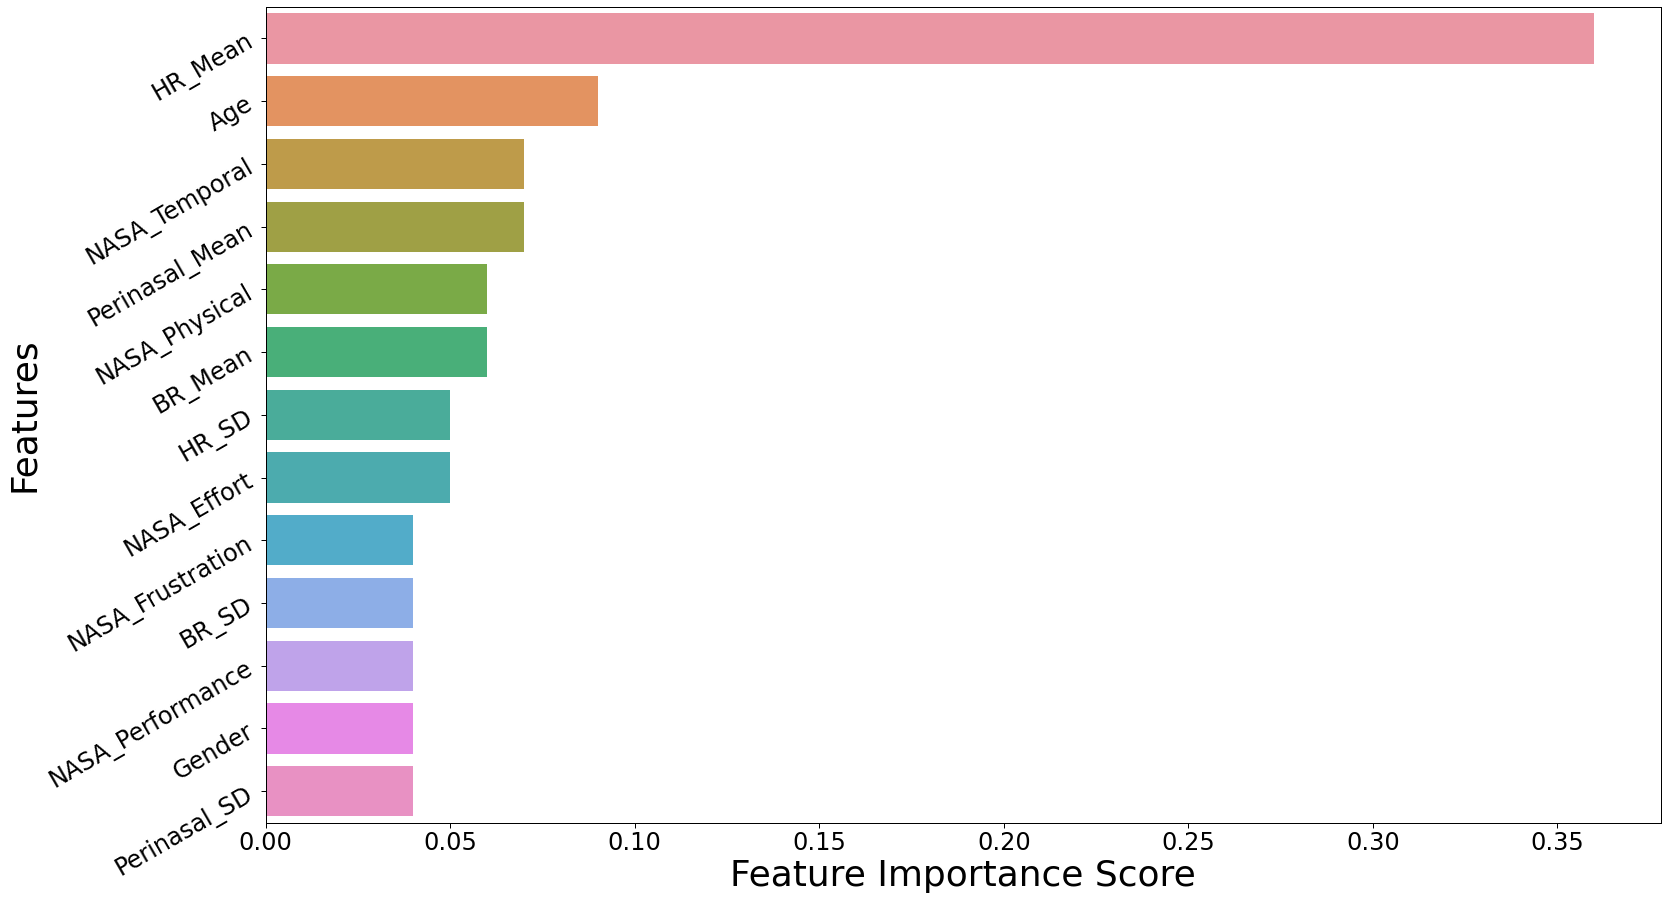

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

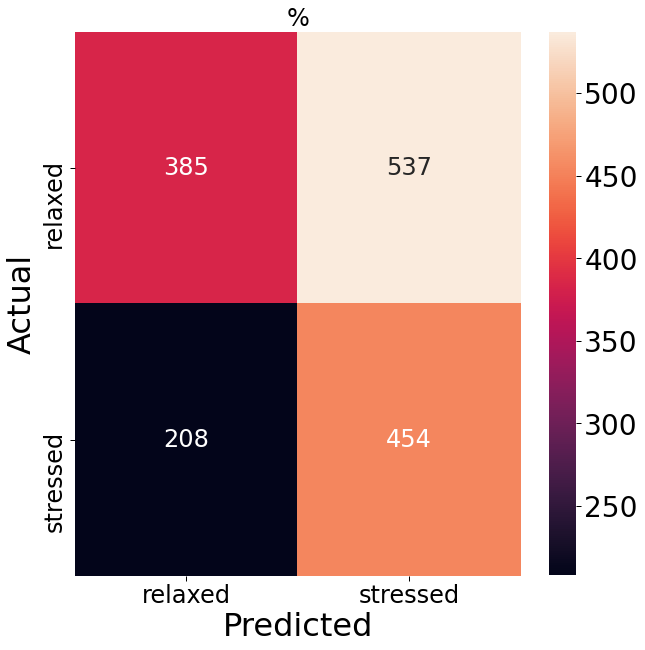

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

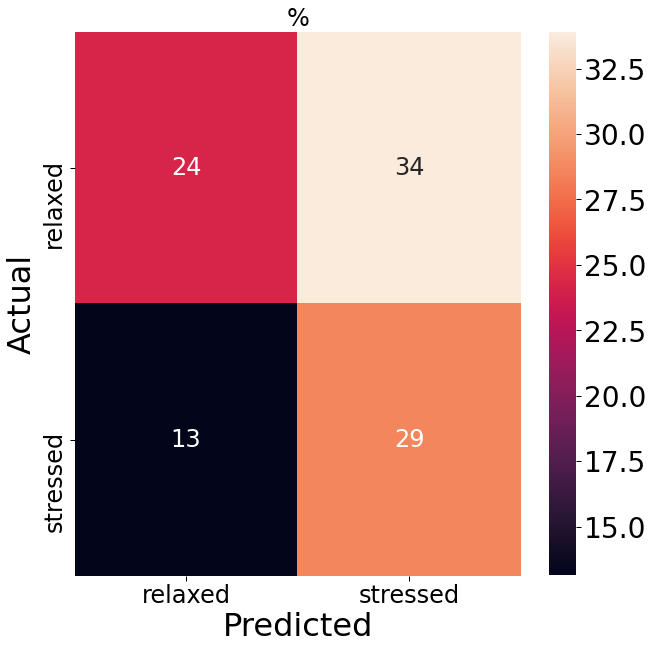



Test Subjects -->
 [18 20 23 24 25 29]


Total Train Subjects: 25    Percentage: 80.65%
Total Test Subjects: 6    Percentage: 19.35%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          56.760976
stressed         43.239024

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed           61.73913
stressed          38.26087


Total Train Rows: 5125    Percentage: 80.2%
Total Test Rows: 1265    Percentage: 19.8%


Accuracy:0.67
AUC: 0.73
F1: 0.67
Recall: 0.67
Precision: 0.7
Specificity: 0.64





<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

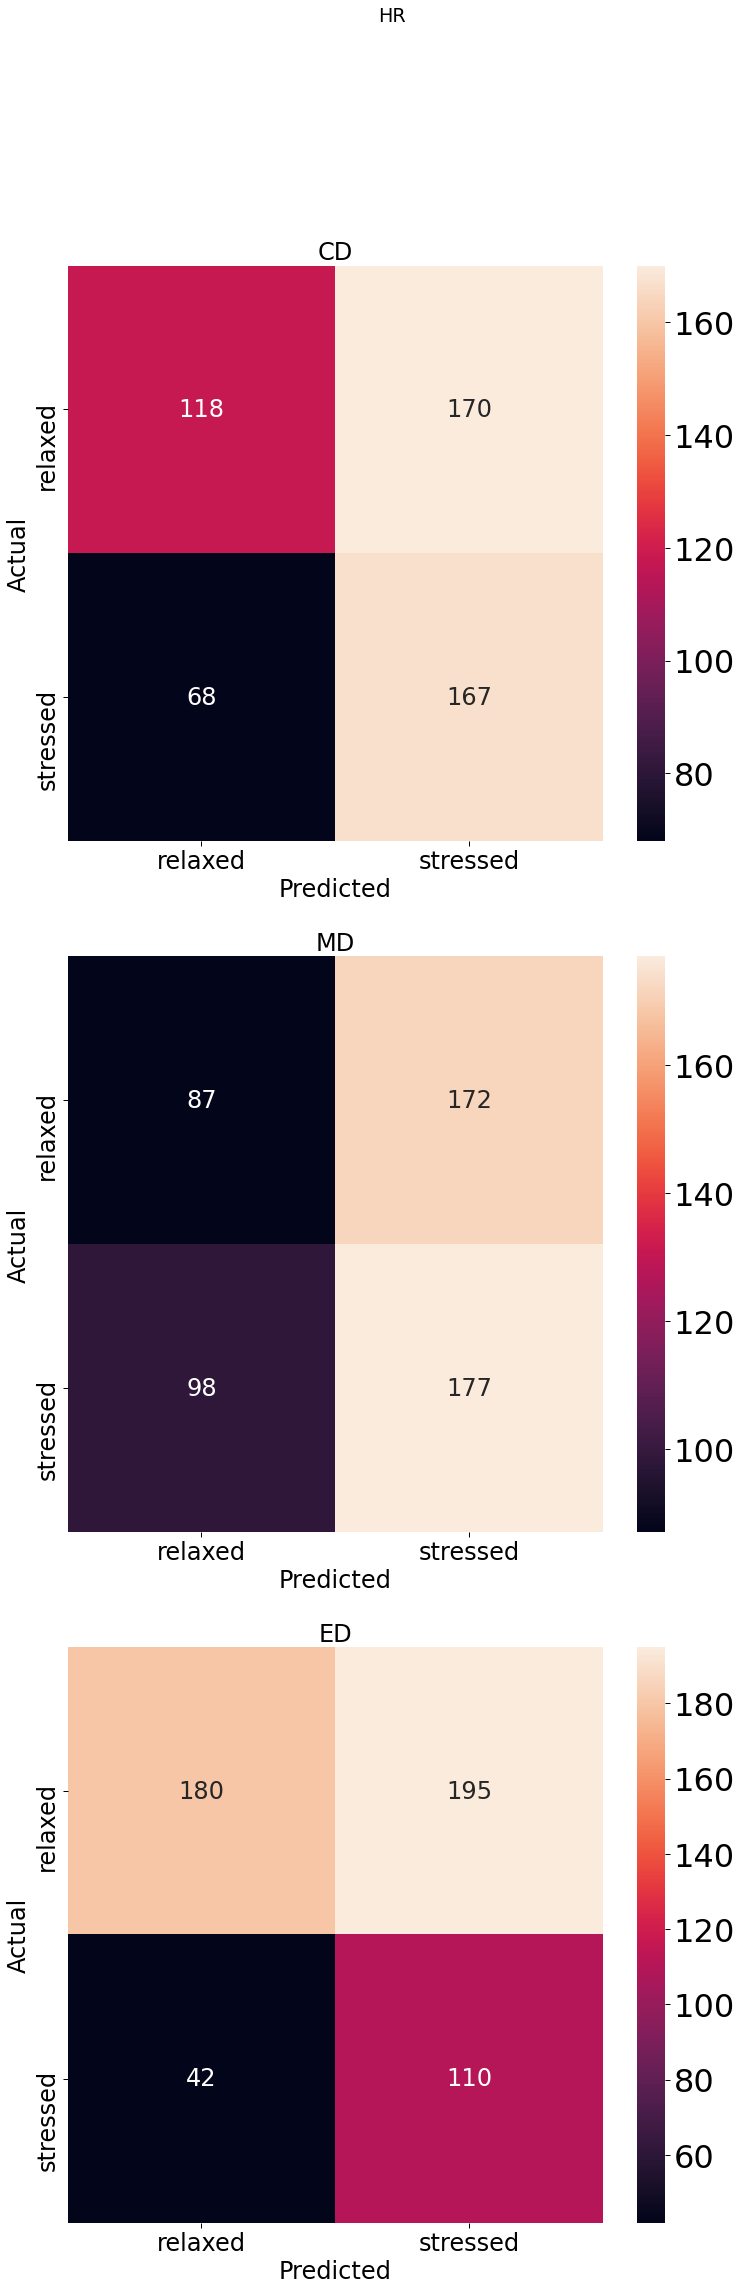

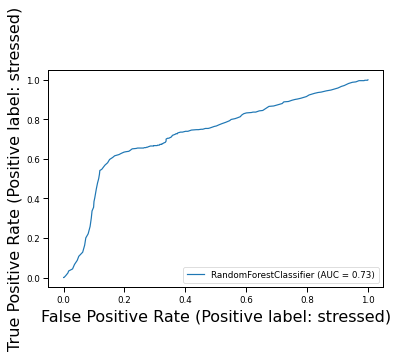

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

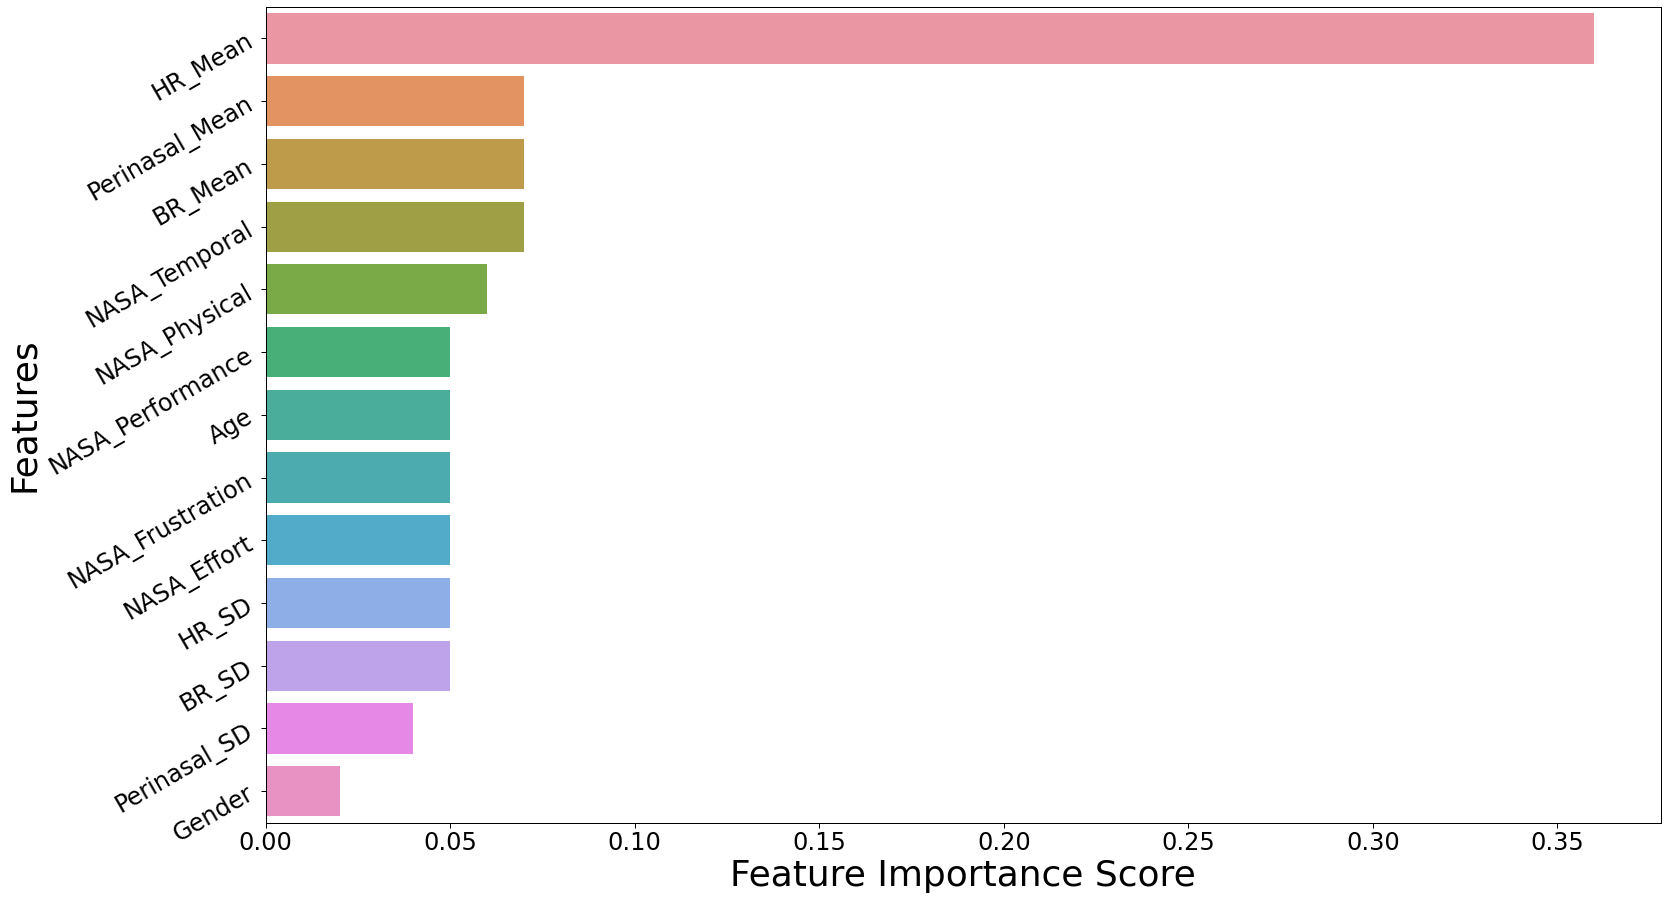

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

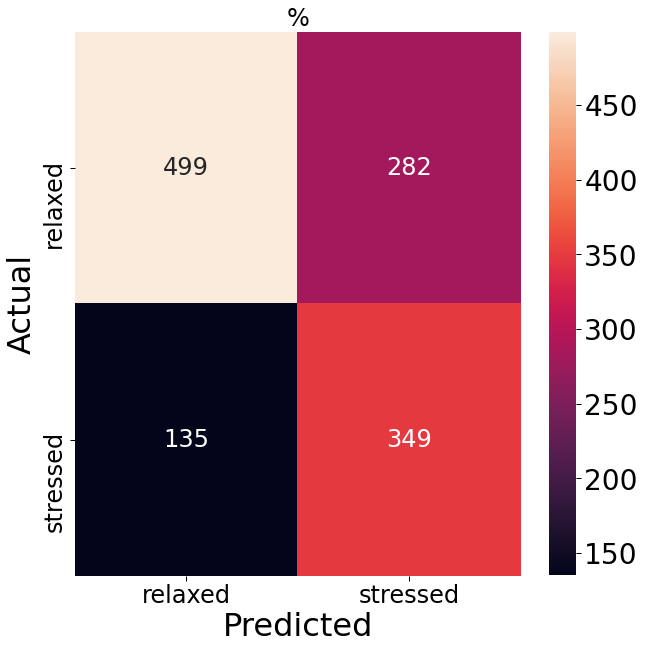

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

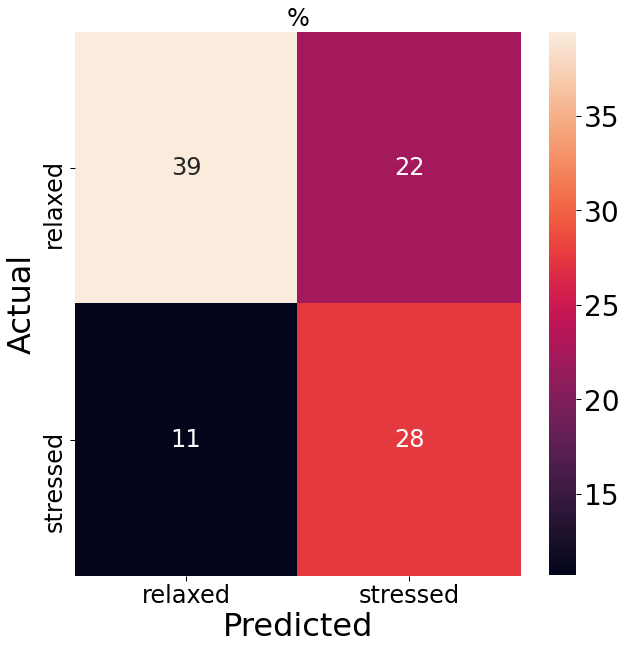



Test Subjects -->
 [31 33 36 38 39 43]


Total Train Subjects: 25    Percentage: 80.65%
Total Test Subjects: 6    Percentage: 19.35%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          56.575733
stressed         43.424267

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          61.637348
stressed         38.362652


Total Train Rows: 4912    Percentage: 76.87%
Total Test Rows: 1478    Percentage: 23.13%


Accuracy:0.71
AUC: 0.66
F1: 0.69
Recall: 0.71
Precision: 0.71
Specificity: 0.89





<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

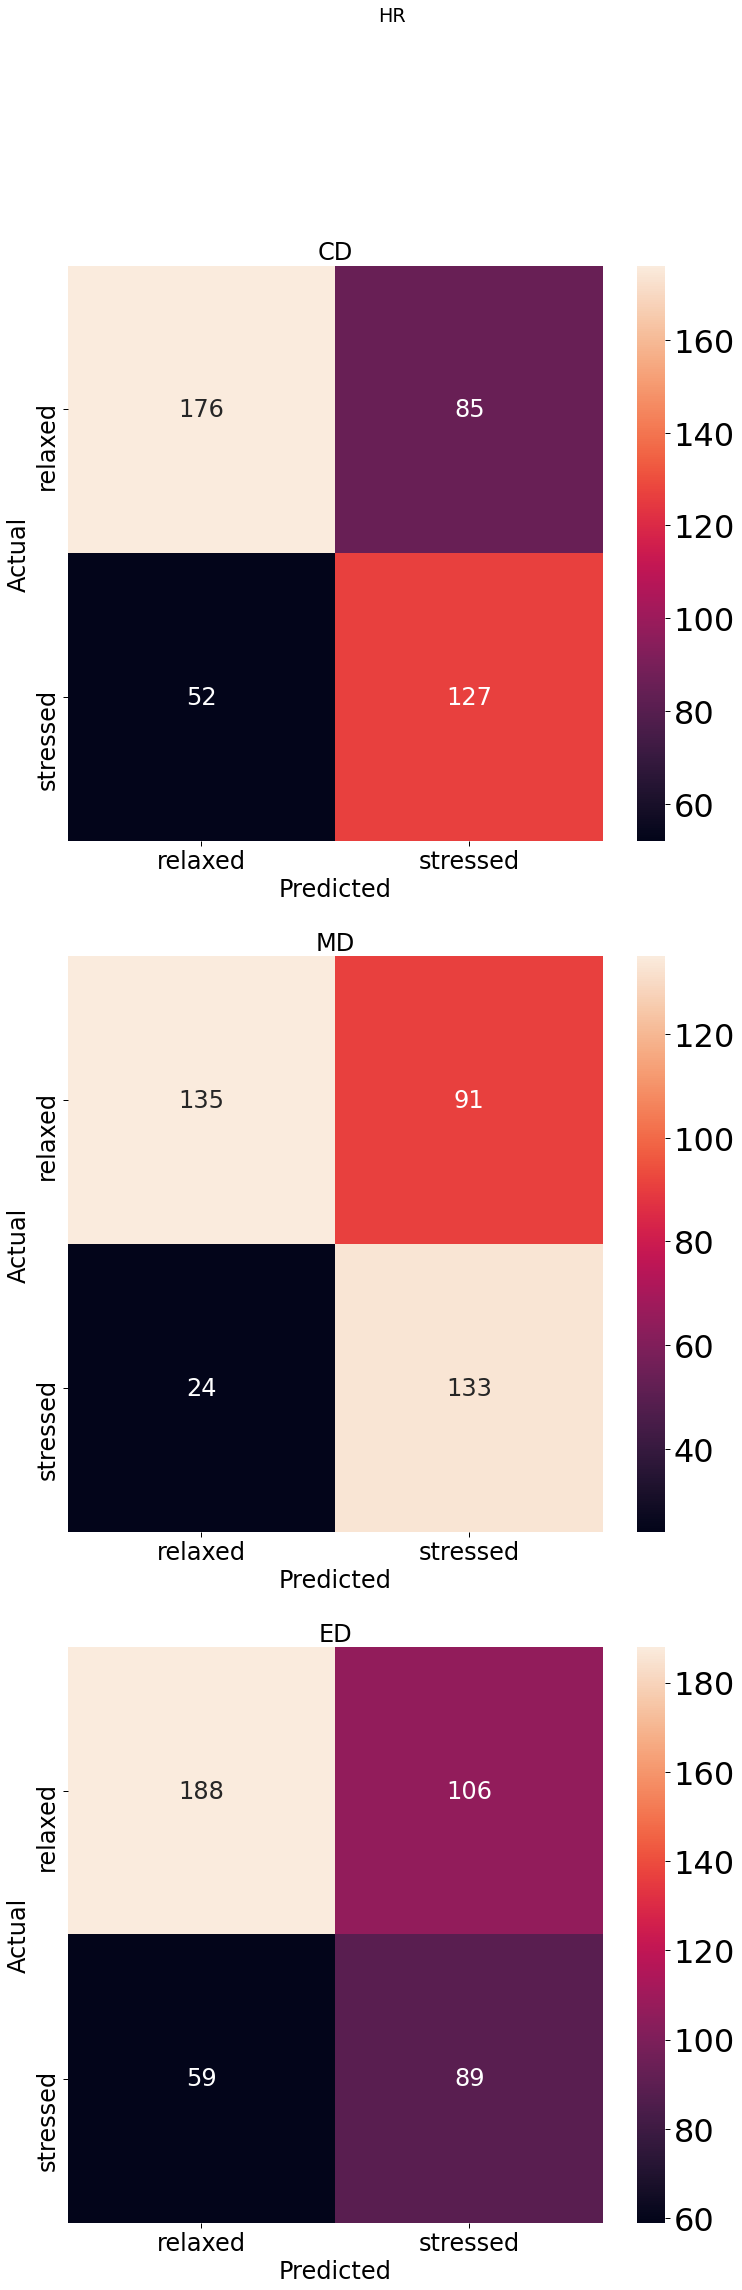

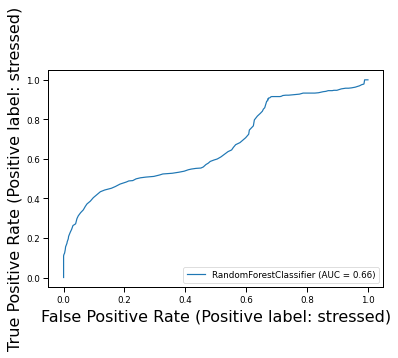

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

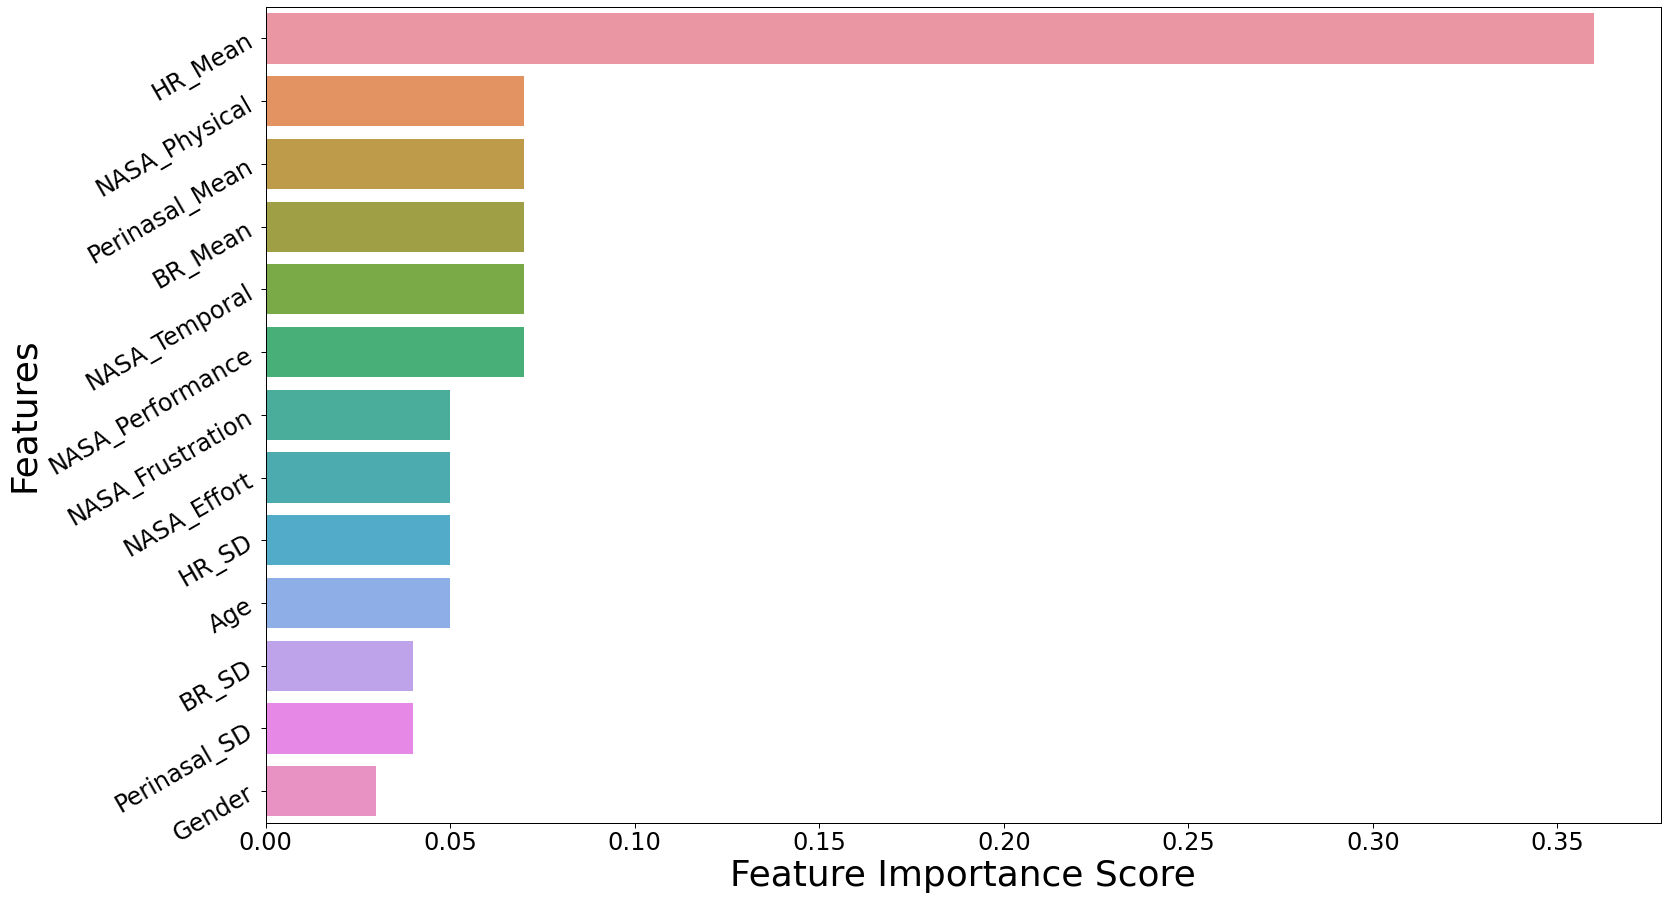

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

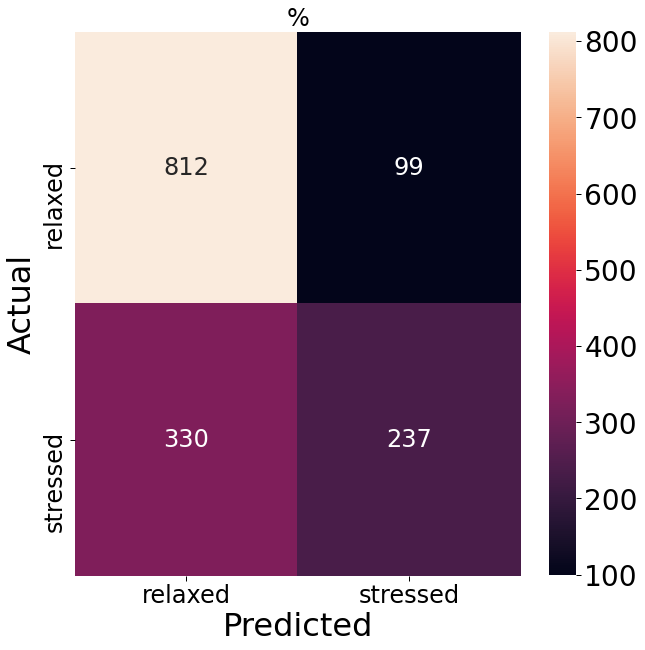

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

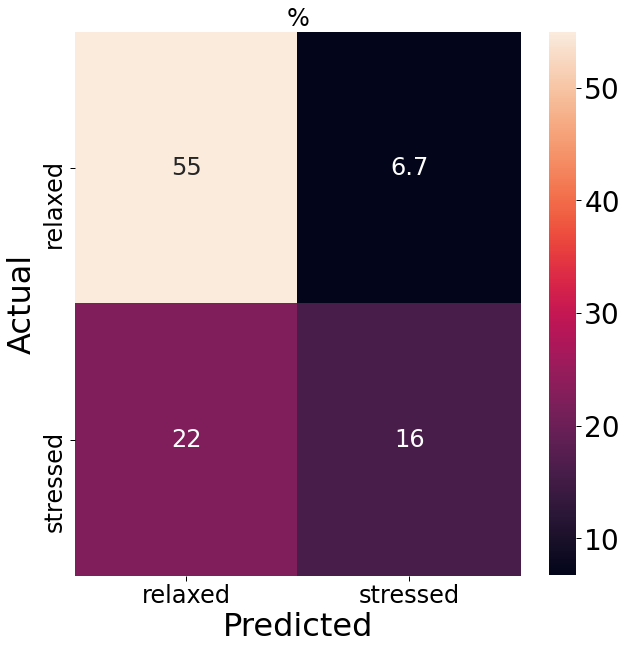



Test Subjects -->
 [44 45 47 60 61 62]


Total Train Subjects: 25    Percentage: 80.65%
Total Test Subjects: 6    Percentage: 19.35%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          59.711958
stressed         40.288042

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          48.427673
stressed         51.572327


Total Train Rows: 5277    Percentage: 82.58%
Total Test Rows: 1113    Percentage: 17.42%


Accuracy:0.6
AUC: 0.71
F1: 0.6
Recall: 0.6
Precision: 0.6
Specificity: 0.56





<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

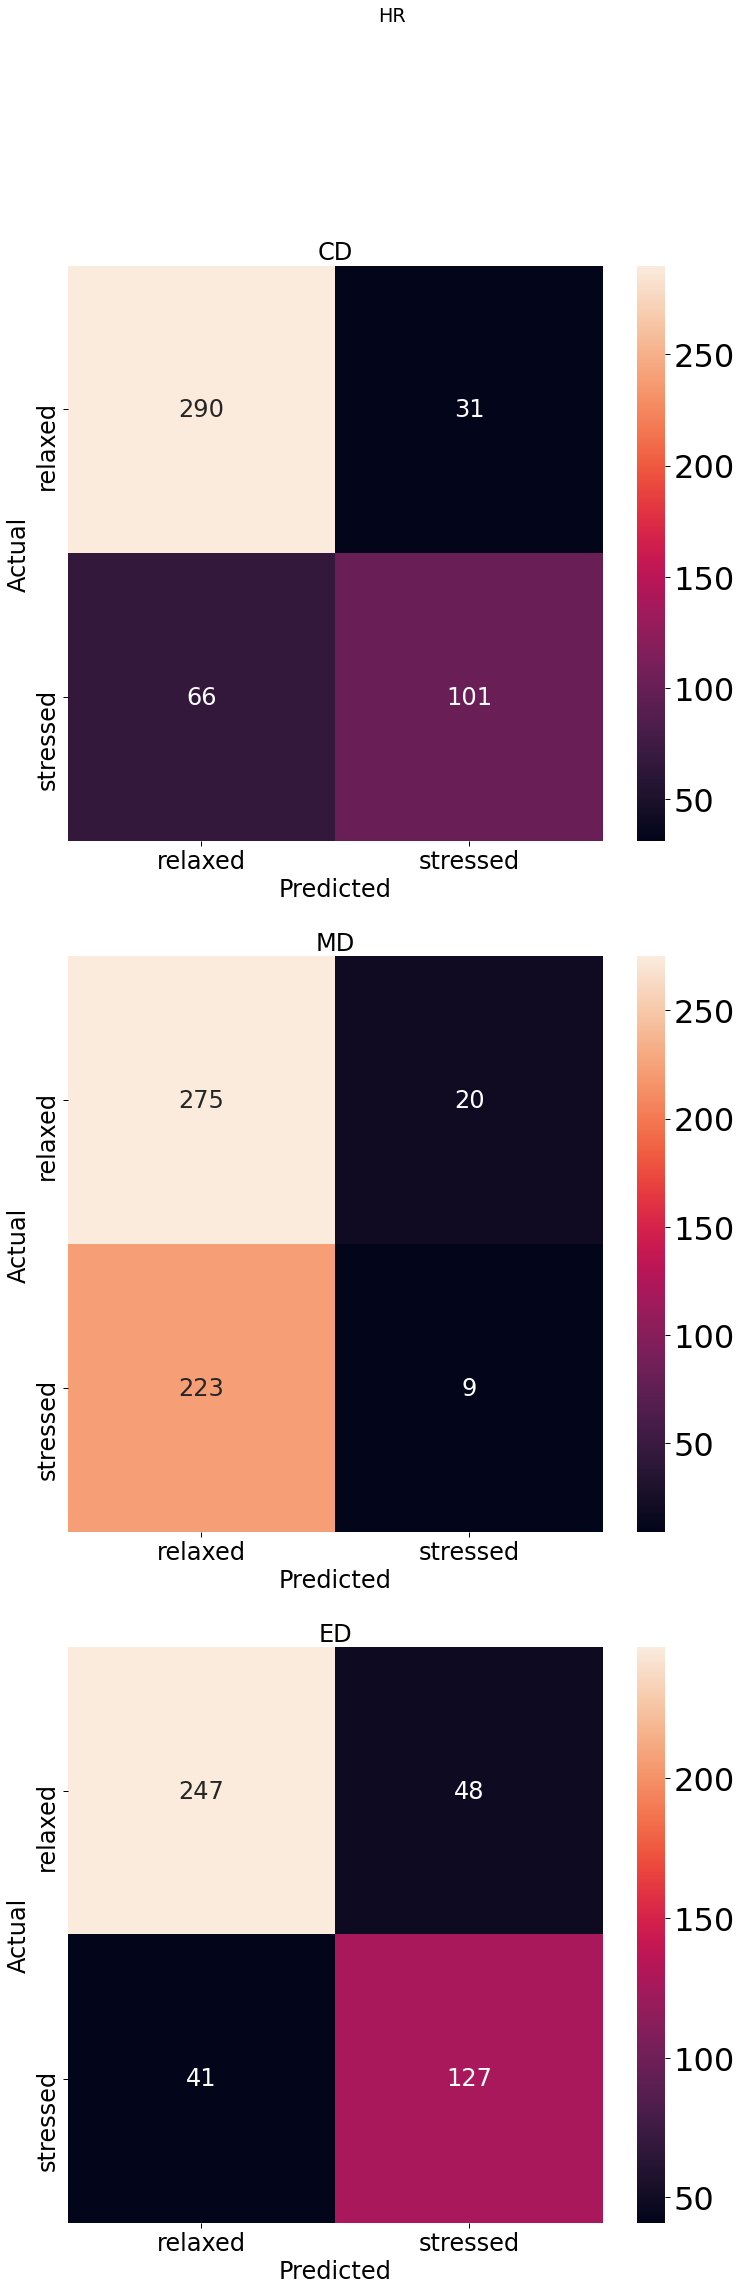

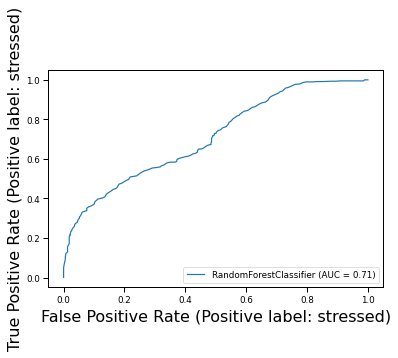

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

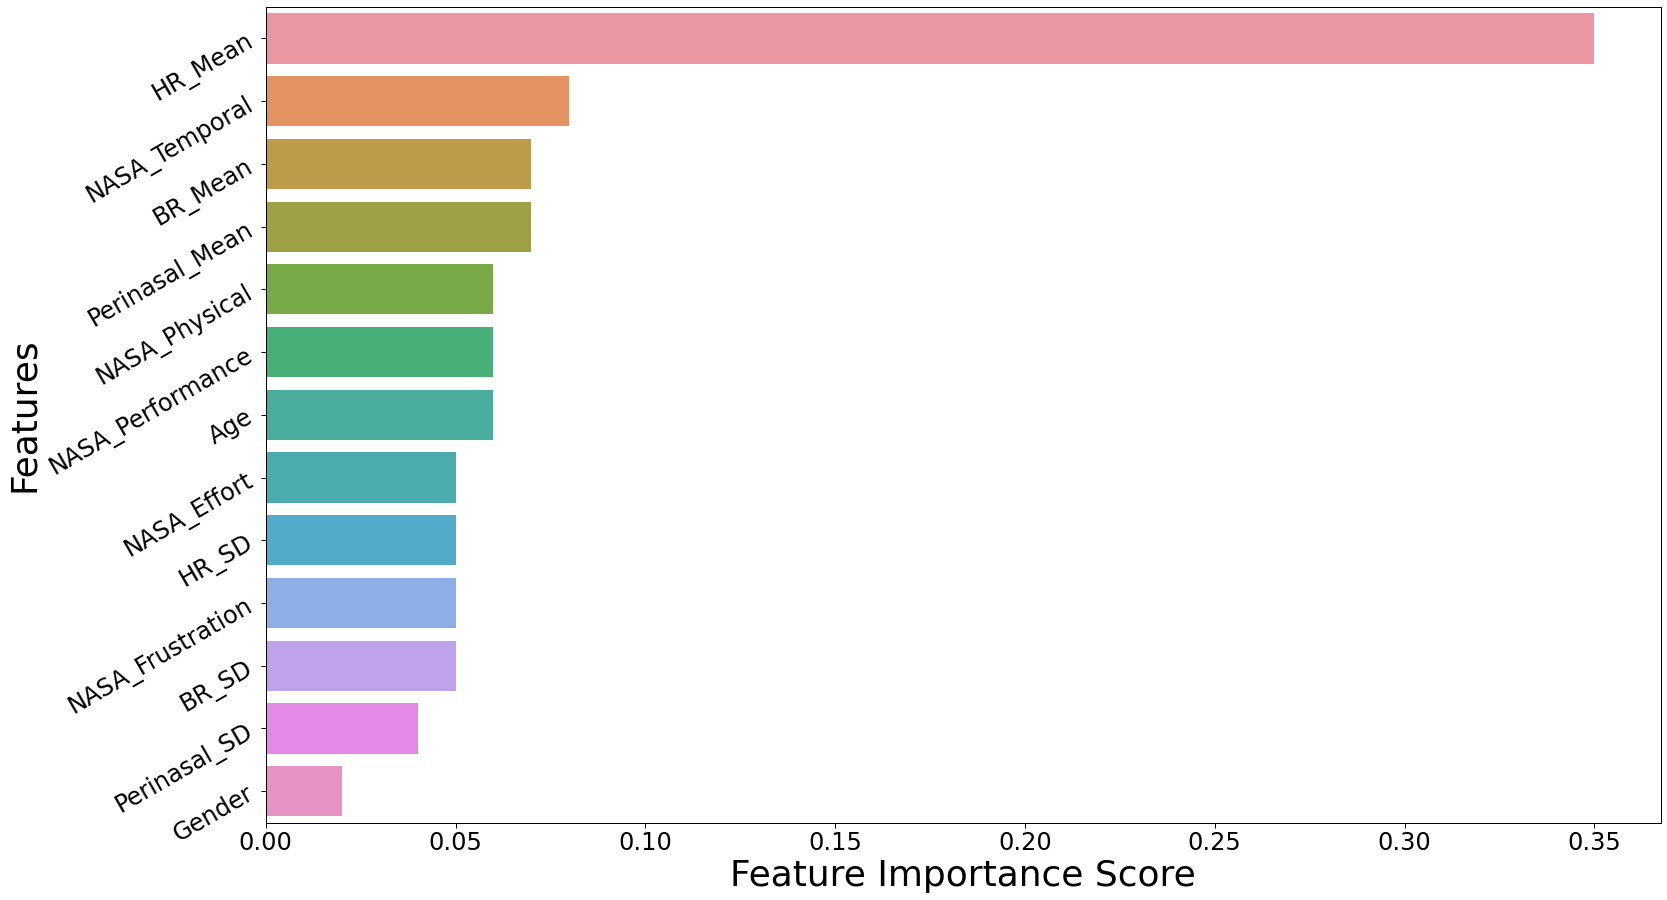

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

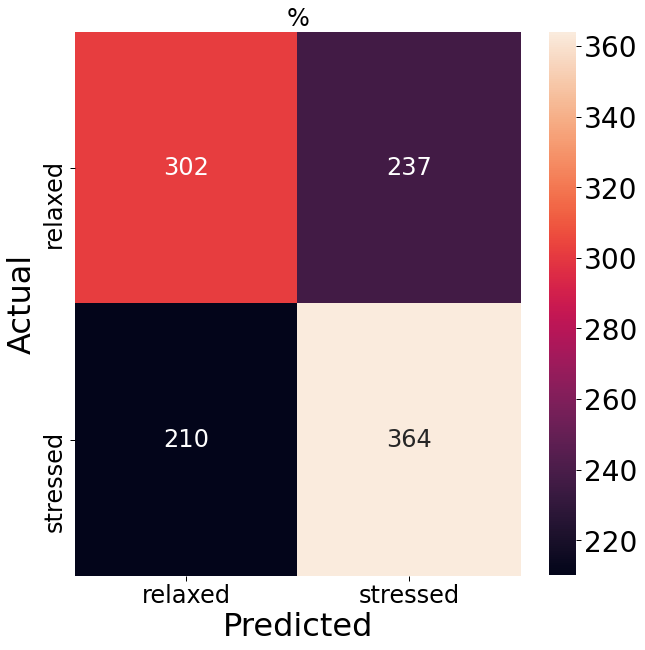

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

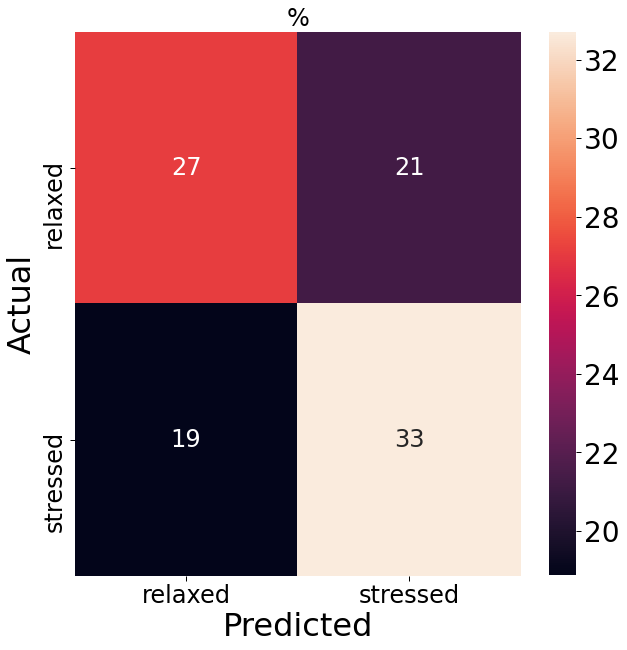



Test Subjects -->
 [66 77 79 80 81 84]


Total Train Subjects: 25    Percentage: 80.65%
Total Test Subjects: 6    Percentage: 19.35%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          57.959559
stressed         42.040441

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          56.526316
stressed         43.473684


Total Train Rows: 5440    Percentage: 85.13%
Total Test Rows: 950    Percentage: 14.87%


Accuracy:0.67
AUC: 0.7
F1: 0.65
Recall: 0.67
Precision: 0.69
Specificity: 0.9





<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

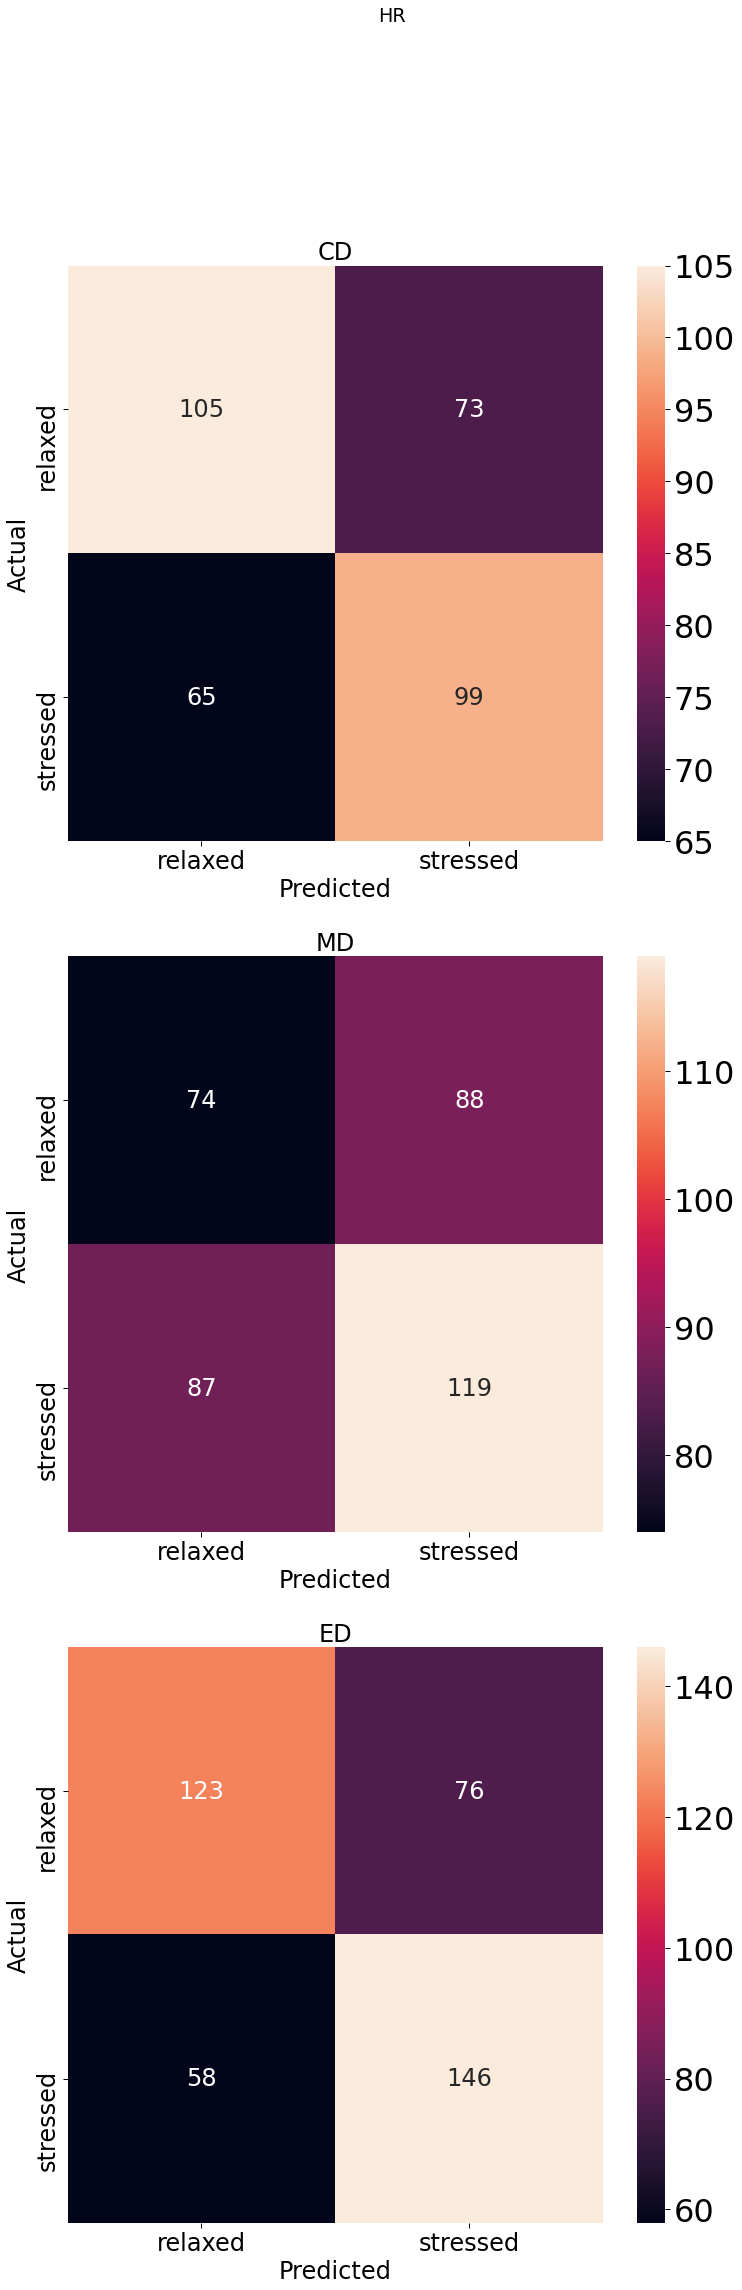

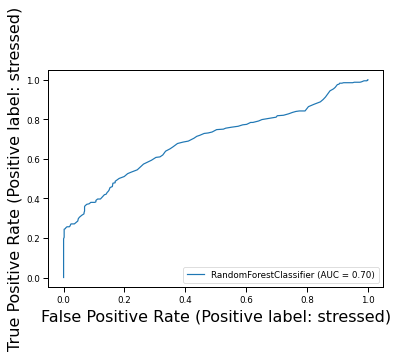

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

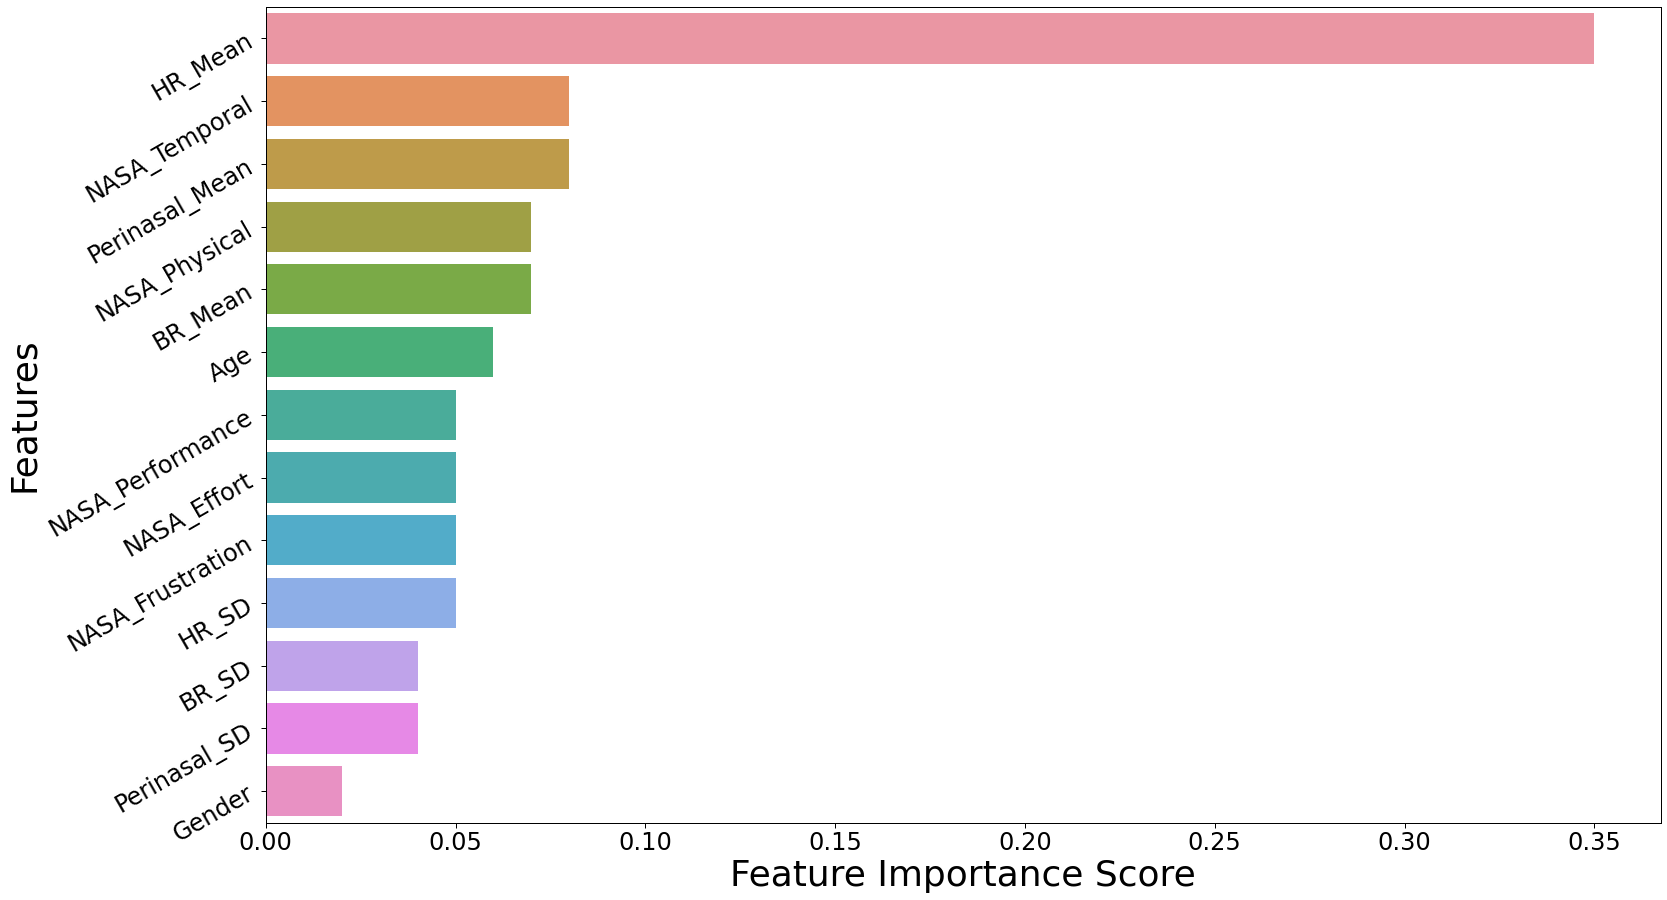

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

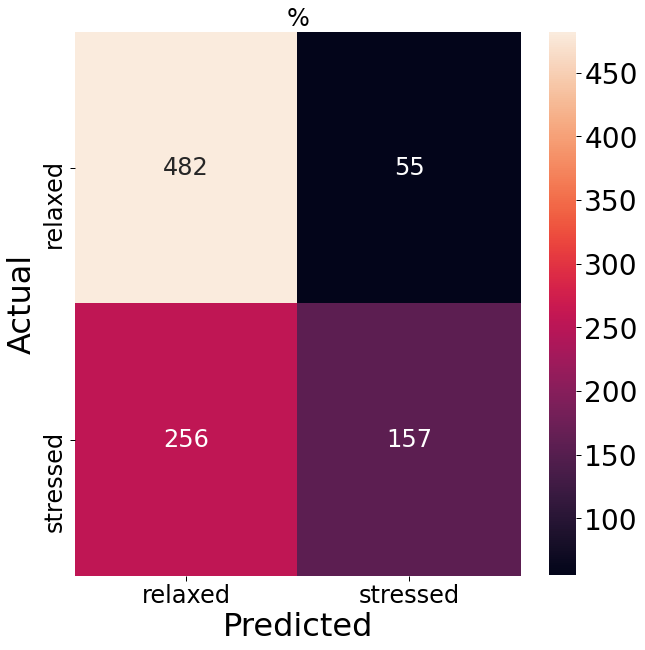

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

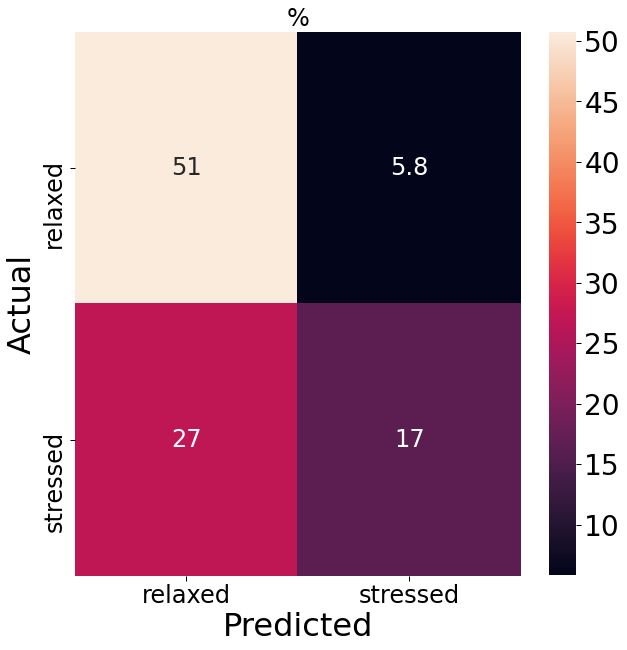

----------------------------------------------------
------------------------ BR ------------------------
----------------------------------------------------



Test Subjects -->
 [ 2  3  5  8 14 16 17]


Total Train Subjects: 24    Percentage: 77.42%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          55.326675
stressed         44.673325

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          52.335859
stressed         47.664141


Total Train Rows: 4806    Percentage: 75.21%
Total Test Rows: 1584    Percentage: 24.79%


Accuracy:0.8
AUC: 0.9
F1: 0.8
Recall: 0.8
Precision: 0.8
Specificity: 0.76





<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

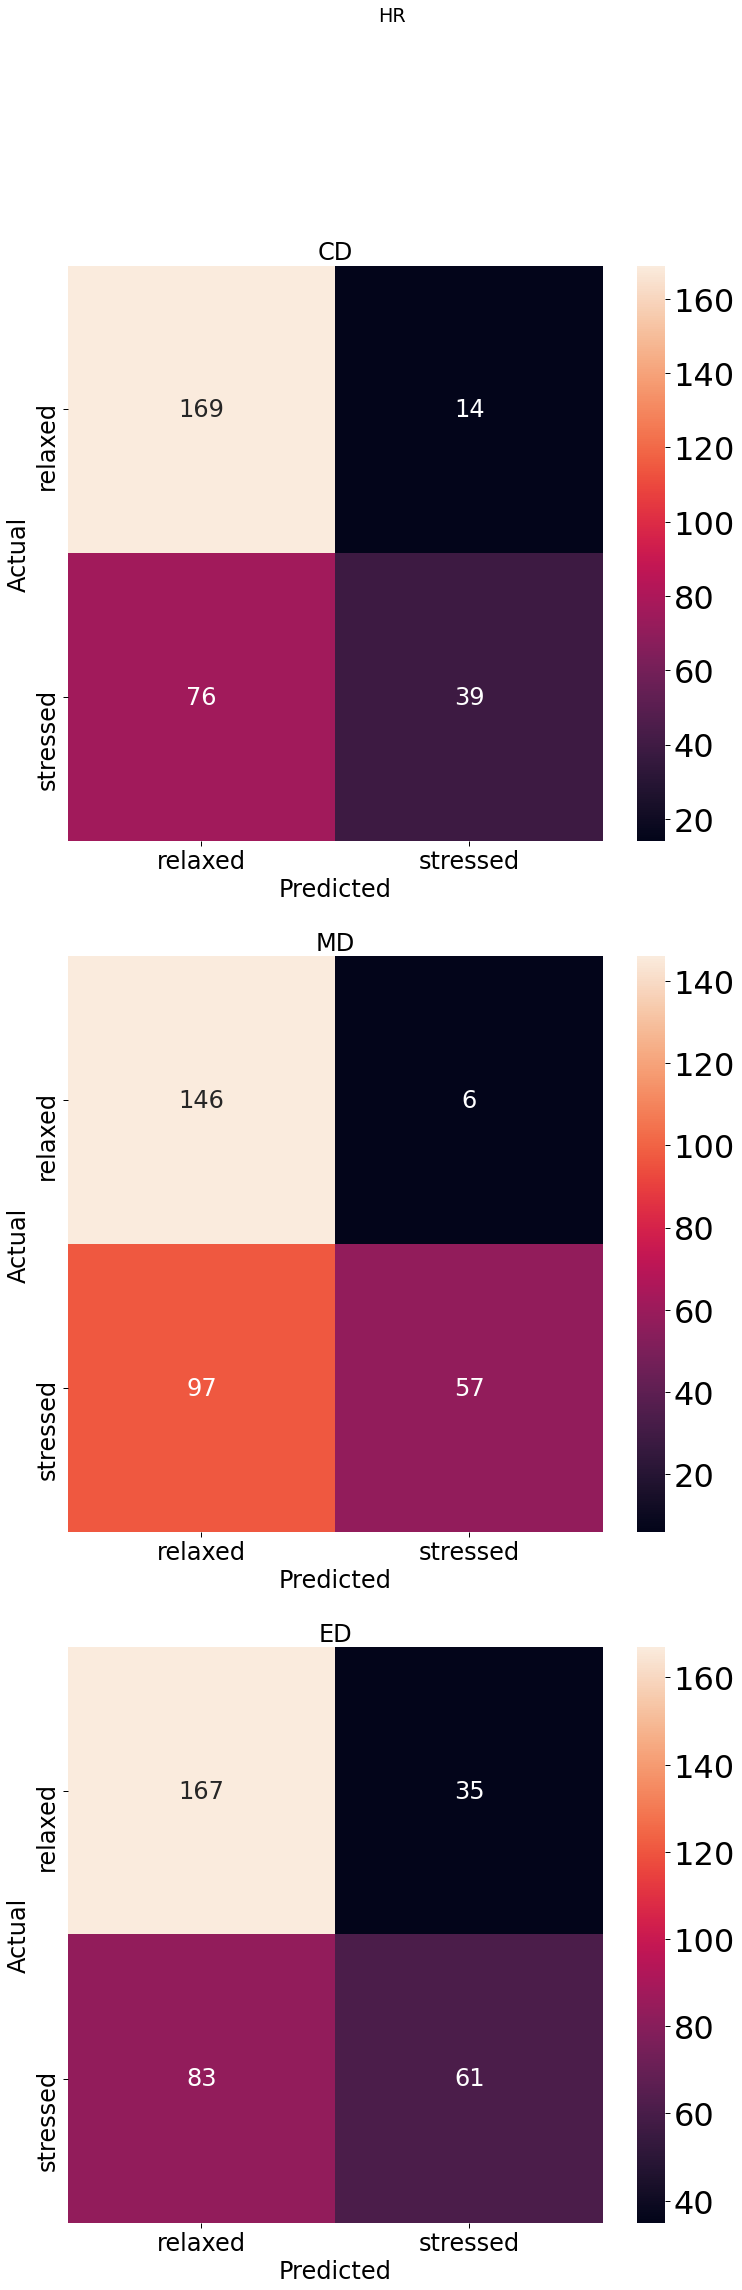

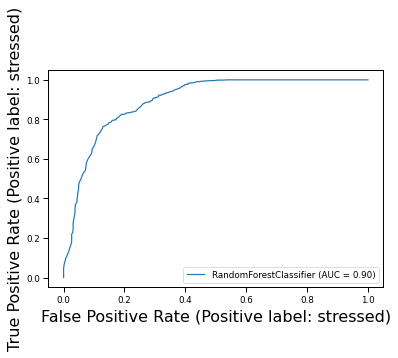

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

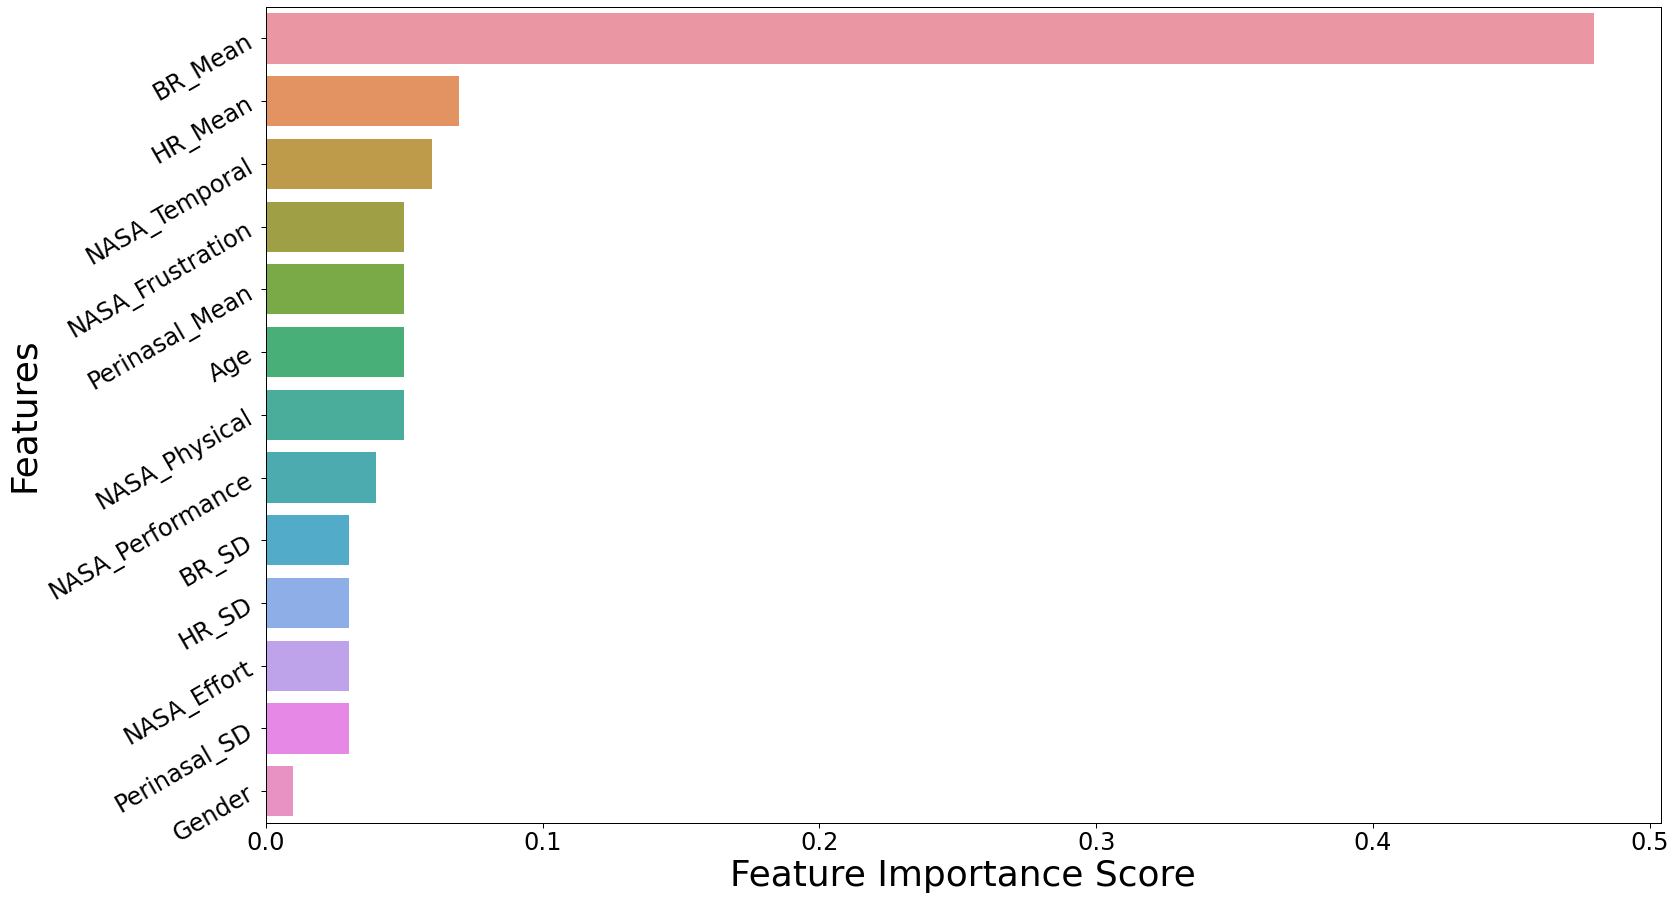

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

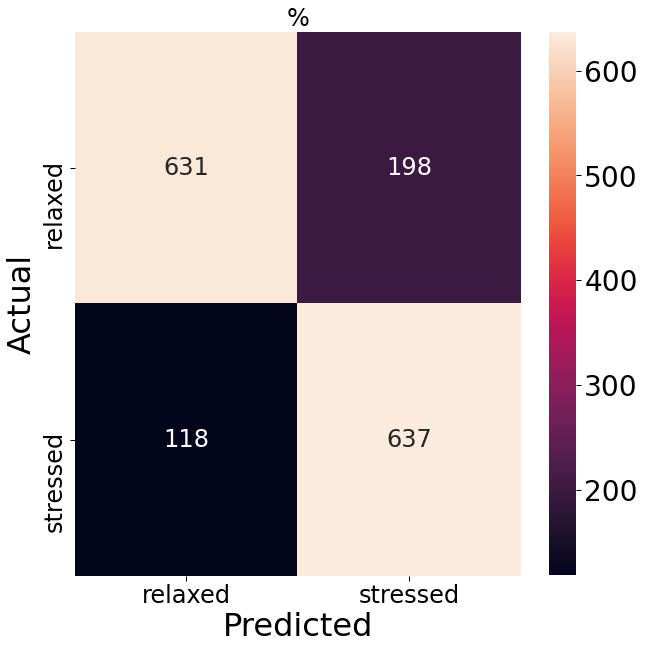

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

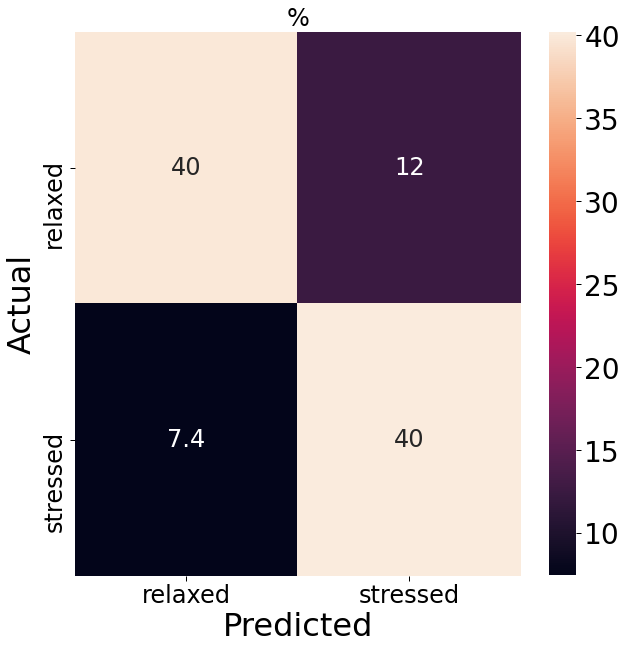



Test Subjects -->
 [18 20 23 24 25 29]


Total Train Subjects: 25    Percentage: 80.65%
Total Test Subjects: 6    Percentage: 19.35%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          54.146341
stressed         45.853659

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          56.363636
stressed         43.636364


Total Train Rows: 5125    Percentage: 80.2%
Total Test Rows: 1265    Percentage: 19.8%


Accuracy:0.74
AUC: 0.77
F1: 0.74
Recall: 0.74
Precision: 0.74
Specificity: 0.73





<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

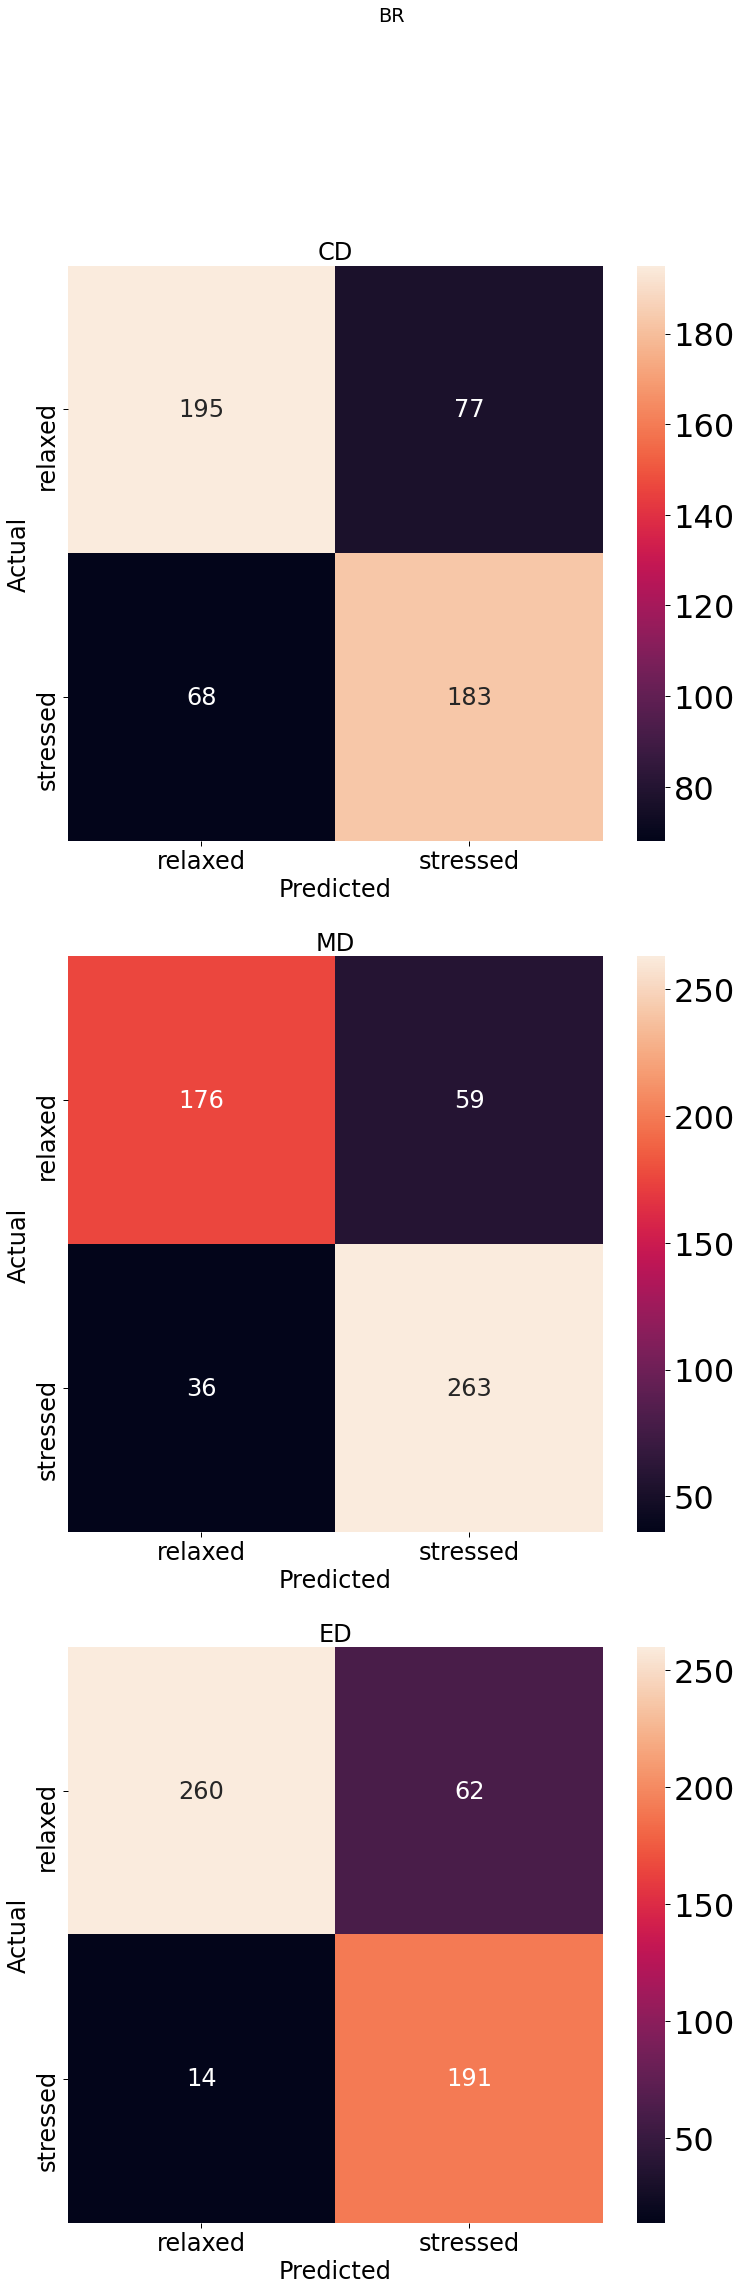

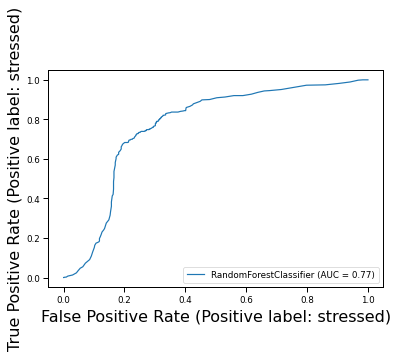

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

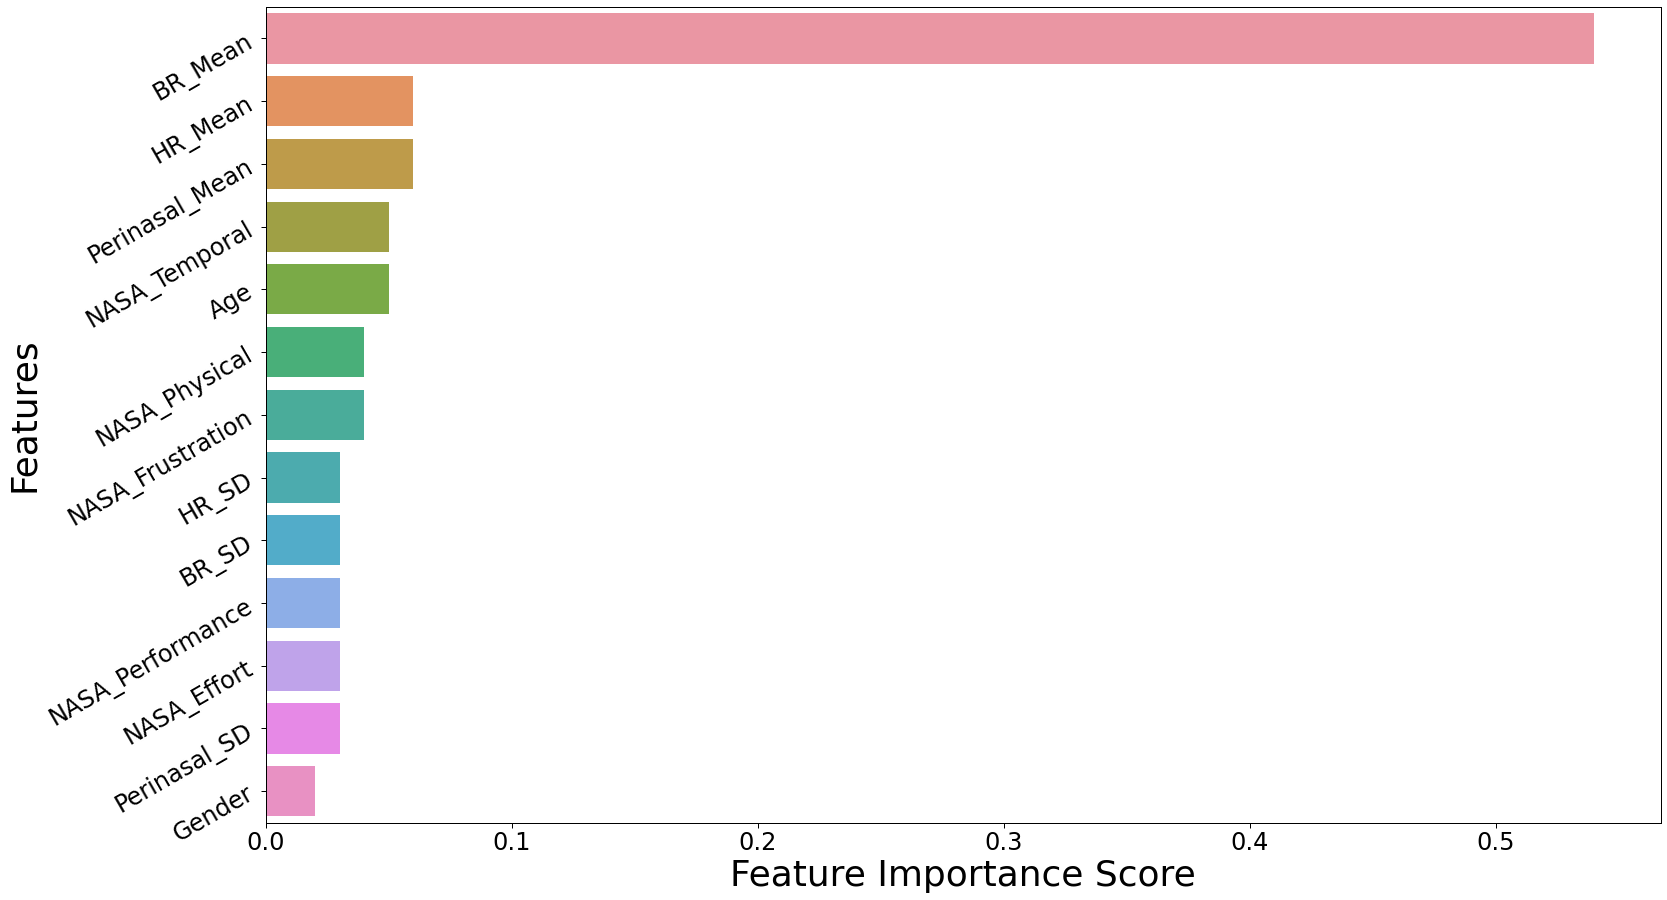

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

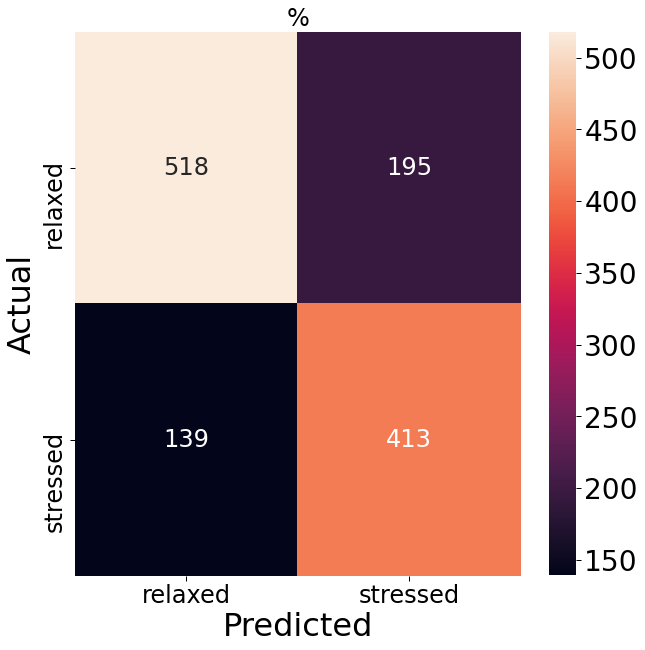

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

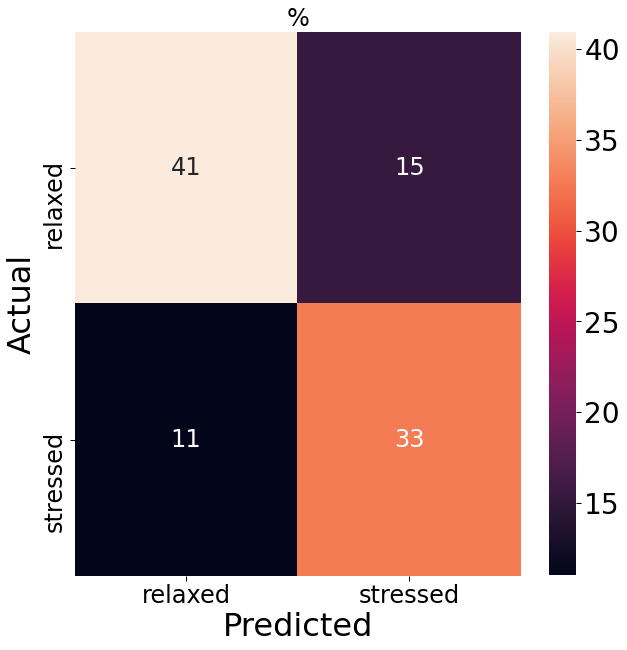



Test Subjects -->
 [31 33 36 38 39 43]


Total Train Subjects: 25    Percentage: 80.65%
Total Test Subjects: 6    Percentage: 19.35%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          50.590391
stressed         49.409609

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          67.861976
stressed         32.138024


Total Train Rows: 4912    Percentage: 76.87%
Total Test Rows: 1478    Percentage: 23.13%


Accuracy:0.79
AUC: 0.84
F1: 0.79
Recall: 0.79
Precision: 0.8
Specificity: 0.8





<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

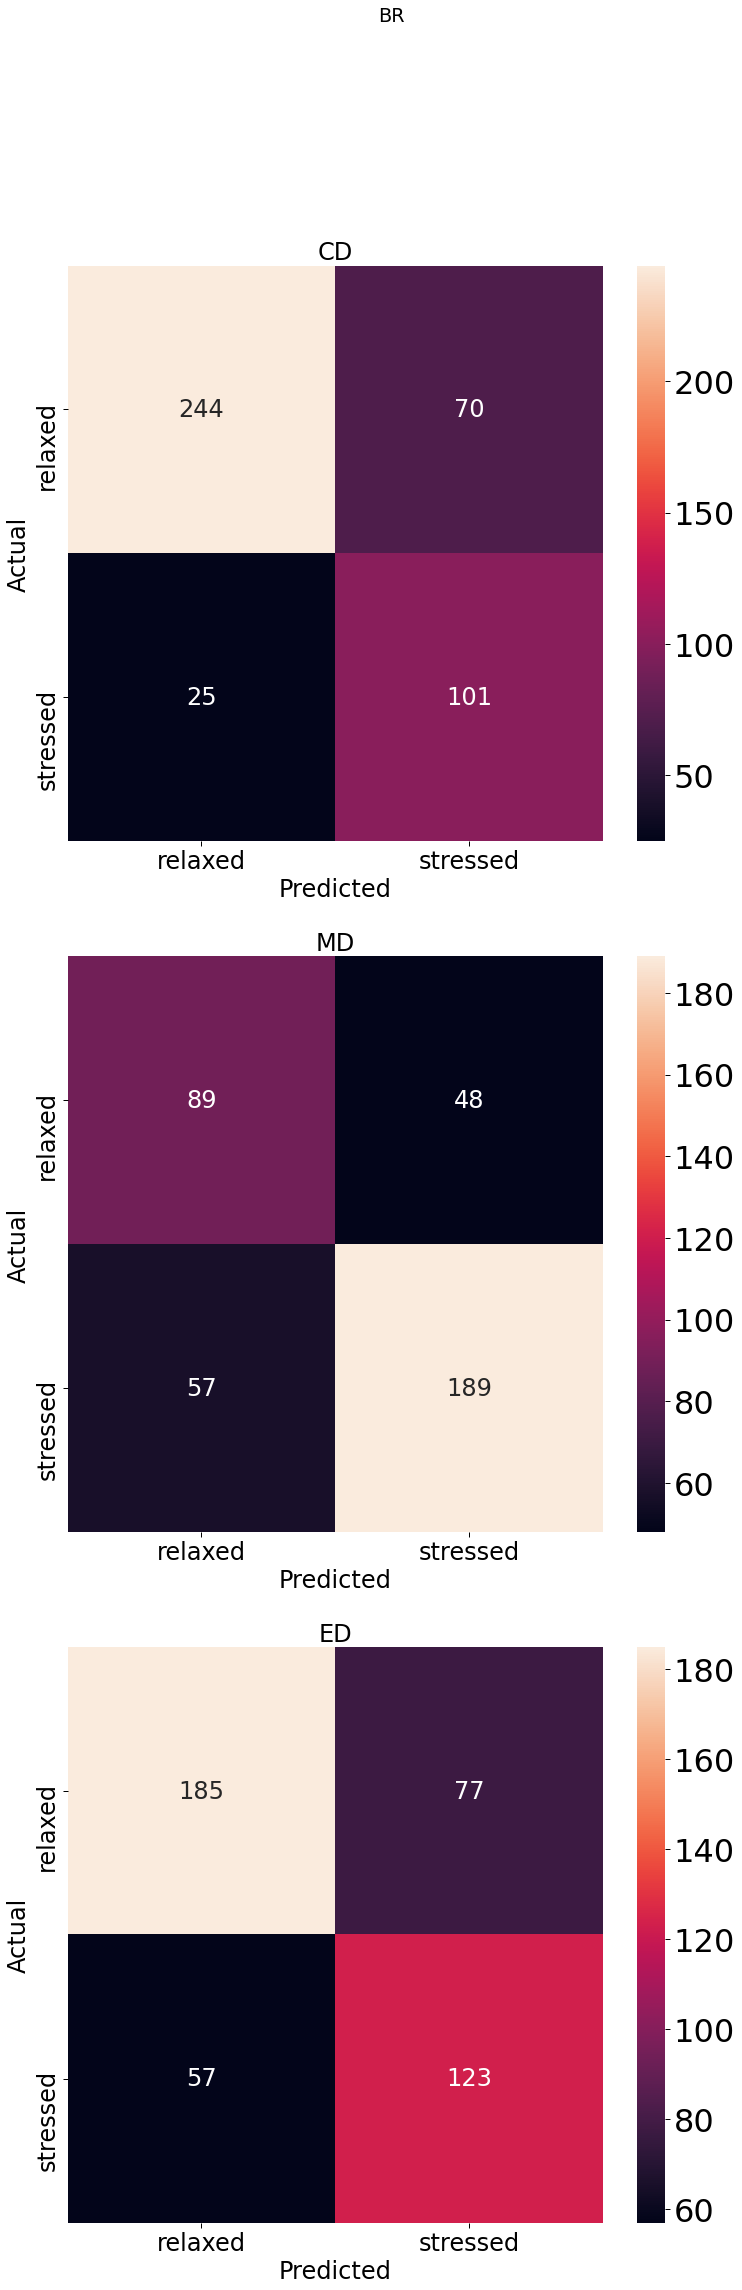

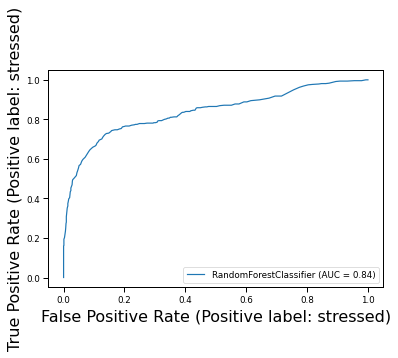

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

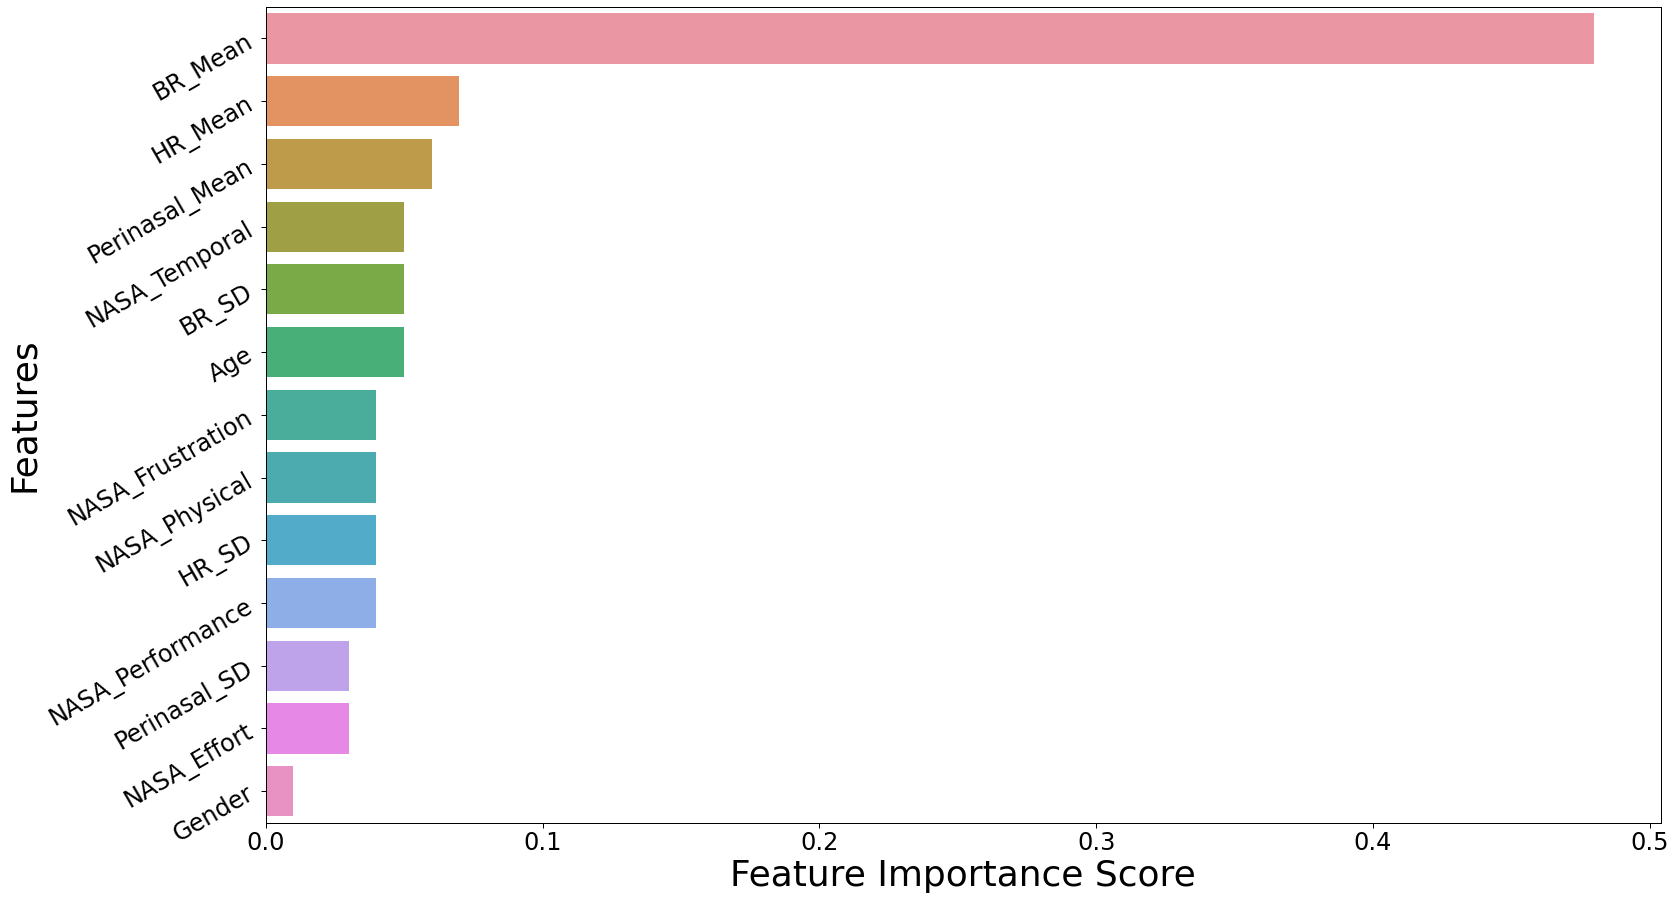

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

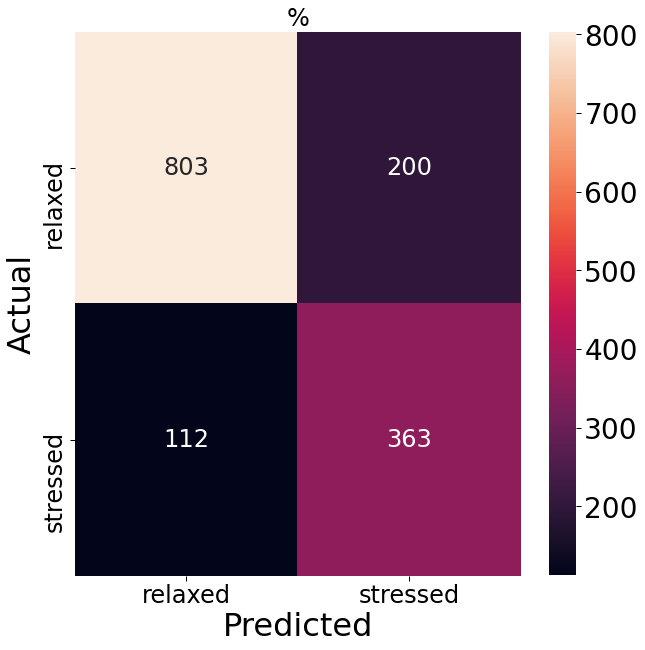

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

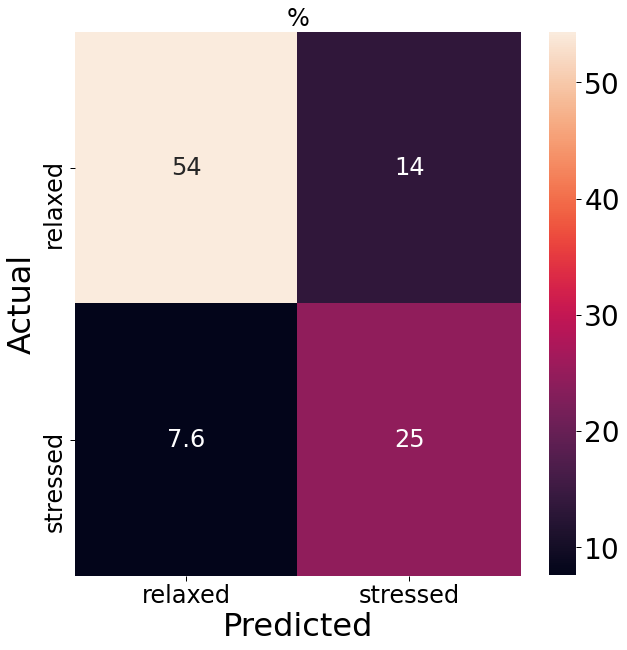



Test Subjects -->
 [44 45 47 60 61 62]


Total Train Subjects: 25    Percentage: 80.65%
Total Test Subjects: 6    Percentage: 19.35%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          56.717832
stressed         43.282168

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          44.474394
stressed         55.525606


Total Train Rows: 5277    Percentage: 82.58%
Total Test Rows: 1113    Percentage: 17.42%


Accuracy:0.67
AUC: 0.73
F1: 0.67
Recall: 0.67
Precision: 0.67
Specificity: 0.66





<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

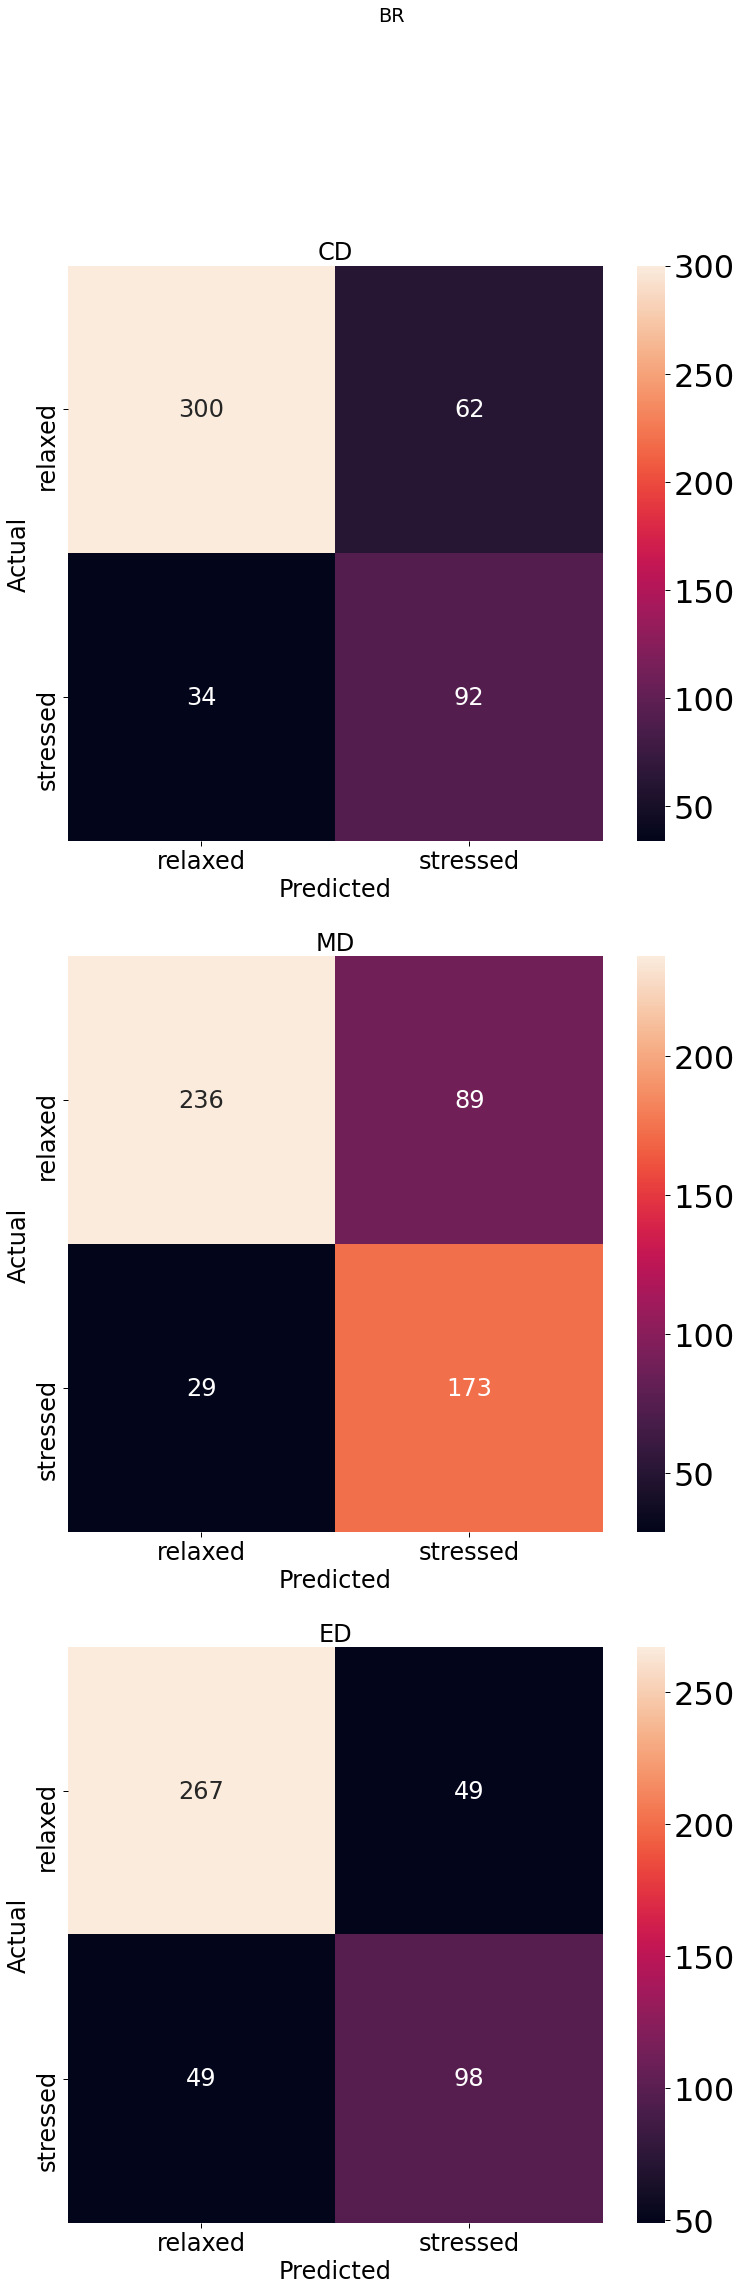

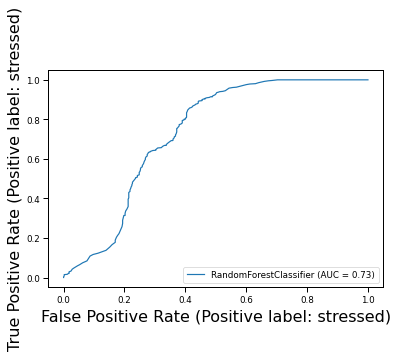

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

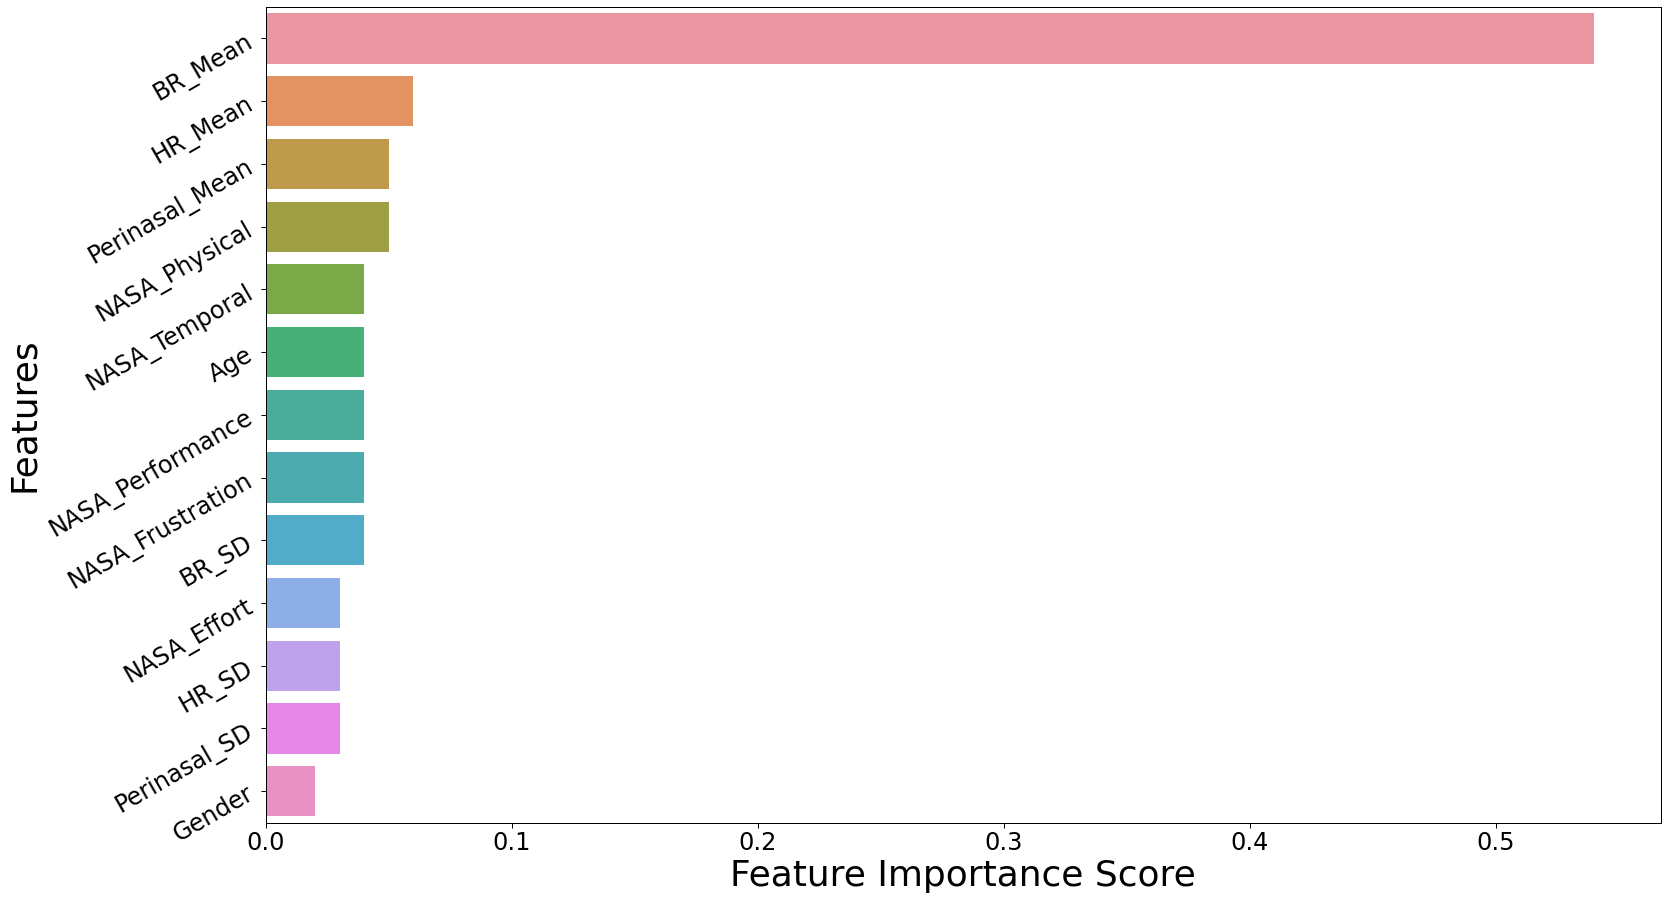

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

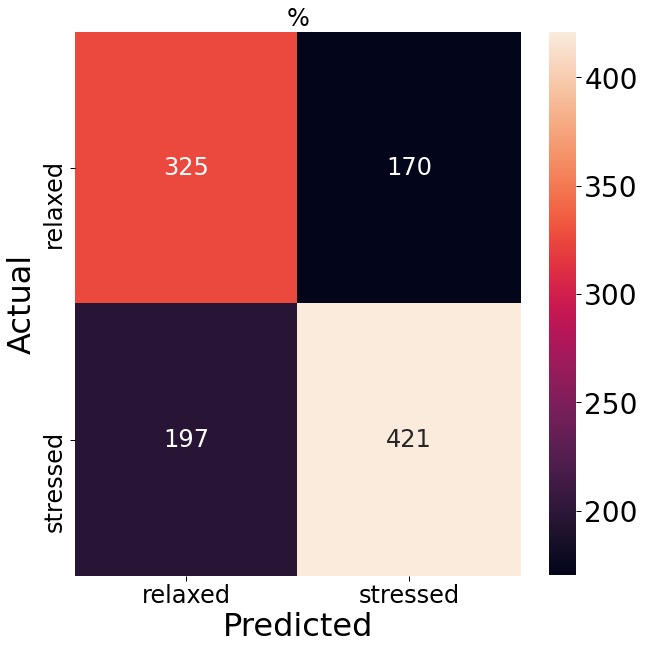

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

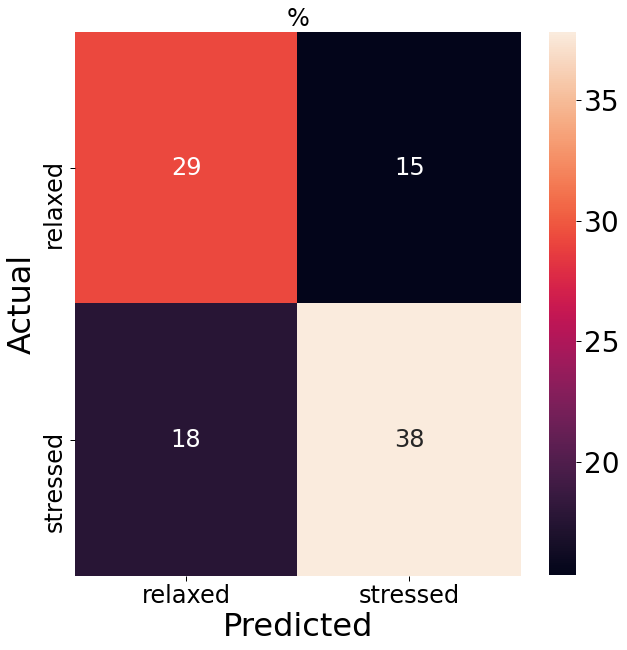



Test Subjects -->
 [66 77 79 80 81 84]


Total Train Subjects: 25    Percentage: 80.65%
Total Test Subjects: 6    Percentage: 19.35%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          55.882353
stressed         44.117647

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          47.157895
stressed         52.842105


Total Train Rows: 5440    Percentage: 85.13%
Total Test Rows: 950    Percentage: 14.87%


Accuracy:0.79
AUC: 0.89
F1: 0.79
Recall: 0.79
Precision: 0.8
Specificity: 0.87





<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

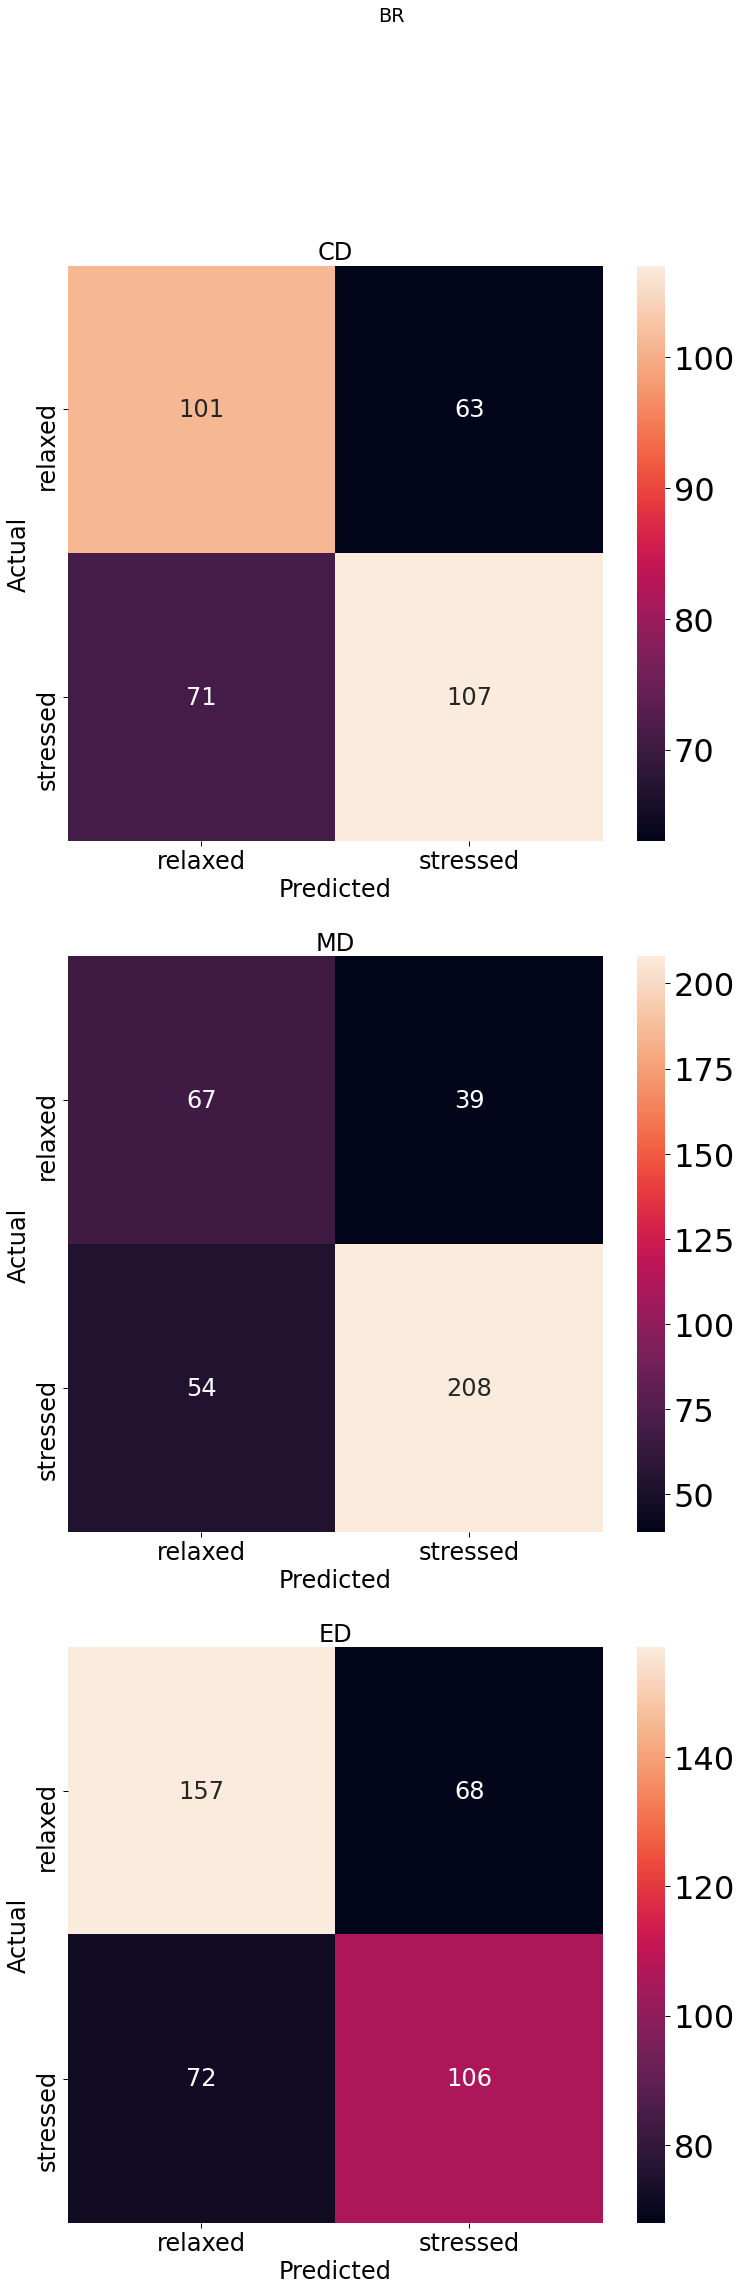

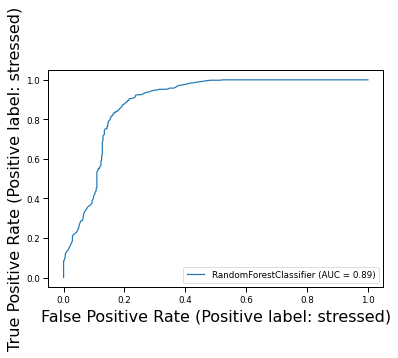

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

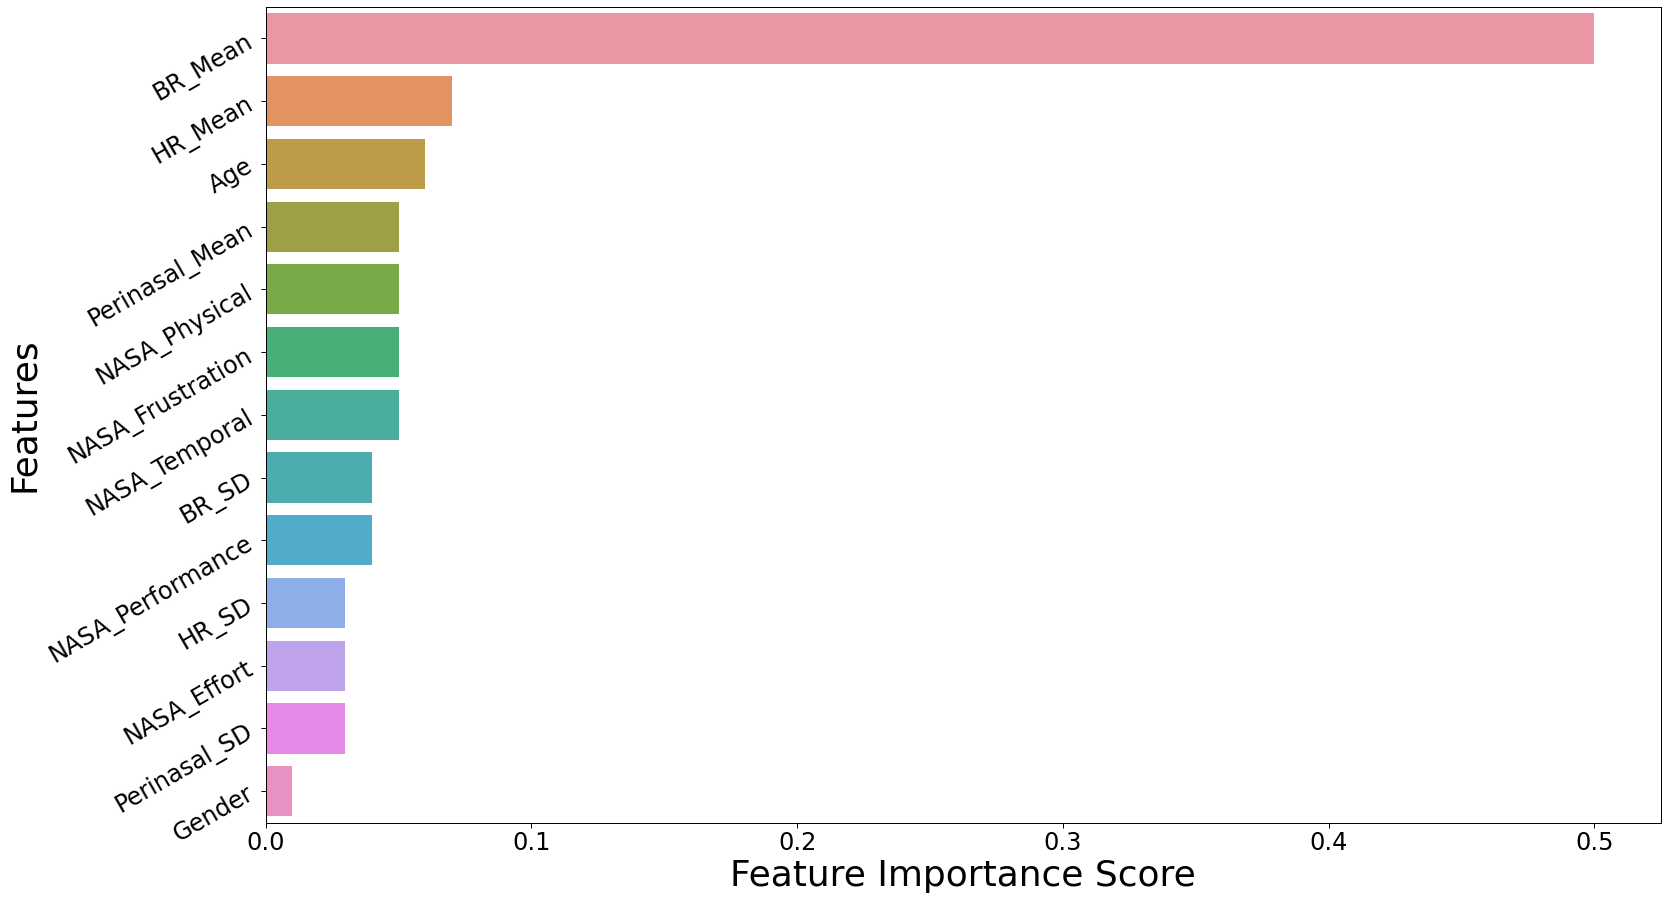

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

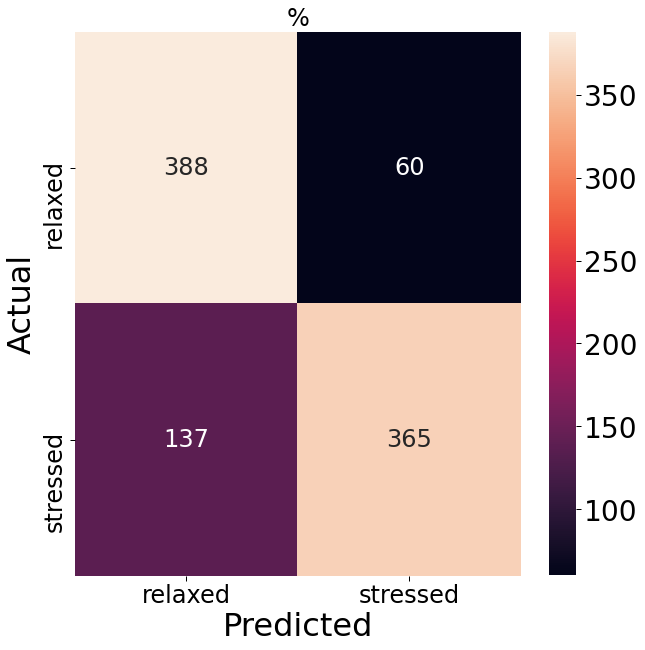

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

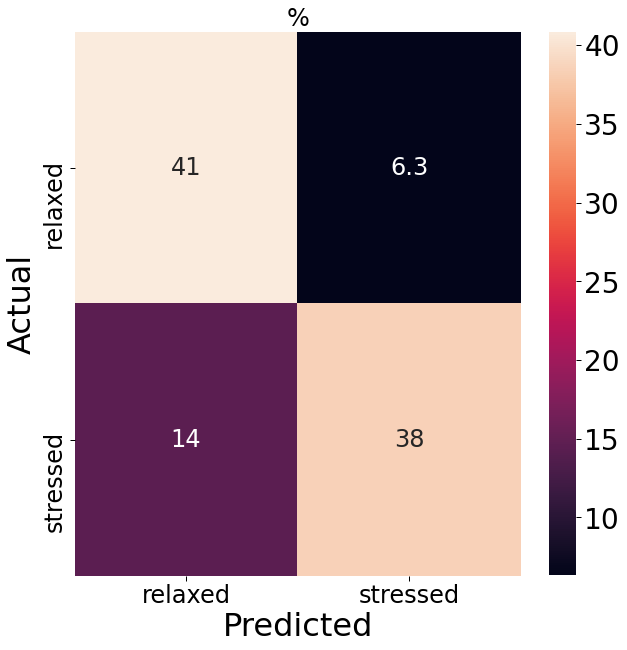

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

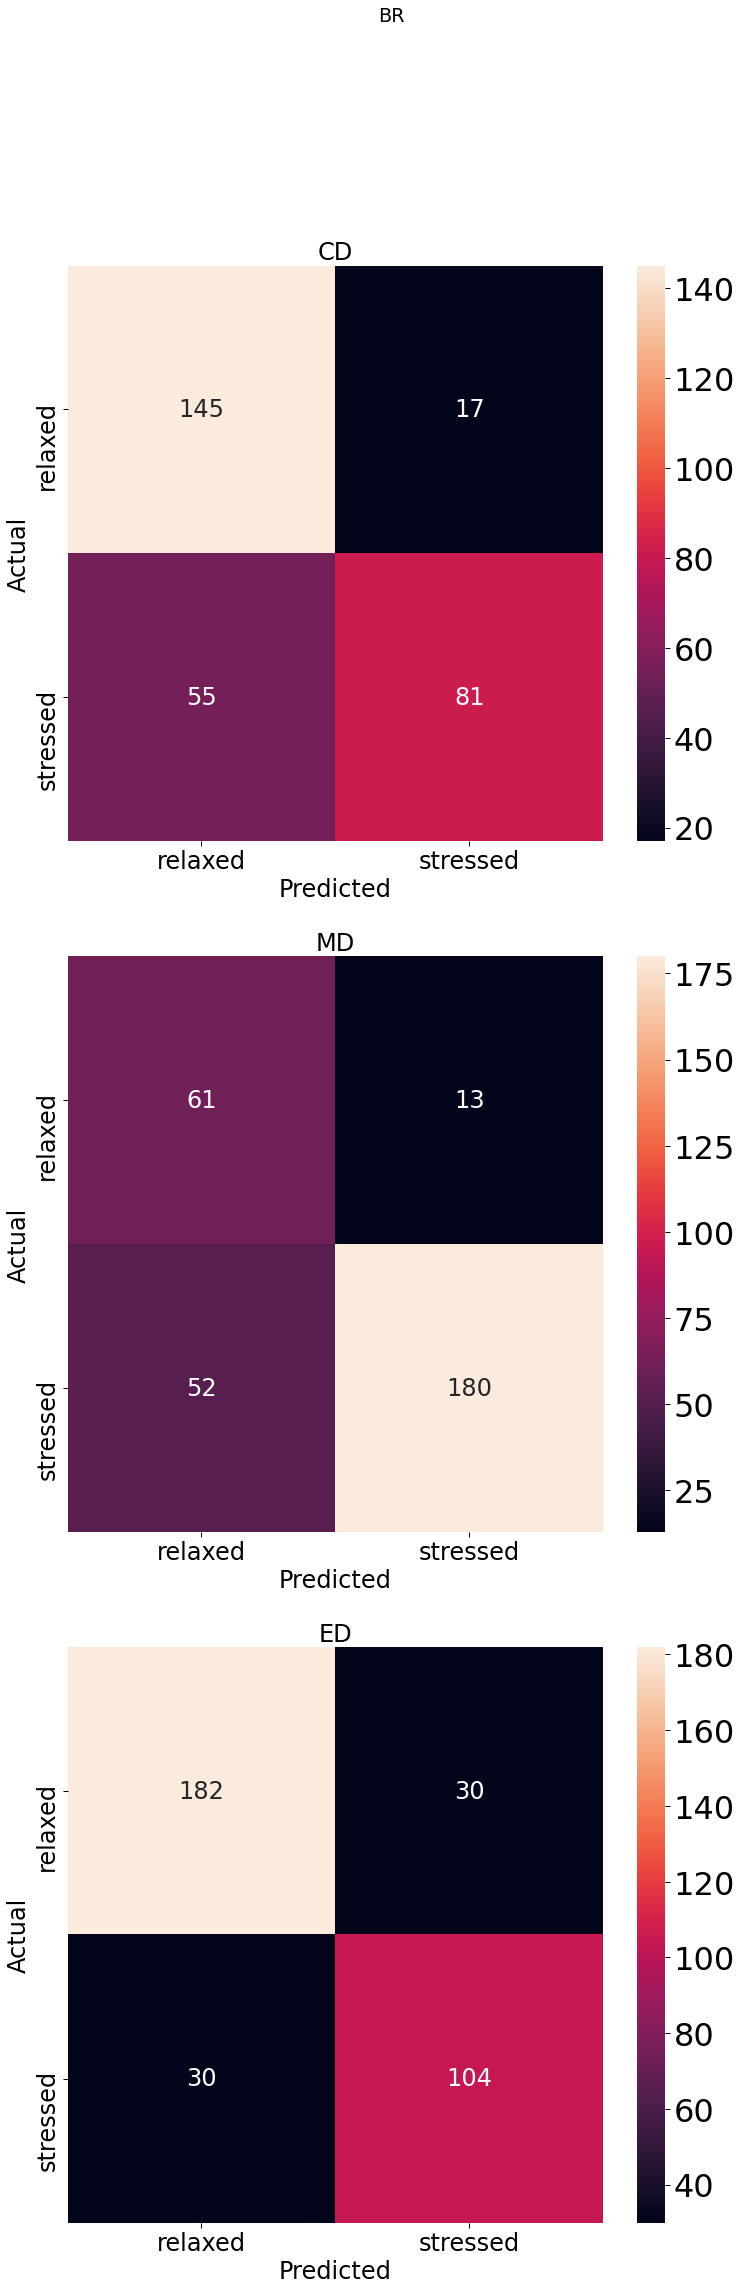

In [131]:
#####################################################################################
# arousal_signals = ['PP']
arousal_signals = ['PP', 'PP_2', 'HR', 'BR']

# 'PP', 'PP_2', 'HR', 'BR'
# 'PP_HR', 'HR_BR', 'PP_BR', 'PP_HR_BR'
#####################################################################################


#####################################################################################
model_train_method = 'kfold' ### ['best_accurate', 'kfold', 'bootstrap']

if model_train_method=='best_accurate':
    _range=1
    random_selection=False
    
elif model_train_method=='bootstrap':
    _range=30
    random_selection=True
    
elif model_train_method=='kfold':
    subjects = np.array(model_df.Subject.unique())
    kf = KFold(n_splits=5)
#####################################################################################



signal_metrics = {}



for arousal_signal in arousal_signals:
    print('----------------------------------------------------')
    print('------------------------', arousal_signal, '------------------------')
    print('----------------------------------------------------\n')
    
    signal_metrics[arousal_signal] = {
        'Accuracy': [],
        'AUC': [],
        'F1': [],
        'Recall': [],
        'Precision': [],
        'Specificity': [],
    }
  
    if model_train_method=='kfold':
        for _, test_index in kf.split(subjects):
            get_bootstrap_results(model_df, model_features, arousal_signal, model_train_method, subjects[test_index])
            
    else:
        for i in range(_range):
            # print('\n--------------------------------------------- Iteration: ', i+1)
            get_bootstrap_results(model_df, model_features, arousal_signal, model_train_method)
    
    
# print(signal_metrics)

In [132]:
print(signal_metrics)


# {'PP': {'Accuracy': [0.96, 0.96, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.96, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95], 'F1': [0.95, 0.95, 0.95, 0.95, 0.95, 0.94, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.94, 0.95, 0.94, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95], 'Recall': [0.96, 0.96, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.96, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95], 'Precision': [0.96, 0.96, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.96, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.96, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95]}, 'PP_2': {'Accuracy': [0.81, 0.8, 0.81, 0.8, 0.81, 0.8, 0.8, 0.81, 0.82, 0.81, 0.82, 0.81, 0.81, 0.82, 0.82, 0.81, 0.8, 0.82, 0.81, 0.81, 0.82, 0.81, 0.82, 0.81, 0.8, 0.82, 0.8, 0.82, 0.8, 0.81], 'F1': [0.78, 0.78, 0.78, 0.77, 0.78, 0.78, 0.77, 0.78, 0.79, 0.78, 0.79, 0.78, 0.78, 0.79, 0.79, 0.79, 0.77, 0.79, 0.78, 0.79, 0.79, 0.78, 0.79, 0.78, 0.77, 0.79, 0.78, 0.79, 0.78, 0.79], 'Recall': [0.81, 0.8, 0.81, 0.8, 0.81, 0.8, 0.8, 0.81, 0.82, 0.81, 0.82, 0.81, 0.81, 0.82, 0.82, 0.81, 0.8, 0.82, 0.81, 0.81, 0.82, 0.81, 0.82, 0.81, 0.8, 0.82, 0.8, 0.82, 0.8, 0.81], 'Precision': [0.8, 0.79, 0.81, 0.78, 0.8, 0.8, 0.79, 0.8, 0.83, 0.79, 0.82, 0.8, 0.8, 0.82, 0.83, 0.8, 0.79, 0.81, 0.8, 0.8, 0.83, 0.8, 0.83, 0.81, 0.79, 0.83, 0.79, 0.81, 0.79, 0.81]}, 'HR': {'Accuracy': [0.73, 0.72, 0.72, 0.72, 0.73, 0.72, 0.73, 0.72, 0.71, 0.73, 0.72, 0.72, 0.72, 0.72, 0.71, 0.73, 0.72, 0.72, 0.72, 0.72, 0.71, 0.72, 0.72, 0.72, 0.72, 0.73, 0.72, 0.73, 0.72, 0.71], 'F1': [0.73, 0.72, 0.72, 0.72, 0.73, 0.72, 0.73, 0.72, 0.71, 0.72, 0.72, 0.72, 0.71, 0.72, 0.71, 0.72, 0.72, 0.72, 0.72, 0.72, 0.71, 0.72, 0.71, 0.72, 0.72, 0.73, 0.72, 0.73, 0.72, 0.71], 'Recall': [0.73, 0.72, 0.72, 0.72, 0.73, 0.72, 0.73, 0.72, 0.71, 0.73, 0.72, 0.72, 0.72, 0.72, 0.71, 0.73, 0.72, 0.72, 0.72, 0.72, 0.71, 0.72, 0.72, 0.72, 0.72, 0.73, 0.72, 0.73, 0.72, 0.71], 'Precision': [0.73, 0.72, 0.73, 0.72, 0.73, 0.72, 0.73, 0.72, 0.71, 0.73, 0.73, 0.72, 0.72, 0.72, 0.71, 0.73, 0.72, 0.72, 0.73, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.73, 0.72, 0.73, 0.72, 0.71]}, 'BR': {'Accuracy': [0.79, 0.81, 0.8, 0.78, 0.78, 0.79, 0.79, 0.78, 0.79, 0.78, 0.78, 0.79, 0.79, 0.79, 0.78, 0.79, 0.79, 0.78, 0.81, 0.78, 0.79, 0.78, 0.8, 0.79, 0.8, 0.8, 0.78, 0.78, 0.79, 0.79], 'F1': [0.79, 0.81, 0.79, 0.77, 0.78, 0.78, 0.79, 0.77, 0.79, 0.78, 0.78, 0.78, 0.79, 0.78, 0.78, 0.79, 0.79, 0.78, 0.8, 0.78, 0.78, 0.78, 0.79, 0.79, 0.8, 0.79, 0.78, 0.78, 0.79, 0.79], 'Recall': [0.79, 0.81, 0.8, 0.78, 0.78, 0.79, 0.79, 0.78, 0.79, 0.78, 0.78, 0.79, 0.79, 0.79, 0.78, 0.79, 0.79, 0.78, 0.81, 0.78, 0.79, 0.78, 0.8, 0.79, 0.8, 0.8, 0.78, 0.78, 0.79, 0.79], 'Precision': [0.8, 0.82, 0.81, 0.78, 0.79, 0.79, 0.8, 0.78, 0.8, 0.79, 0.79, 0.8, 0.8, 0.79, 0.8, 0.8, 0.8, 0.79, 0.81, 0.8, 0.79, 0.79, 0.81, 0.8, 0.81, 0.8, 0.79, 0.79, 0.8, 0.79]}, 'PP_HR_BR': {'Accuracy': [0.76, 0.75, 0.76, 0.75, 0.75, 0.75, 0.75, 0.73, 0.76, 0.76, 0.76, 0.75, 0.75, 0.76, 0.76, 0.76, 0.76, 0.75, 0.76, 0.75, 0.76, 0.75, 0.76, 0.75, 0.76, 0.75, 0.76, 0.76, 0.76, 0.76], 'F1': [0.74, 0.74, 0.75, 0.74, 0.73, 0.74, 0.73, 0.72, 0.74, 0.74, 0.75, 0.74, 0.74, 0.75, 0.75, 0.74, 0.75, 0.74, 0.74, 0.73, 0.75, 0.74, 0.75, 0.74, 0.74, 0.74, 0.74, 0.74, 0.75, 0.75], 'Recall': [0.76, 0.75, 0.76, 0.75, 0.75, 0.75, 0.75, 0.73, 0.76, 0.76, 0.76, 0.75, 0.75, 0.76, 0.76, 0.76, 0.76, 0.75, 0.76, 0.75, 0.76, 0.75, 0.76, 0.75, 0.76, 0.75, 0.76, 0.76, 0.76, 0.76], 'Precision': [0.74, 0.74, 0.75, 0.74, 0.73, 0.74, 0.73, 0.72, 0.74, 0.75, 0.75, 0.74, 0.74, 0.75, 0.75, 0.75, 0.75, 0.74, 0.74, 0.73, 0.75, 0.74, 0.75, 0.74, 0.74, 0.74, 0.74, 0.74, 0.75, 0.75]}}

{'PP': {'Accuracy': [0.89, 0.97, 0.72, 0.77, 0.83], 'AUC': [0.95, 0.9, 0.84, 0.87, 0.94], 'F1': [0.89, 0.97, 0.76, 0.77, 0.82], 'Recall': [0.89, 0.97, 0.72, 0.77, 0.83], 'Precision': [0.9, 0.97, 0.86, 0.77, 0.85], 'Specificity': [0.91, 0.99, 0.7, 0.85, 0.96]}, 'PP_2': {'Accuracy': [0.8, 0.82, 0.66, 0.73, 0.83], 'AUC': [0.89, 0.86, 0.73, 0.83, 0.91], 'F1': [0.8, 0.81, 0.67, 0.73, 0.83], 'Recall': [0.8, 0.82, 0.66, 0.73, 0.83], 'Precision': [0.82, 0.81, 0.72, 0.73, 0.83], 'Specificity': [0.75, 0.88, 0.59, 0.76, 0.88]}, 'HR': {'Accuracy': [0.53, 0.67, 0.71, 0.6, 0.67], 'AUC': [0.66, 0.73, 0.66, 0.71, 0.7], 'F1': [0.53, 0.67, 0.69, 0.6, 0.65], 'Recall': [0.53, 0.67, 0.71, 0.6, 0.67], 'Precision': [0.57, 0.7, 0.71, 0.6, 0.69], 'Specificity': [0.42, 0.64, 0.89, 0.56, 0.9]}, 'BR': {'Accuracy': [0.8, 0.74, 0.79, 0.67, 0.79], 'AUC': [0.9, 0.77, 0.84, 0.73, 0.89], 'F1': [0.8, 0.74, 0.79, 0.67, 0.79], 'Recall': [0.8, 0.74, 0.79, 0.67, 0.79], 'Precision': [0.8, 0.74, 0.8, 0.67, 0.8], 'Specificity'

In [133]:
# print(signal_metrics['PP']['Accuracy'])
# print(signal_metrics['HR']['Accuracy'])
# print(len(signal_metrics['PP']['Accuracy']))
# print(len(signal_metrics['HR']['Accuracy']))

In [134]:
for arousal_signal in arousal_signals:
    arousal_signal_metrics = signal_metrics[arousal_signal]
    print("\n\n" + arousal_signal + " ----> ")
    for metric in ['Accuracy', 'AUC', 'F1', 'Recall', 'Precision', 'Specificity']:
        metric_numbers = arousal_signal_metrics[metric]

        if model_train_method=='best_accurate':
            print(metric + ": " + get_rounded_str(metric_numbers[0], 2))
        elif model_train_method=='bootstrap':
            print(metric + ": " + 
                  get_rounded_str(mean(metric_numbers), 2) + u" \u00B1 " +
                  get_rounded_str(stdev(metric_numbers), 3))
        elif model_train_method=='kfold':
            print(metric + ": " + get_rounded_str(mean(metric_numbers), 2))



PP ----> 
Accuracy: 0.84
AUC: 0.9
F1: 0.84
Recall: 0.84
Precision: 0.87
Specificity: 0.88


PP_2 ----> 
Accuracy: 0.77
AUC: 0.84
F1: 0.77
Recall: 0.77
Precision: 0.78
Specificity: 0.77


HR ----> 
Accuracy: 0.64
AUC: 0.69
F1: 0.63
Recall: 0.64
Precision: 0.65
Specificity: 0.68


BR ----> 
Accuracy: 0.76
AUC: 0.83
F1: 0.76
Recall: 0.76
Precision: 0.76
Specificity: 0.76


In [135]:
# import pprint
# pp = pprint.PrettyPrinter(indent=1)

# pp.pprint(signal_metrics)

In [136]:
# # print(model_features)

# plot_df = model_df.copy().rename(columns={
#                              'Gender_Female': 'Gender', 
#                              'Effort': 'NASA_Effort',
#                              'Frustration': 'NASA_Frustration', 
#                              'Mental_Demand': 'NASA_Mental',
#                              'Performance': 'NASA_Performance', 
#                              'Physical_Demand': 'NASA_Physical',
#                              'Temporal_Demand': 'NASA_Temporal', 
#                              'NASA_Total_Sum': 'NASA_Total',
#                              'Hr_Mean': 'HR_Mean',
#                              'Hr_SD': 'HR_SD',
#                              'Hr_Median': 'HR_Median',
#                              'Hr_SS': 'HR_SS',
#                              'Br_Mean': 'BR_Mean',
#                              'Br_SD': 'BR_SD',
#                              'Br_Median': 'BR_Median',
#                              'Br_SS': 'BR_SS'
#                             })


# # print(plot_df.columns)

# plot_features = ['Age',
#                  'Gender',
                 
#                  'NASA_Mental',
#                  'NASA_Physical',
#                  'NASA_Effort',
#                  'NASA_Frustration',
#                  'NASA_Temporal',
#                  'NASA_Performance', 
#                  'NASA_Total',
                 
#                  'Perinasal_Mean', 
#                  'Perinasal_Median', 
#                  'Perinasal_SD',
#                  'Perinasal_SS', 
                 
#                  'HR_Mean', 
#                  'HR_Median', 
#                  'HR_SD', 
#                  'HR_SS', 
                 
#                  'BR_Mean',
#                  'BR_Median', 
#                  'BR_SD', 
#                  'BR_SS']

# # print(len(model_features), len(plot_features)) ## 22, 21
# # print(plot_features)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

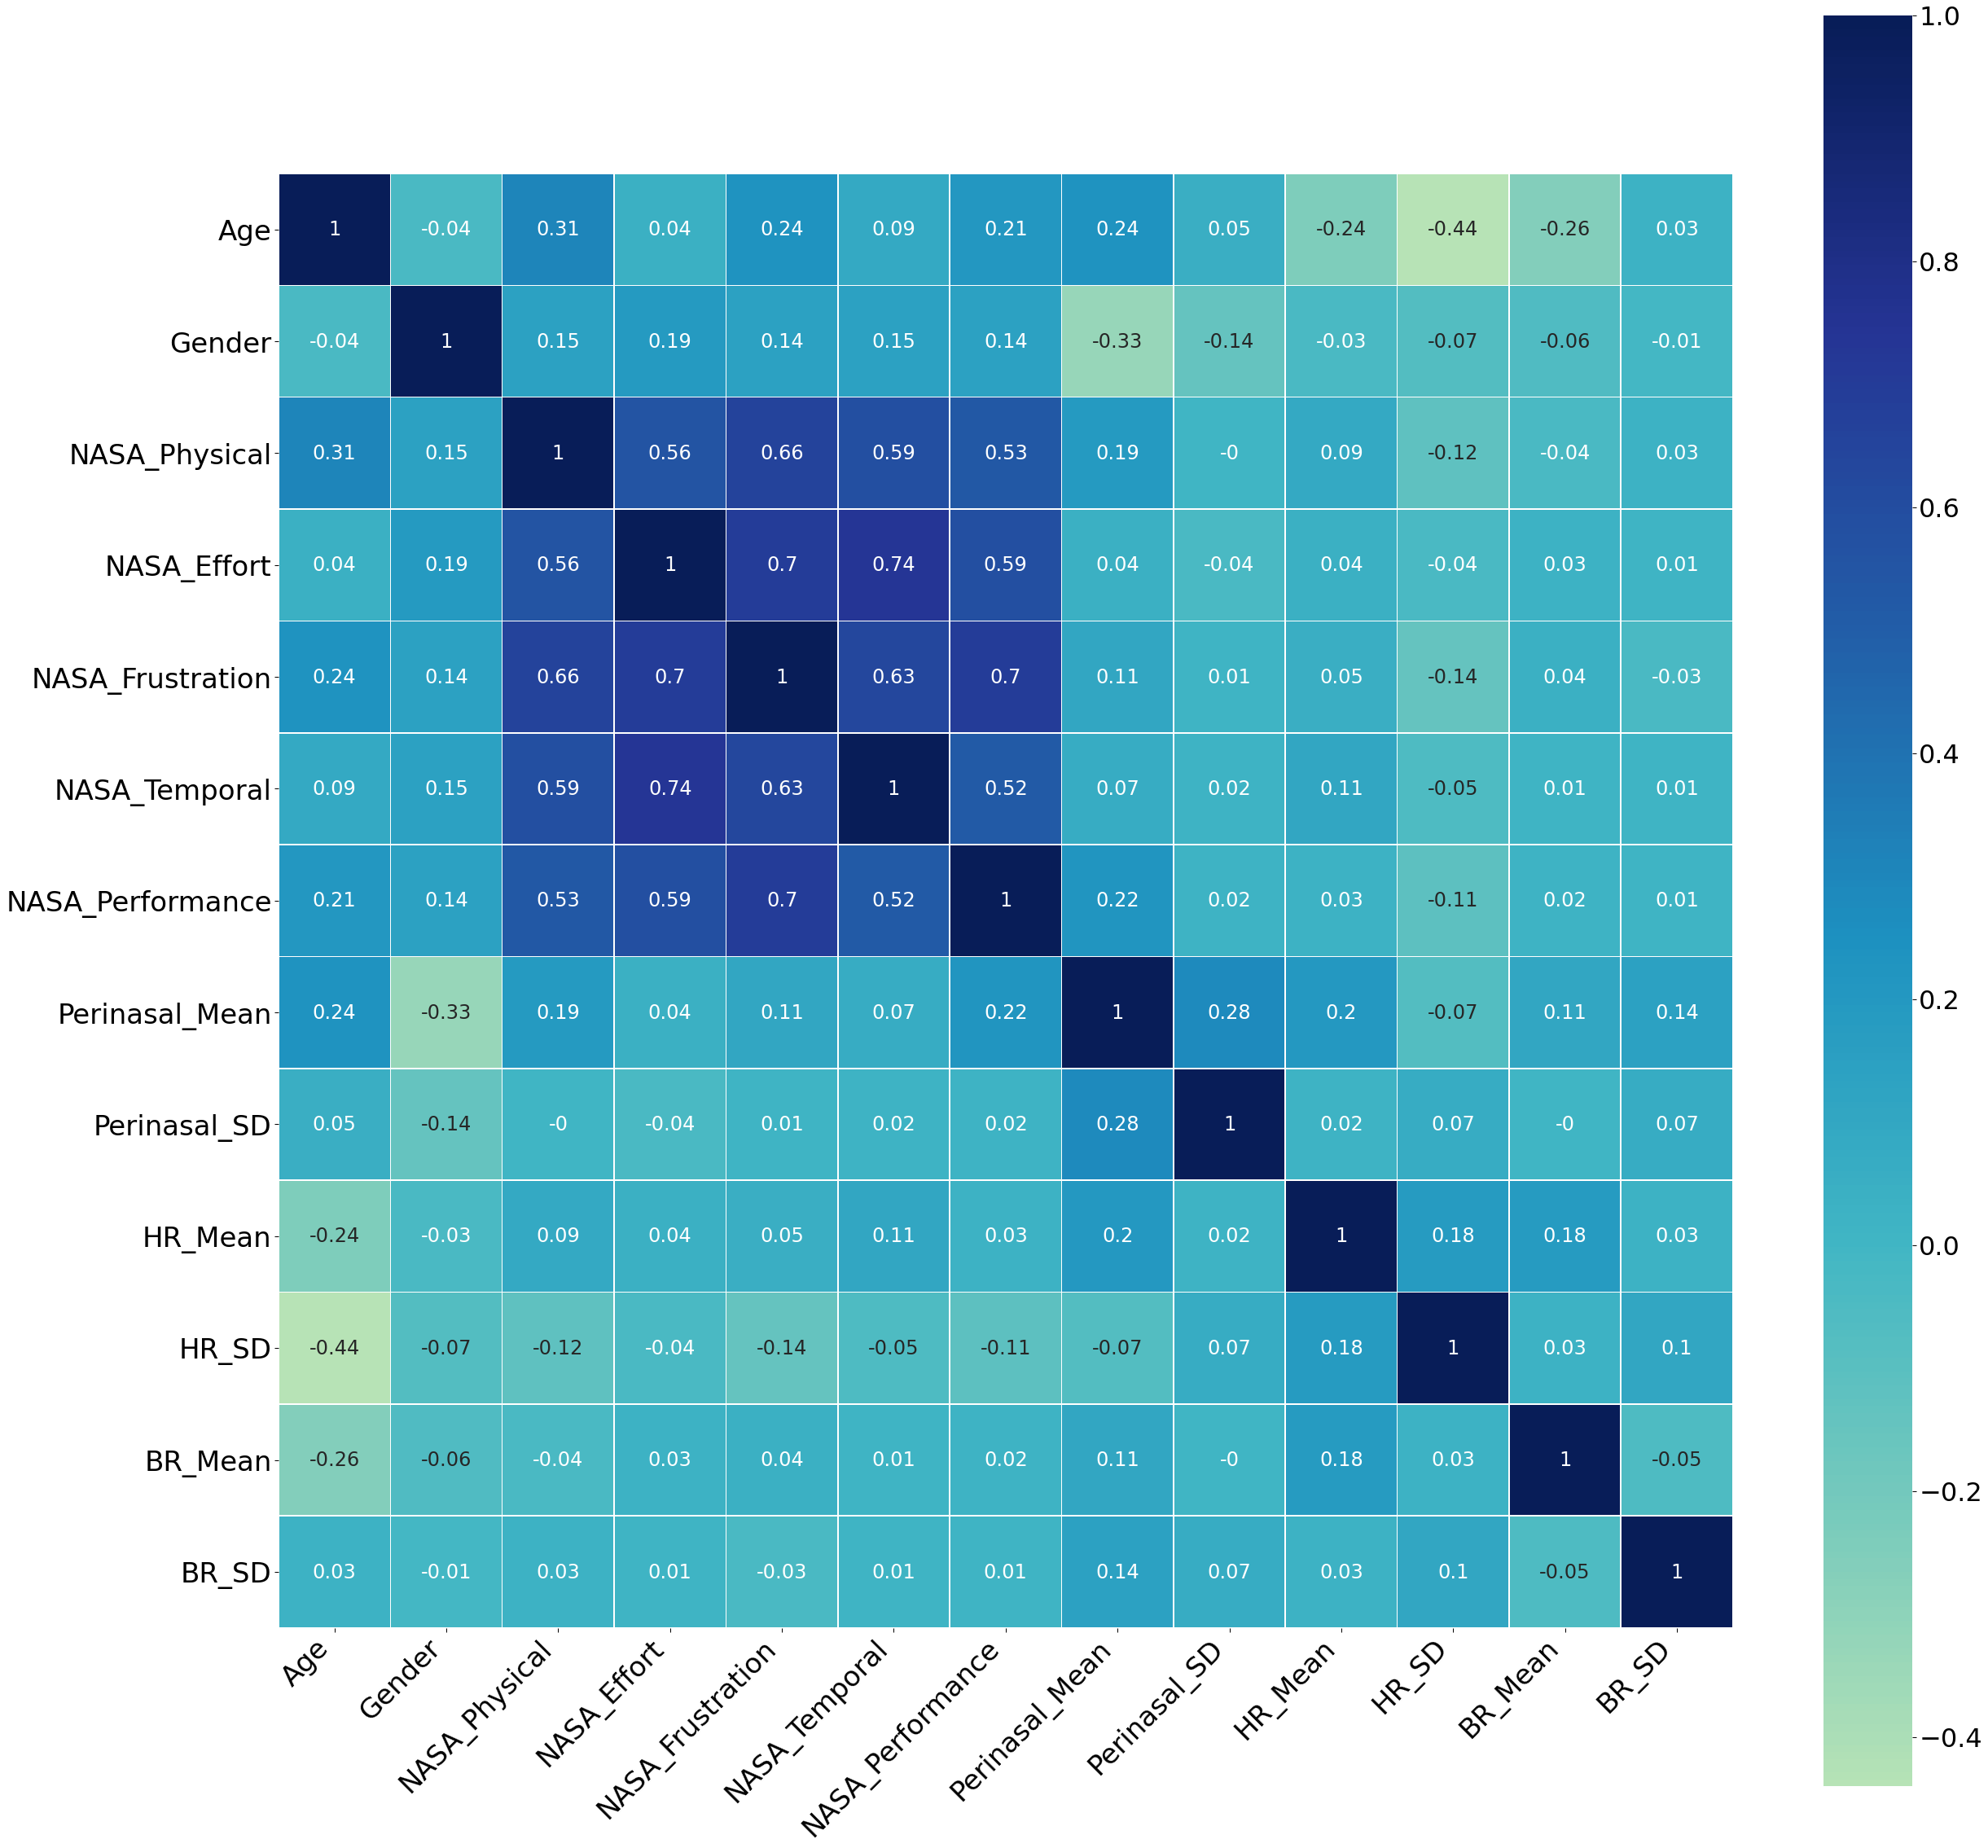

In [137]:
#################
# DO NOT DELETE #
#################



##################################
####----   Old Features   ----####
##################################
# cor_df = model_df.copy()[['Arousal_Mode',
#                           'Perinasal_Mean', 'Perinasal_SD', 'Perinasal_Median', 'Perinasal_SS', 
#                           'Palm_Mean', 'Palm_SD', 'Palm_Median', 'Palm_SS', 
#                           'Hr_Mean', 'Hr_SD', 'Hr_Median', 'Hr_SS', 
#                           'Br_Mean', 'Br_SD', 'Br_Median', 'Br_SS',
#                           'Drive_Label_CD', 'Drive_Label_ED', 
#                           'Drive_Label_FD', 'Drive_Label_MD'
#                            ]]


#############################################
####---- only physiological Features ----####
#############################################
# cor_df = model_df.copy()[['Arousal_Mode', 
#                           'Perinasal_Mean', 'Perinasal_SD',
#                           'Palm_Mean', 'Palm_SD', 
#                           'Hr_Mean', 'Hr_SD',
#                           'Br_Mean', 'Br_SD',
#                           'Drive_Label_CD', 'Drive_Label_ED', 
#                           'Drive_Label_FD', 'Drive_Label_MD'
#                            ]]




# ###################################
# ####----   Plot Features   ----####
# ###################################
# cor_df = plot_df.copy()[['Arousal_Mode'] + plot_features]
# corr = cor_df.corr().round(2)








#################################
###----   All Features   ----####
#################################
cor_df = model_df.copy()[['Arousal_Mode'] + model_features]
corr = cor_df.corr().round(2)








##################################################################
reset_plt()
plt.figure(figsize=(40, 40))
plt.subplot(1, 1, 1)

sns_plt = sns.heatmap(corr, cmap="YlGnBu", center=0, square=True, linewidths=.5, annot=True, annot_kws={"size": 24})
sns_plt.collections[0].colorbar.ax.tick_params(labelsize=32)

sns_plt.set_xticklabels(sns_plt.get_xticklabels(), rotation = 45, fontsize = 34, ha='right')  # 45
sns_plt.set_yticklabels(sns_plt.get_yticklabels(), rotation = 0, fontsize = 34)


# sns_plt.axes.set_title("Title",fontsize=50)
# sns_plt.set_xlabel("X Label",fontsize=30)
# sns_plt.set_ylabel("Y Label",fontsize=20)
# sns_plt.tick_params(labelsize=5)
# sns_plt.plt.show()


plt.savefig(figure_path + 'all_features_correlation_plot.png')
plt.savefig(figure_path + 'all_features_correlation_plot.pdf')

plt.show()

In [138]:
##########################
# NON USED CODES
##########################


# IFrame("../../data/sim1/figures/pp_arousal_prediction_Cognitive_sd.pdf", width=900, height=600)



# result_df = pd.DataFrame({
#         'actual': y_test,
#         'prediction': y_pred,
#         'err': y_test == y_pred
#     }).sort_values('err', ascending = False)
# result_df.to_csv("../../data/sim1/test/result_" + arousal_signal + ".csv", sep=',')










# ########################
# PP -->
# ########################
# Accuracy: 0.779839208410637
# F1: 0.7578831147346705
# Recall: 0.779839208410637
# Precision: 0.7987647247206715

# #################################
# PP --> Best Bootstraping for PP
# #################################
# Accuracy: 0.8556223970384081
# F1: 0.8416228891876154
# Recall: 0.8556223970384081
# Precision: 0.8378525827410469






#########################
# PP_2 -->
#########################
# Accuracy: 0.7414965986394558
# F1: 0.7382594058202663
# Recall: 0.7414965986394558
# Precision: 0.7647435765692131

##################################
# PP_2 --> Best Bootstraping for PP
##################################
# Accuracy: 0.7431744562702453
# F1: 0.7332696262099785
# Recall: 0.7431744562702453
# Precision: 0.736553172654085


    
    
    
    
#########################
# HR -->
#########################
# Accuracy: 0.6487322201607916
# F1: 0.5998199331532664
# Recall: 0.6487322201607916
# Precision: 0.6352522628886266

##################################
# HR --> Best Bootstraping for PP
##################################
# Accuracy: 0.6598796853308654
# F1: 0.659423920692846
# Recall: 0.6598796853308654
# Precision: 0.6590498579113212




#########################
# BR -->
#########################
# Accuracy: 0.6951144094001237
# F1: 0.6916477146798585
# Recall: 0.6951144094001237
# Precision: 0.7030998641785814

##################################
# BR --> Best Bootstraping for PP
##################################
# Accuracy: 0.7366959740860712
# F1: 0.7339665422228959
# Recall: 0.7366959740860712
# Precision: 0.7382492602016391


In [139]:
# ################################################################################################
# # Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
# ################################################################################################
# X = np.array(model_df.Subject.unique())
# kf = KFold(n_splits=5)
# kf.get_n_splits(X)
# print(kf)
# KFold(n_splits=5, random_state=None, shuffle=False)

# for train_index, test_index in kf.split(X):
#     X_train, X_test = X[train_index], X[test_index]
# #     print("TRAIN:", X[train_index], "TEST:", X[test_index])
#     print("TRAIN_IDX:", train_index, "TEST_IDX:", test_index)